<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Advanced Machine Learning - Project 3</center></h1>

# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
# Read and manipulate data
import pandas as pd
import numpy as np

# Data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Missing value imputation
from sklearn.impute import SimpleImputer

# Model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

from sklearn.dummy import DummyClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
)

# Data scaling and encoding
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    RobustScaler,
)
from sklearn.impute import SimpleImputer

# Tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin


# Oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set the background for the graphs
plt.style.use("ggplot")

# Printing style
!pip install tabulate
from tabulate import tabulate

# To supress warnings
import warnings

# Date time
from datetime import datetime

warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
# Run the following lines for Google Colab to mount your Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load the dataset
original = pd.read_csv('/content/drive/My Drive/Advanced_Machine_Learning/BankChurners.csv')

In [4]:
# Copy the dataset to avoid changing the original
data = original.copy()

## Data Overview

- Observations
- Sanity checks

In [5]:
# Display basic information and first 5 rows of the dataset
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

(None,
    CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
 0  768805383  Existing Customer            45      M                3   
 1  818770008  Existing Customer            49      F                5   
 2  713982108  Existing Customer            51      M                3   
 3  769911858  Existing Customer            40      F                4   
 4  709106358  Existing Customer            40      M                3   
 
   Education_Level Marital_Status Income_Category Card_Category  \
 0     High School        Married     $60K - $80K          Blue   
 1        Graduate         Single  Less than $40K          Blue   
 2        Graduate        Married    $80K - $120K          Blue   
 3     High School            NaN  Less than $40K          Blue   
 4      Uneducated        Married     $60K - $80K          Blue   
 
    Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
 0              39                         5                       1   

#### Observations:

* The dataset contains 10,127 entries and 21 columns.
* Among the 21 columns in the dataset, 5 floating-point values, 10 have integer data types, 6 have object data types.

In [6]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Display the number of missing values for each feature
missing_values

Education_Level    1519
Marital_Status      749
dtype: int64

#### Observations:

* There are some missing values in the Education_Level and Marital_Status columns, which we'll need to handle during the data preprocessing step.

In [7]:
# Check for duplicated records
duplicated_records = data.duplicated()
num_duplicated_records = duplicated_records.sum()

# Display the number of duplicated records
num_duplicated_records

0

#### Observations:

* There are no duplicate rows in the dataset, indicating that each row represents a unique entry.

In [8]:
# Get the statistical summary of the numerical columns
numerical_summary = data.describe().transpose()

# Display the statistical summary
numerical_summary

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

#### Observations:

The statistical summary of the numerical columns in the dataset is as follows:

* **Customer_Age:** Ranges from 26 to 73 with a mean age of approximately 46.
* **Dependent_count:** Ranges from 0 to 5 with an average of approximately 2 dependents.
* **Months_on_book:** The period of relationship with the bank ranges from 13 to 56 months.
* **Total_Relationship_Count:** Customers hold between 1 and 6 products from the bank.
* **Months_Inactive_12_mon:** Customers were inactive between 0 and 6 months in the last 12 months.
* **Contacts_Count_12_mon:** The bank contacted customers between 0 and 6 times in the last 12 months.
* **Credit_Limit:** Credit limit varies widely from 1438.3 to 34516 with an average of approximately 8631.95.
* **Total_Revolving_Bal:** Total revolving balance on the credit card ranges from 0 to 2517.
* **Avg_Open_To_Buy:** Open to Buy Credit Line (Average of last 12 months) ranges from 3 to 34516.
* **Total_Amt_Chng_Q4_Q1:** Change in Transaction Amount (Q4 over Q1) ranges from 0 to 3.397.
* **Total_Trans_Amt:** Total Transaction Amount (Last 12 months) ranges from 510 to 18484.
* **Total_Trans_Ct:** Total Transaction Count (Last 12 months) ranges from 10 to 139.
* **Total_Ct_Chng_Q4_Q1:** Change in Transaction Count (Q4 over Q1) ranges from 0 to 3.714.
* **Avg_Utilization_Ratio:** Average Card Utilization Ratio ranges from 0 to 0.999.

In [9]:
# Get the statistical summary of the categorical columns
categorical_summary = data.describe(include=['object']).transpose()

# Display the statistical summary
categorical_summary

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

#### Observations:

The statistical summary of the categorical columns in the dataset is as follows:

* **Attrition_Flag:** The dataset is imbalanced with a larger proportion of existing customers (8,500 or 83.93%) compared to attrited customers (1,627 or 16.07%).
* **Gender:** There's a fairly balanced distribution between Female (5,358 or 52.91%) and Male (4.769 or 47.09%) customers.
* **Education_Level:** The most common education level is "Graduate" (3,128 or 36.33%), but there are also 1,519 missing values that need to be addressed.
* **Marital_Status:** Most customers are "Married" (4,687 or 49.97%), and there are 749 missing values in this column.
* **Income_Category:** The largest income category is "Less than $40K" (3,561 or 35.16%).
* **Card_Category:** Most customers have a "Blue" card (9,436 or 93.17%).

In [10]:
# Below function prints unique value counts and percentages for the category/object type variables
def category_unique_value():
    for cat_cols in (
        data.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list()
    ):
        print("Unique values and corresponding data counts for feature: " + cat_cols)
        print("-" * 90)
        df_temp = pd.concat(
            [
                data[cat_cols].value_counts(),
                data[cat_cols].value_counts(normalize=True) * 100,
            ],
            axis=1,
        )
        df_temp.columns = ["Count", "Percentage"]
        print(df_temp)
        print("-" * 90)

# Display the unique value counts and percentages for the category/object type variables
category_unique_value()

Unique values and corresponding data counts for feature: Attrition_Flag
------------------------------------------------------------------------------------------
                   Count  Percentage
Existing Customer   8500      83.934
Attrited Customer   1627      16.066
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Gender
------------------------------------------------------------------------------------------
   Count  Percentage
F   5358      52.908
M   4769      47.092
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Education_Level
------------------------------------------------------------------------------------------
               Count  Percentage
Graduate        3128      36.338
High School     2013      23.385
Uneducated      1487      17.275
College         1013      11.7

#### Observations:

* **Attrition_Flag (Target Variable):** The dataset is imbalanced with a larger proportion of existing customers (83.93%) compared to attrited customers (16.07%). This imbalance may need to be addressed during model training to avoid bias towards the majority class.
* **Gender:** There are slightly more females (52.91%) than males (47.09%) in the dataset.
* **Education_Level:** The most common education level is "Graduate" (36.33%), followed by "High School" (23.38%) and "Unknown" (17.27%). The "Unknown" category might represent missing or undisclosed information and should be considered during data preprocessing.
* **Marital_Status:** A majority of customers are either "Married" (49.97%) or "Single" (42.08%). There's also a notable portion of "Unknown" marital status (7.40%), which might need special attention during preprocessing.
* **Income_Category:** The income category is fairly distributed, with the largest group earning "Less than $40K" (35.16%). The income categories might provide insights into the spending and transaction behaviors of different customer segments.
* **Card_Category:** The vast majority of customers have a "Blue" card (93.17%). The other card categories ("Silver", "Gold", "Platinum") are relatively rare, which might limit the predictive power of this feature for those categories.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



**Note**: Answers are provided at the end of the EDA.

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

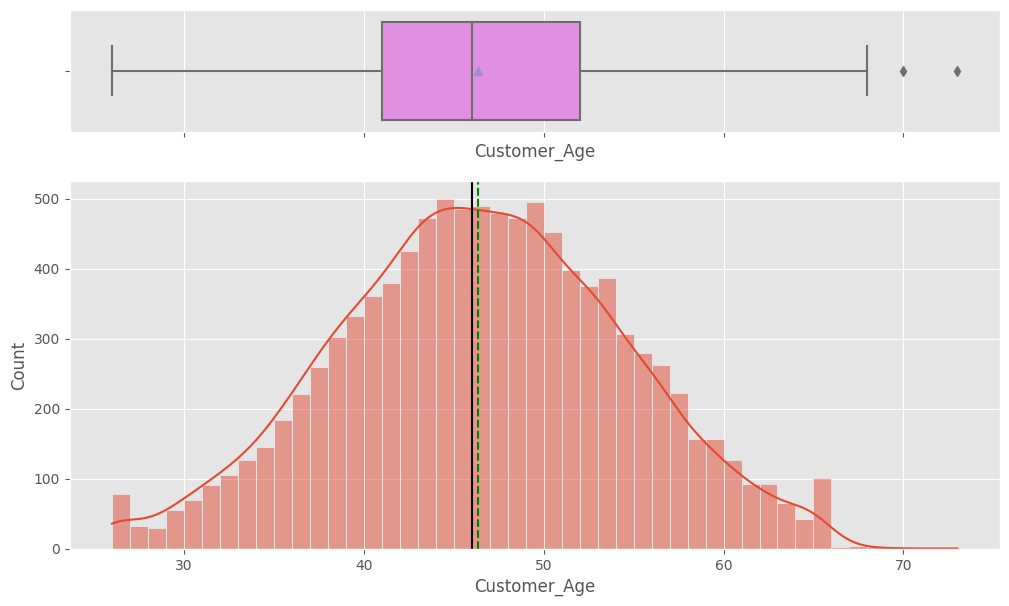

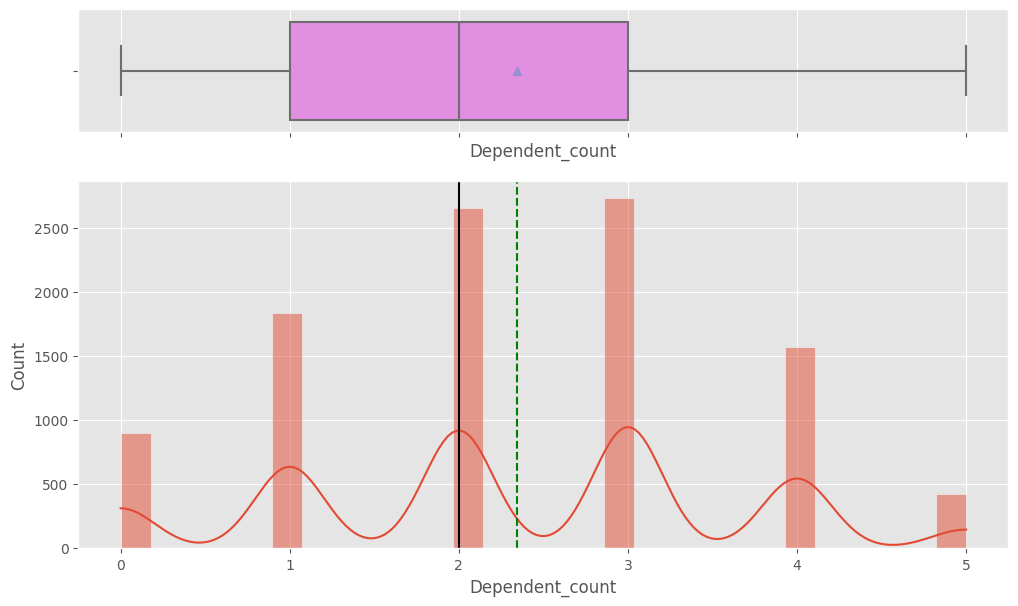

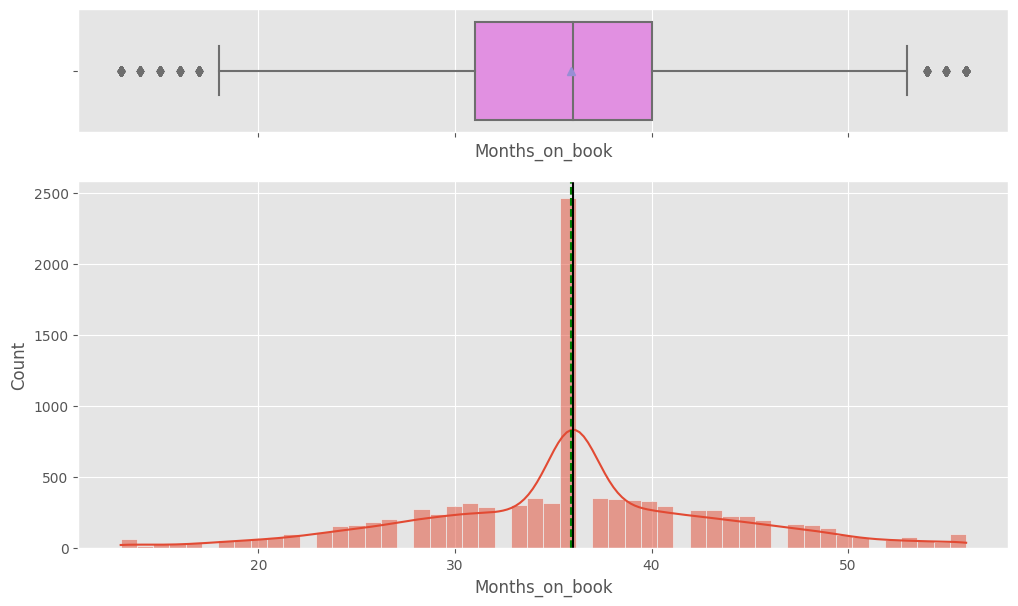

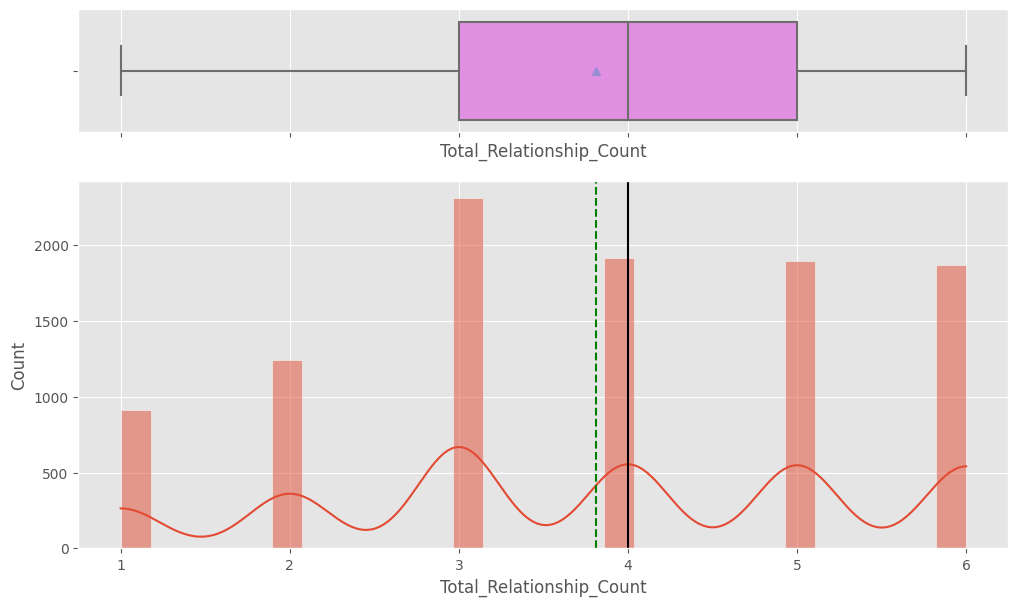

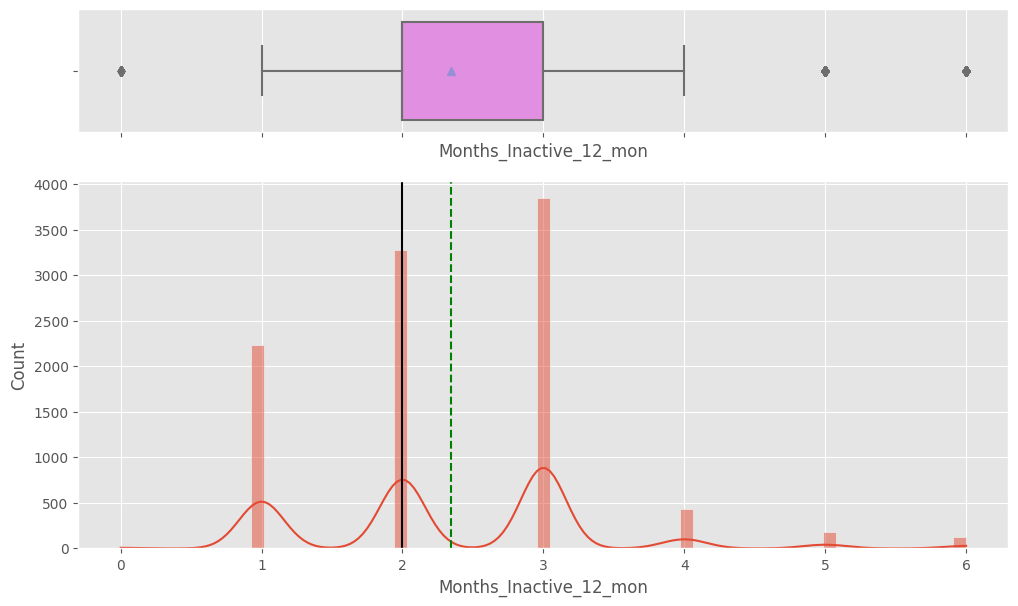

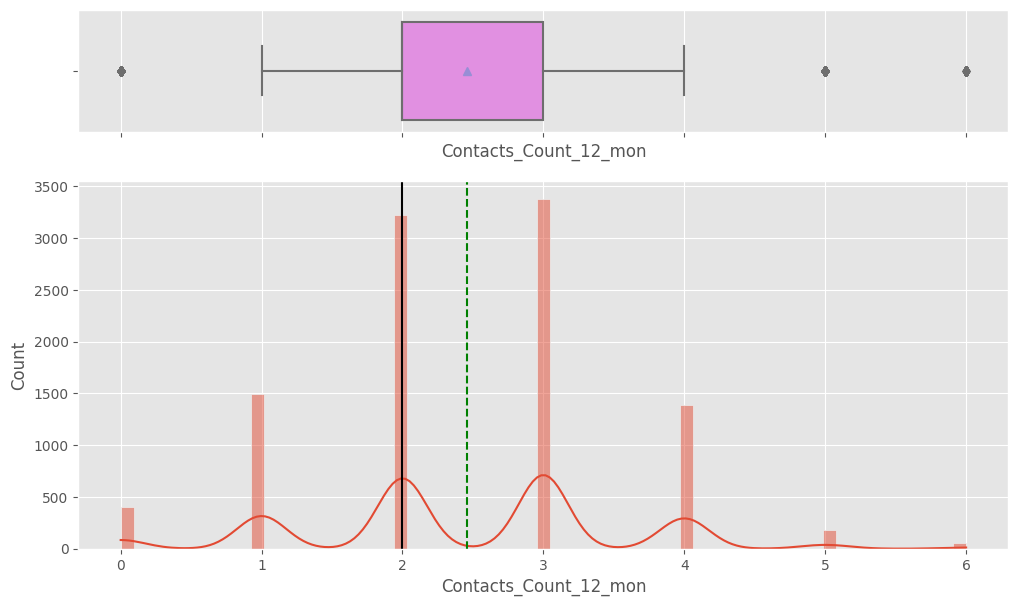

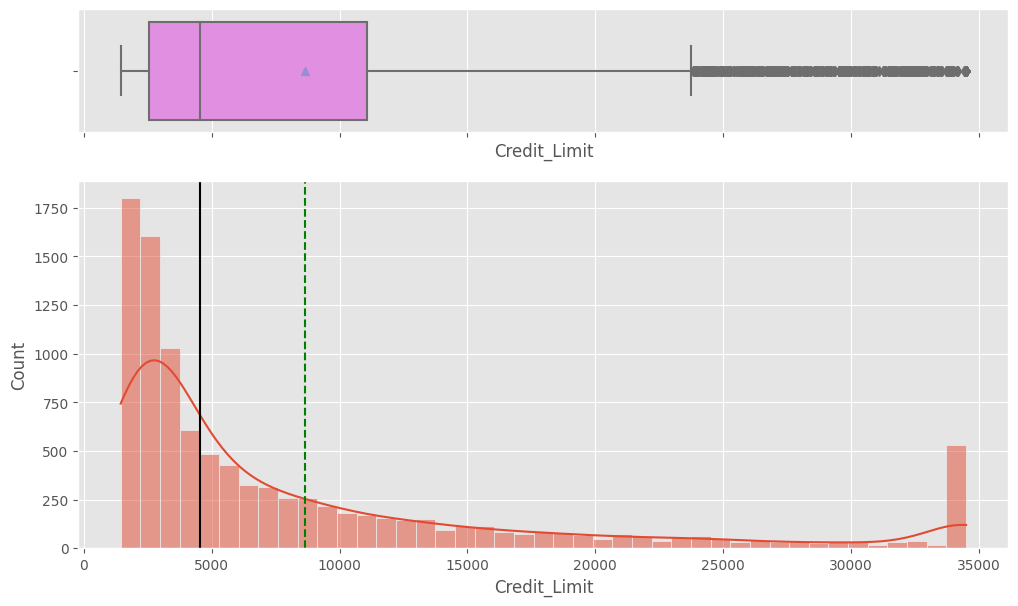

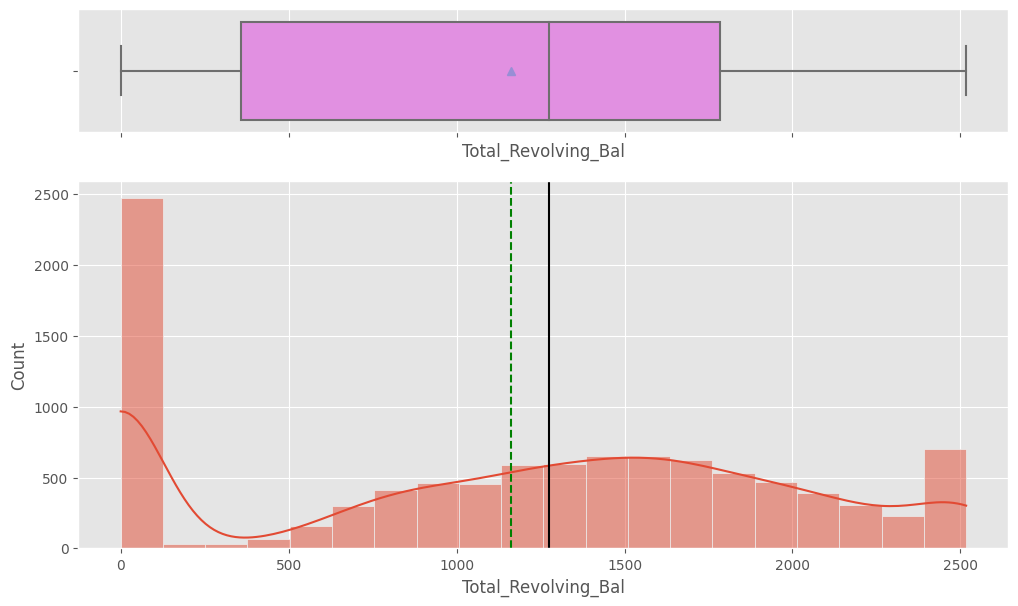

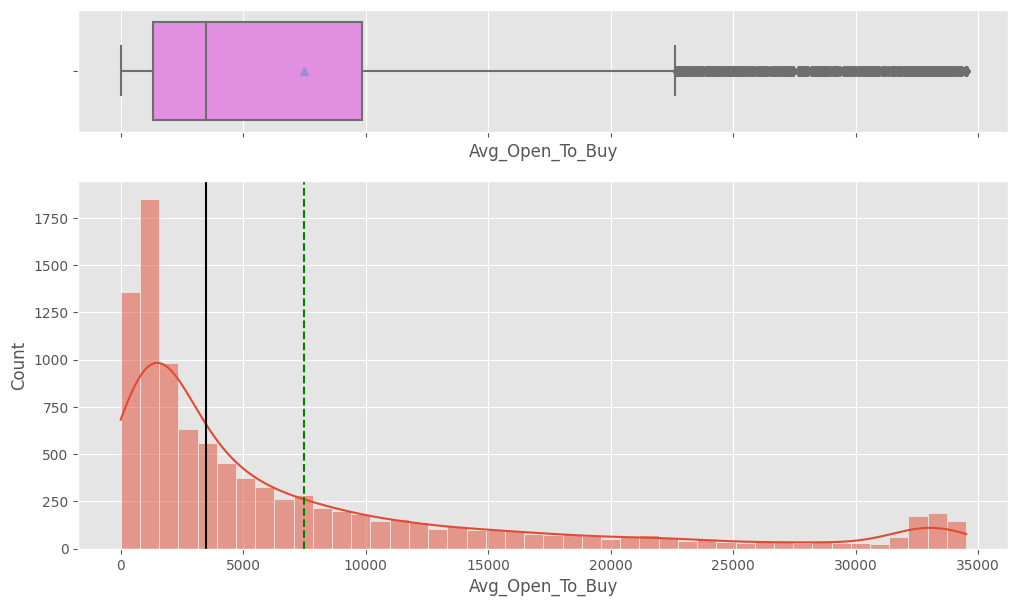

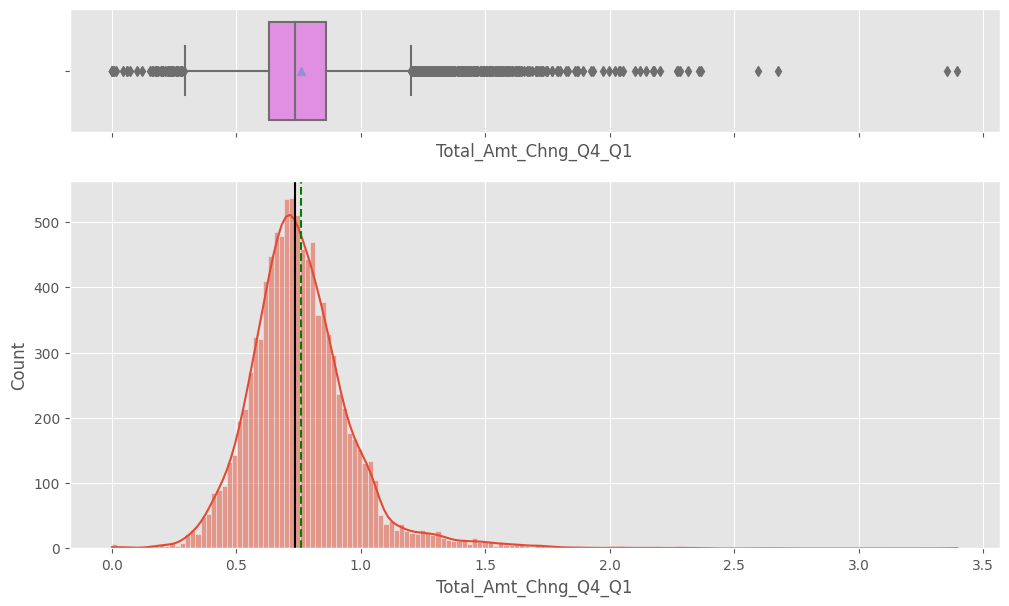

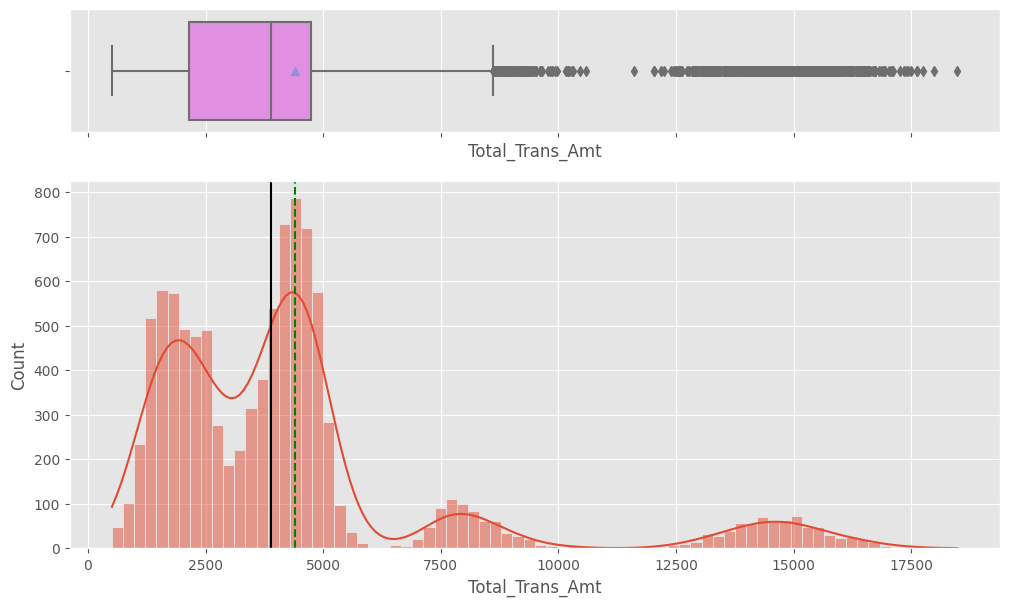

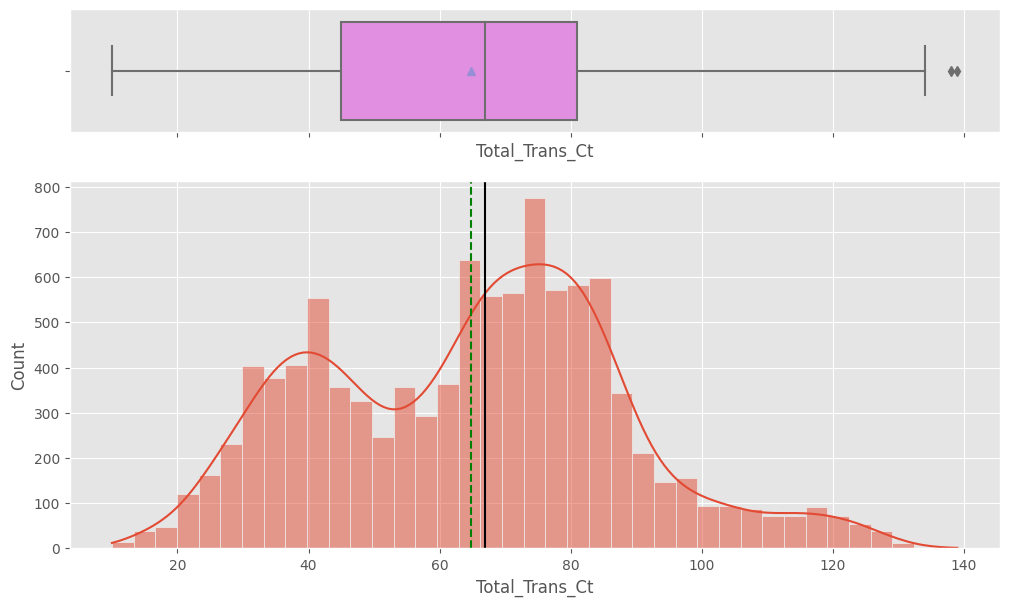

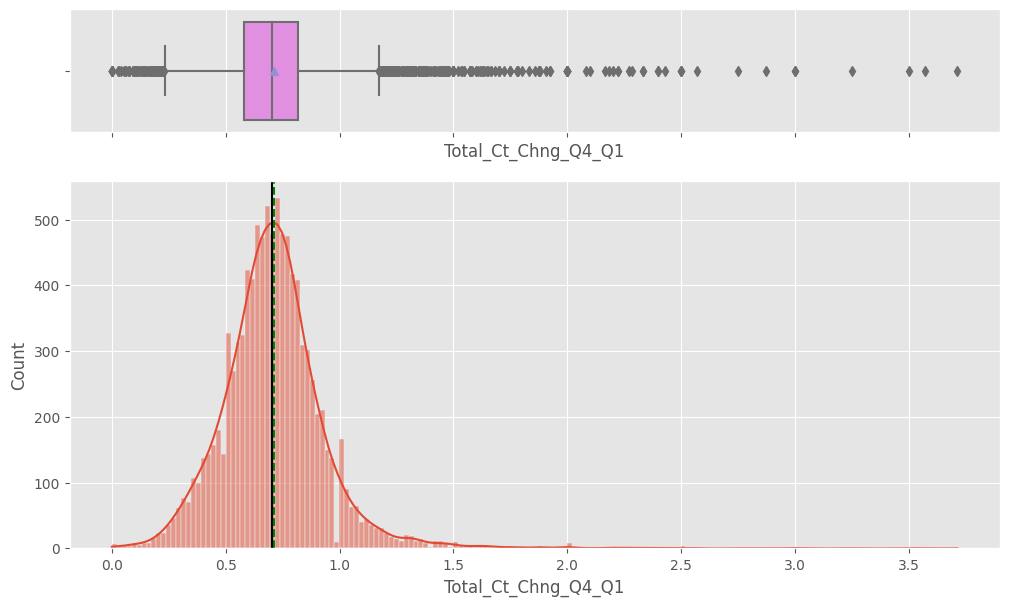

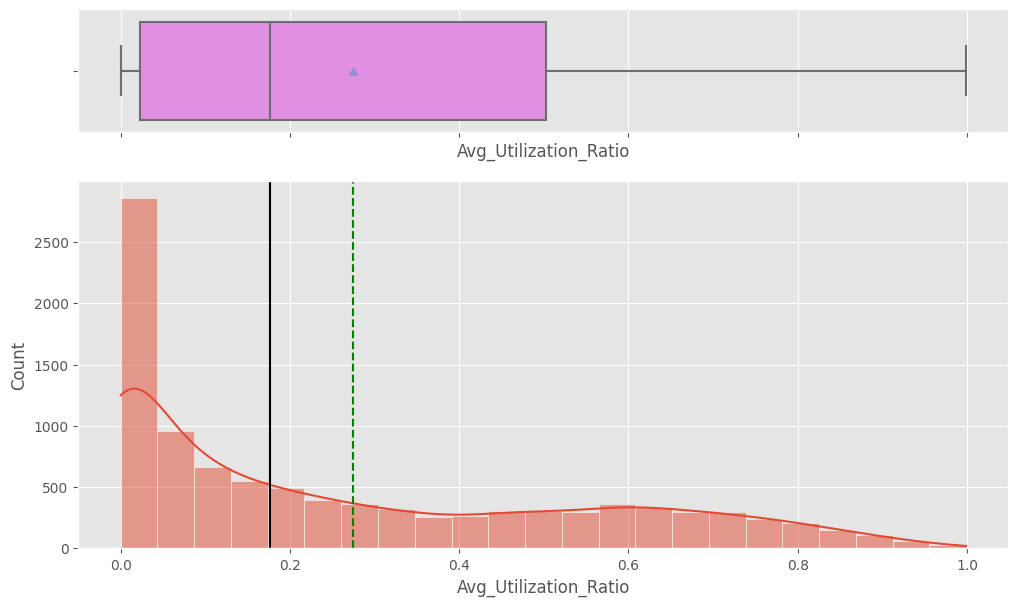

In [11]:
# Function to plot a boxplot and a histogram along the same scale


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

# List of numerical variables to visualize
numerical_vars = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
    'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

# Visualize each numerical variable
for feature in numerical_vars:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None)

### Univariate Analysis

#### Numerical Features

#### Observations:

1. **Customer_Age**
 * **Distribution:** Appears to be normally distributed.
 * **Outliers:** Some outliers present in the higher age range, which could be senior customers.
2. **Dependent_count**
 * **Distribution:** Most customers have 2-3 dependents. Slightly left-skewed.
 * **Outliers:** No apparent outliers.
3. **Months_on_book**
 * **Distribution:** Peaks around 36 months. Slightly right-skewed.
 * **Outliers:** Some outliers present on the higher end.
4. **Total_Relationship_Count**
 * **Distribution:** Uniformly distributed among different product counts.
 * **Outliers:** No apparent outliers.
5. **Months_Inactive_12_mon**
 * **Distribution:** Majority of customers have been inactive for 1-3 months. Slightly right-skewed.
 * **Outliers:** Some outliers present on the higher end.
6. **Contacts_Count_12_mon**
 * **Distribution:** Most customers have been contacted 2-3 times. Slightly right-skewed.
 * **Outliers:** Some outliers present on the higher end.
7. **Credit_Limit**
 * **Distribution:** Right-skewed with most customers having lower limits. Significantly right-skewed.
 * **Outliers:** Outliers present in the higher credit limit range.
8. **Total_Revolving_Bal**
 * **Distribution:** Bimodal, peaks around 0 and 2,500.
 * **Outliers:** No apparent outliers.
9. **Avg_Open_To_Buy**
 * **Distribution:** Right-skewed with most customers having lower values. Significantly right-skewed.
 * **Outliers:** Outliers present in the higher range.
10. **Total_Amt_Chng_Q4_Q1**
 * **Distribution:** The distribution is right-skewed, indicating that most customers have a lower amount change from Q4 to Q1.
 * **Outliers:** Outliers present in the higher range.
11. **Total_Trans_Amt**
 * **Distribution:** The distribution is right-skewed, indicating that most customers have lower transaction amounts.
 * **Outliers:** Outliers are present in the higher transaction amounts.
12. **Total_Trans_Ct**
 * **Distribution:** The distribution seems to be fairly normal, but with a slight right skew.
 * **Outliers:** Outliers might be present in the higher transaction count.
13. **Total_Ct_Chng_Q4_Q1**
 * **Distribution:** The distribution is right-skewed, indicating that most customers have a lower change in transaction count from Q4 to Q1.
 * **Outliers:** Outliers are present in both higher and lower ends.
14. **Avg_Utilization_Ratio**
 * **Distribution:** The distribution is right-skewed, indicating that most customers have a higher average utilization ratio.
 * **Outliers:** No apparent outliers.

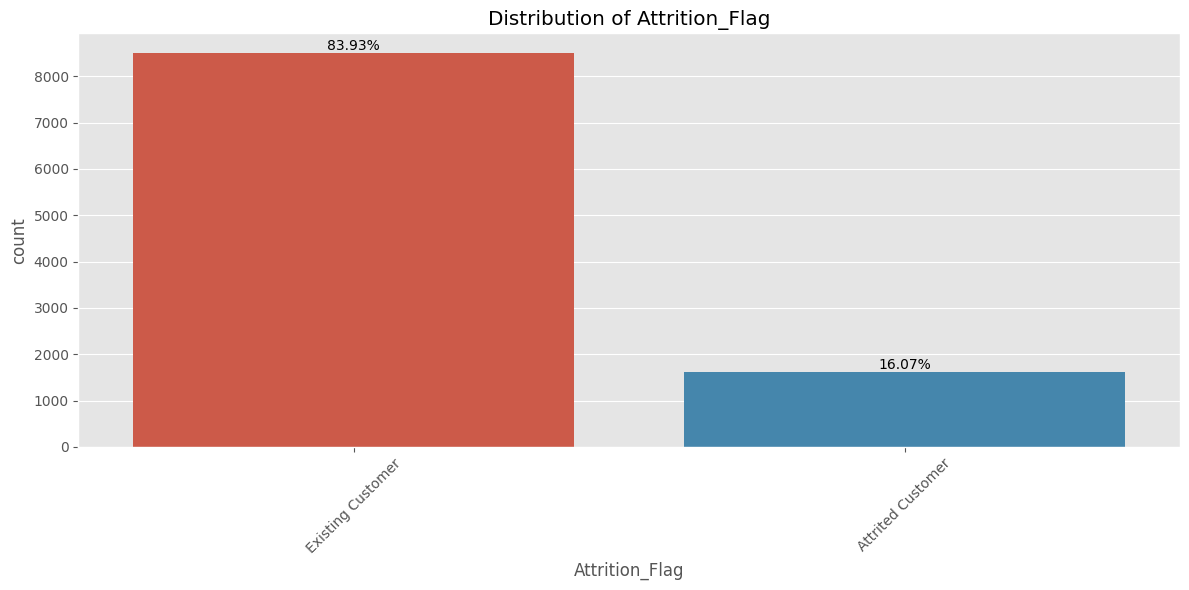

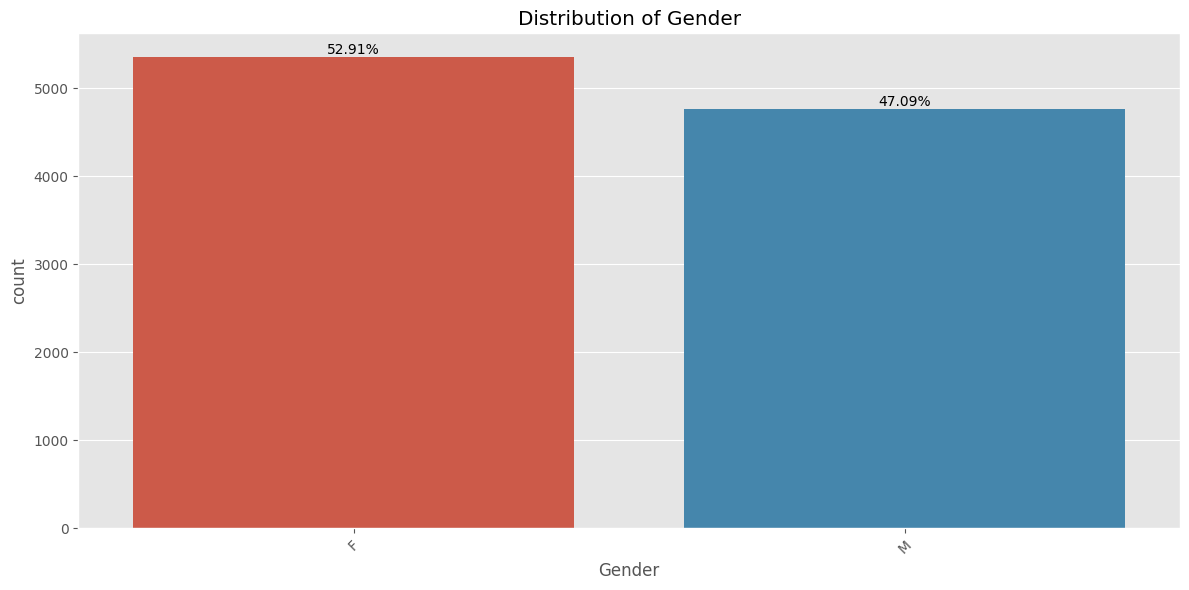

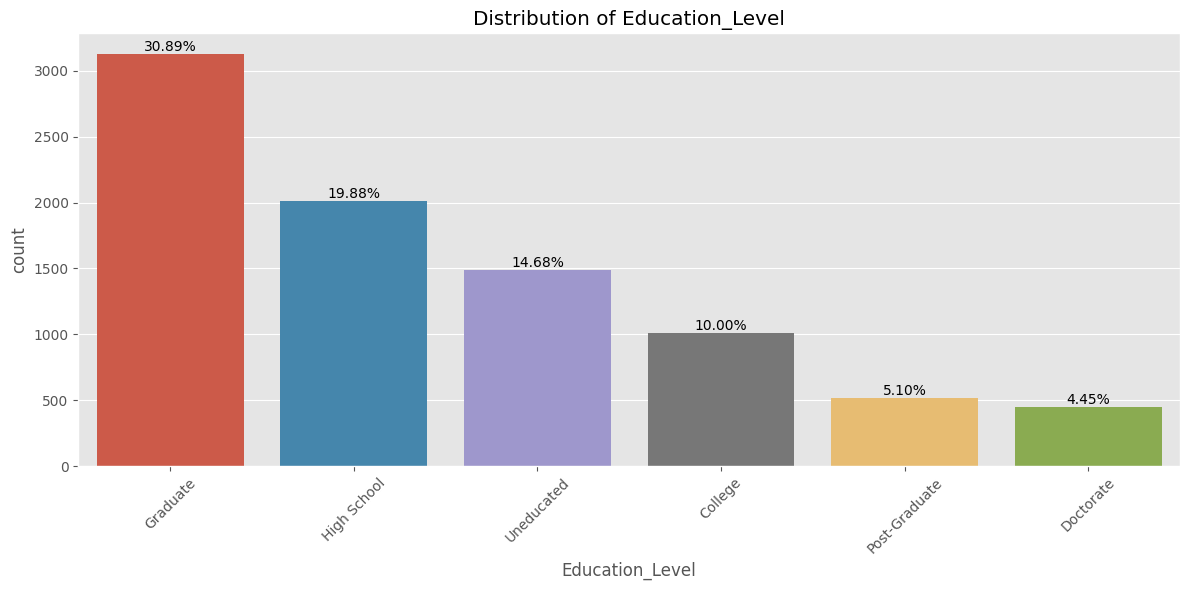

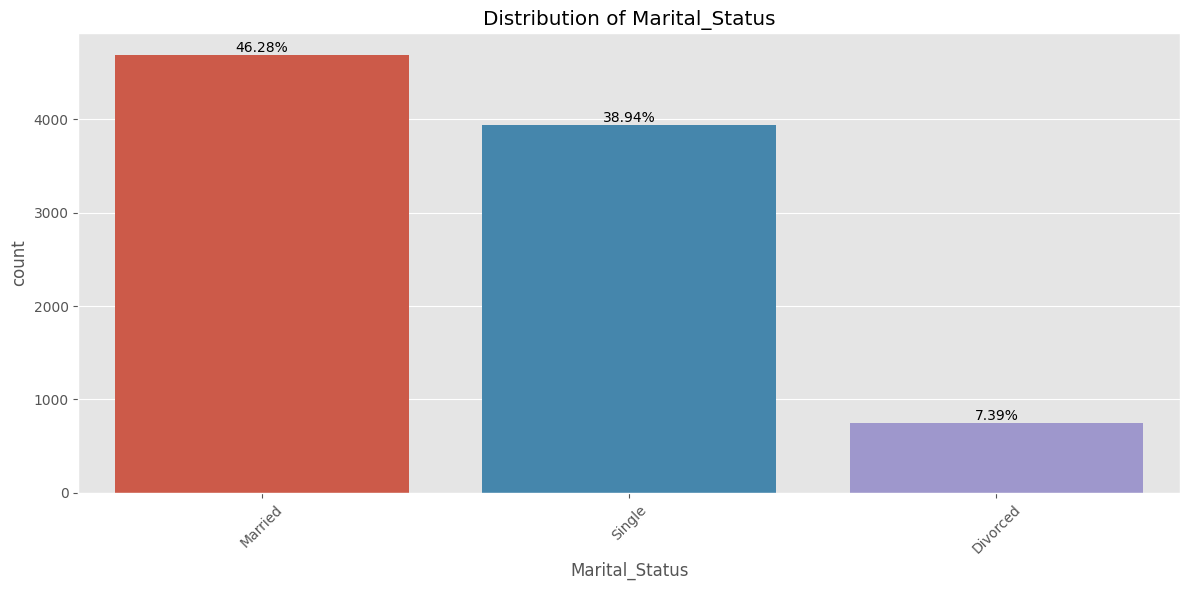

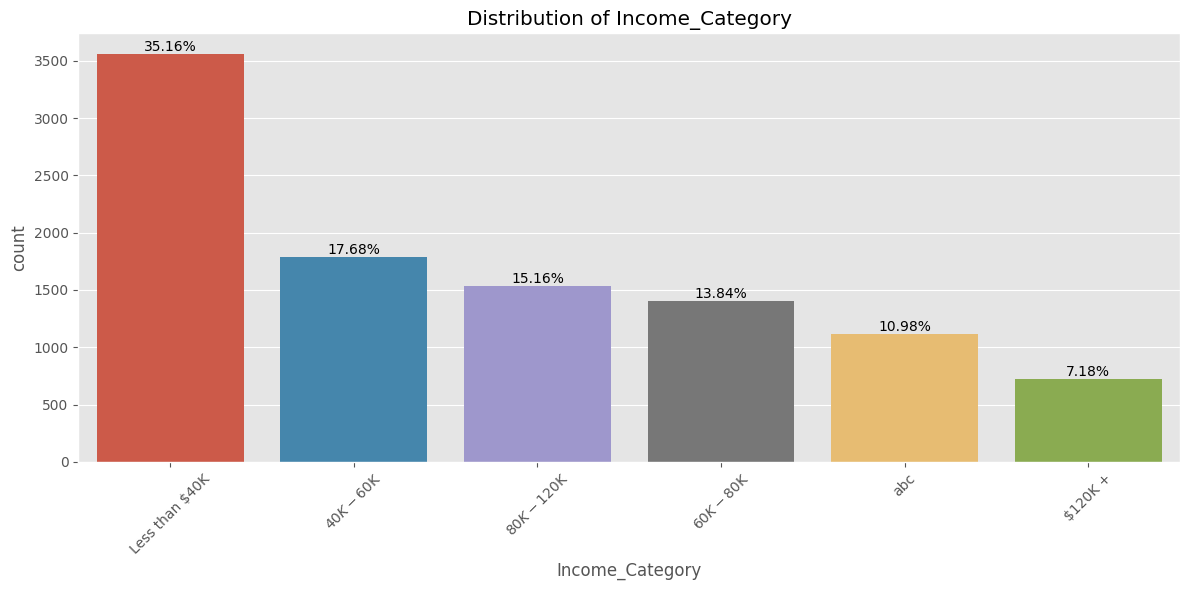

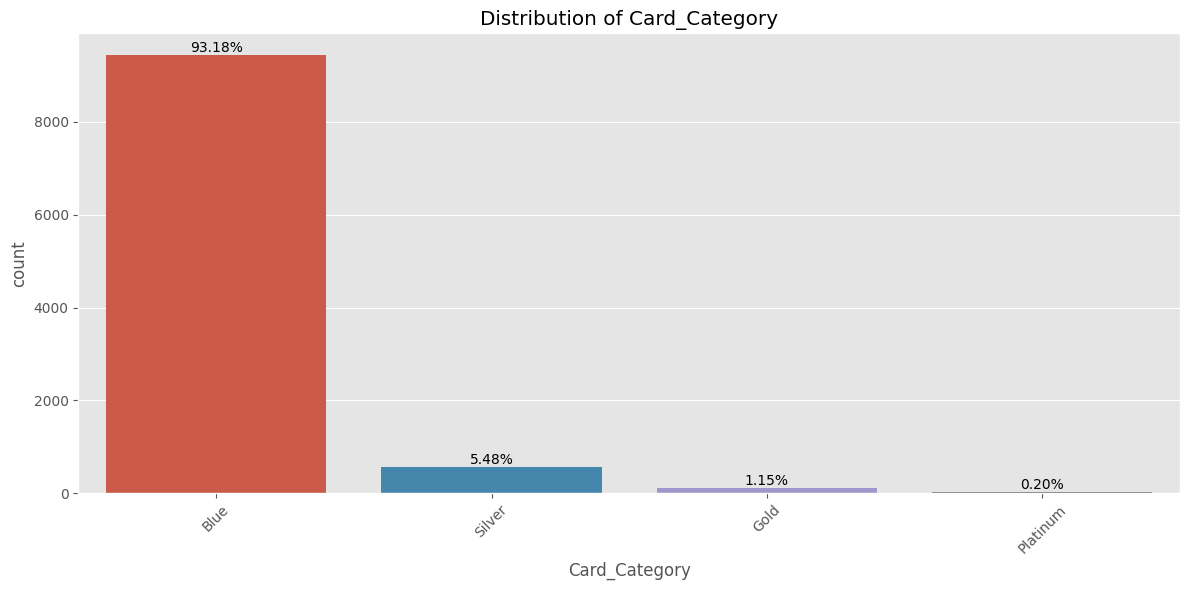

In [12]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    - data (DataFrame): The data frame containing the categorical feature.
    - feature (str): The name of the categorical feature.
    - perc (bool): Whether to print percentages instead of counts.
    - n (int): The number of categories to print (None for all).
    """
    total = len(data[feature])  # length of the column
    count = data[feature].value_counts().iloc[:n]  # count per category

    # Plot
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x=feature, order=count.index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)

    # Print count/percentage
    for i, key in enumerate(count.index):
        val = count.iloc[i]
        pct = 100 * val / total
        if perc:
            plt.text(i, val, f'{pct:.2f}%', ha='center', va='bottom')
        else:
            plt.text(i, val, f'{val}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Call the function for each specified feature
categorical_features = [
    'Attrition_Flag', 'Gender', 'Education_Level',
    'Marital_Status', 'Income_Category', 'Card_Category'
]

for feature in categorical_features:
    labeled_barplot(data, feature, perc=True, n=None)

#### Categorical Features

#### Observations:

The visualizations provide insights into the distribution of key variables:

* Attrition_Flag
 * A significant majority of customers (84%) are existing customers, while a smaller percentage (16%) have churned.
* Gender
 * The dataset is fairly balanced in terms of gender, with females making up approximately 52% and males around 48%.
* Education_Level
 * The majority of customers have graduated, followed by those with a high school education.
 * "Unknown" and "Uneducated" categories also have a notable presence.
 * The least represented category is "Doctorate."
* Marital_Status
 * The majority of customers are married, followed by singles and then divorced individuals.
 * There is a notable portion of customers with "Unknown" marital status.
* Income_Category
 * A large portion of customers have an income of less than 40K.
 * The 120K income category is the least represented in the dataset.
 * Other income categories are fairly evenly distributed.
* Card_Category
 * The vast majority of customers (~93%) have a blue card.
 * Other card categories (Silver, Gold, Platinum) are significantly less prevalent.

#### Considerations:
* Imbalance in Attrition_Flag: The significant imbalance in the 'Attrition_Flag' feature (target variable) might require addressing during model training to avoid bias towards the majority class.

* Unknown Categories: The presence of "Unknown" categories in 'Education_Level' and 'Marital_Status' might indicate missing data and should be considered during data preprocessing.

* Card_Category Imbalance: The 'Card_Category' feature is highly imbalanced and might have limited predictive power in its current form. Feature engineering or alternative handling might be considered.

* Ordinal Encoding: Features like 'Education_Level' and 'Income_Category' might benefit from ordinal encoding due to the inherent order in their categories.

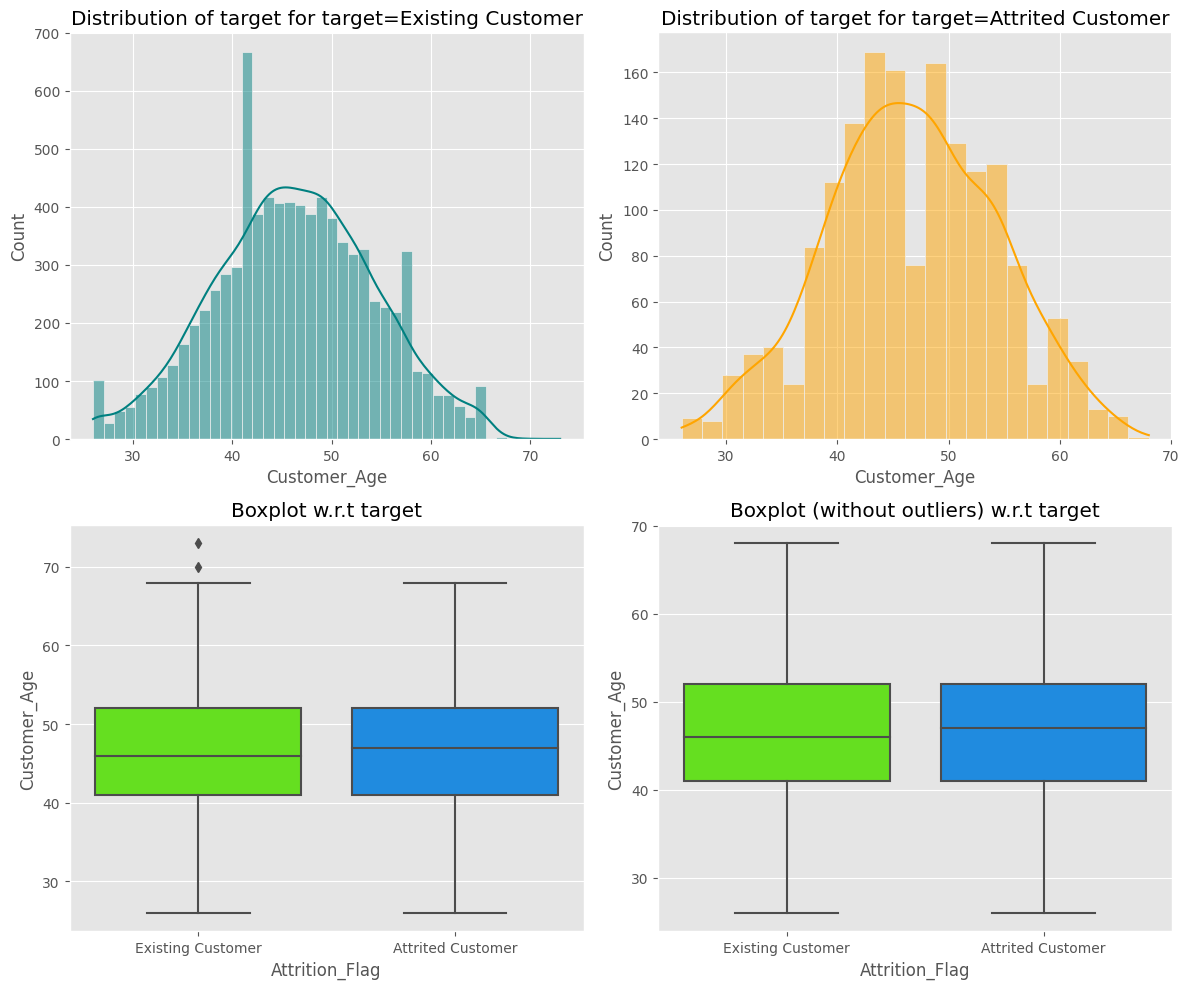

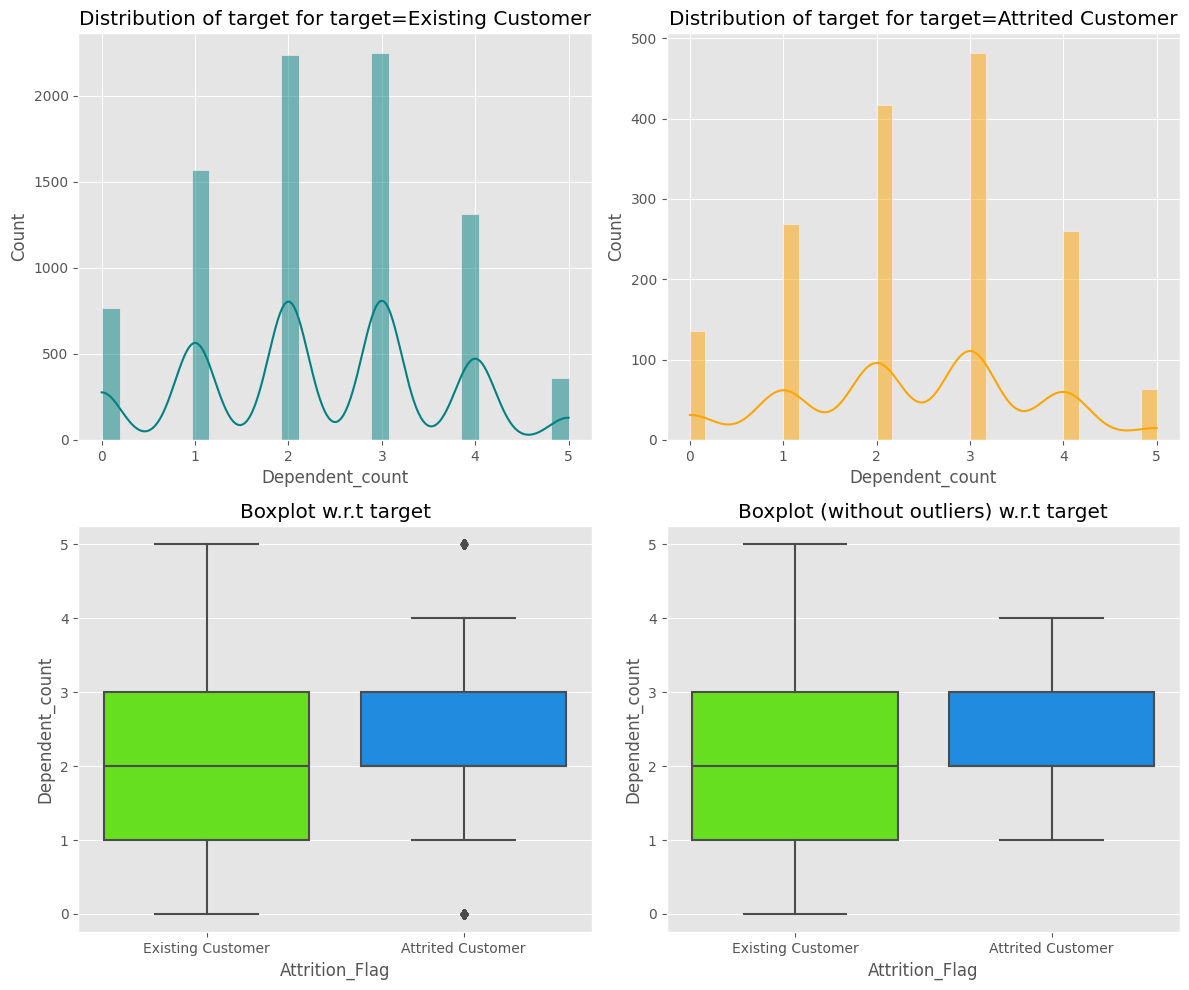

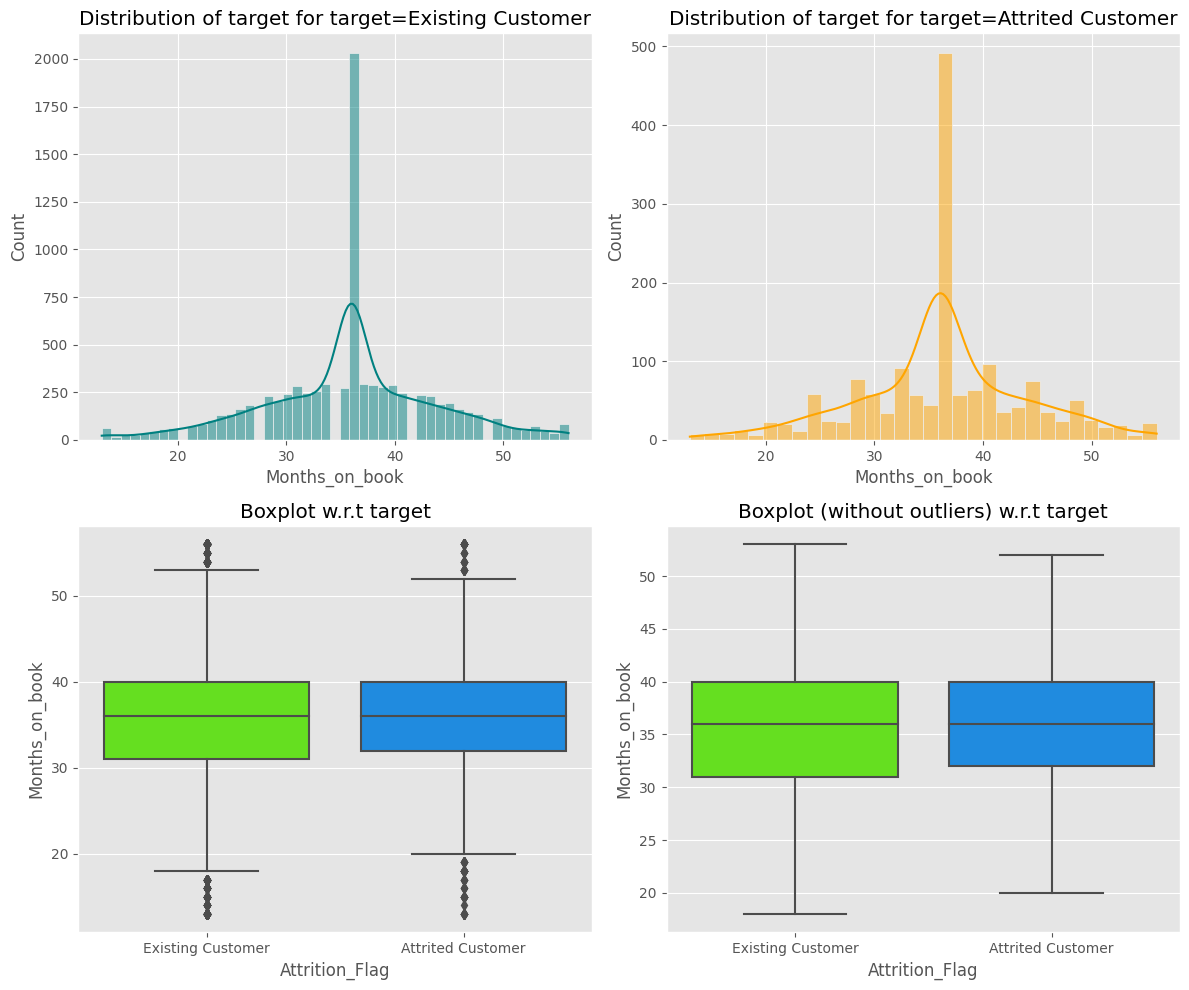

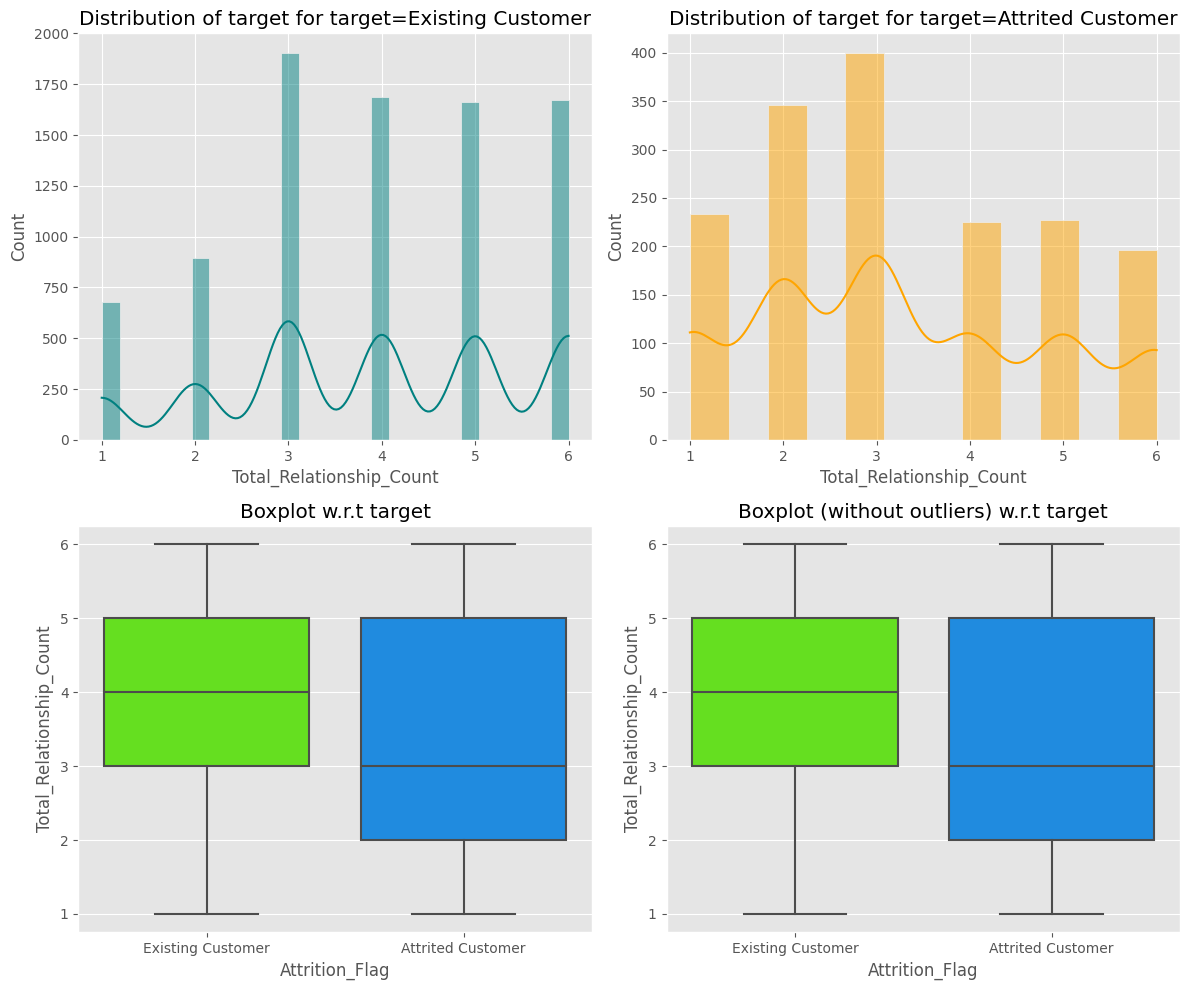

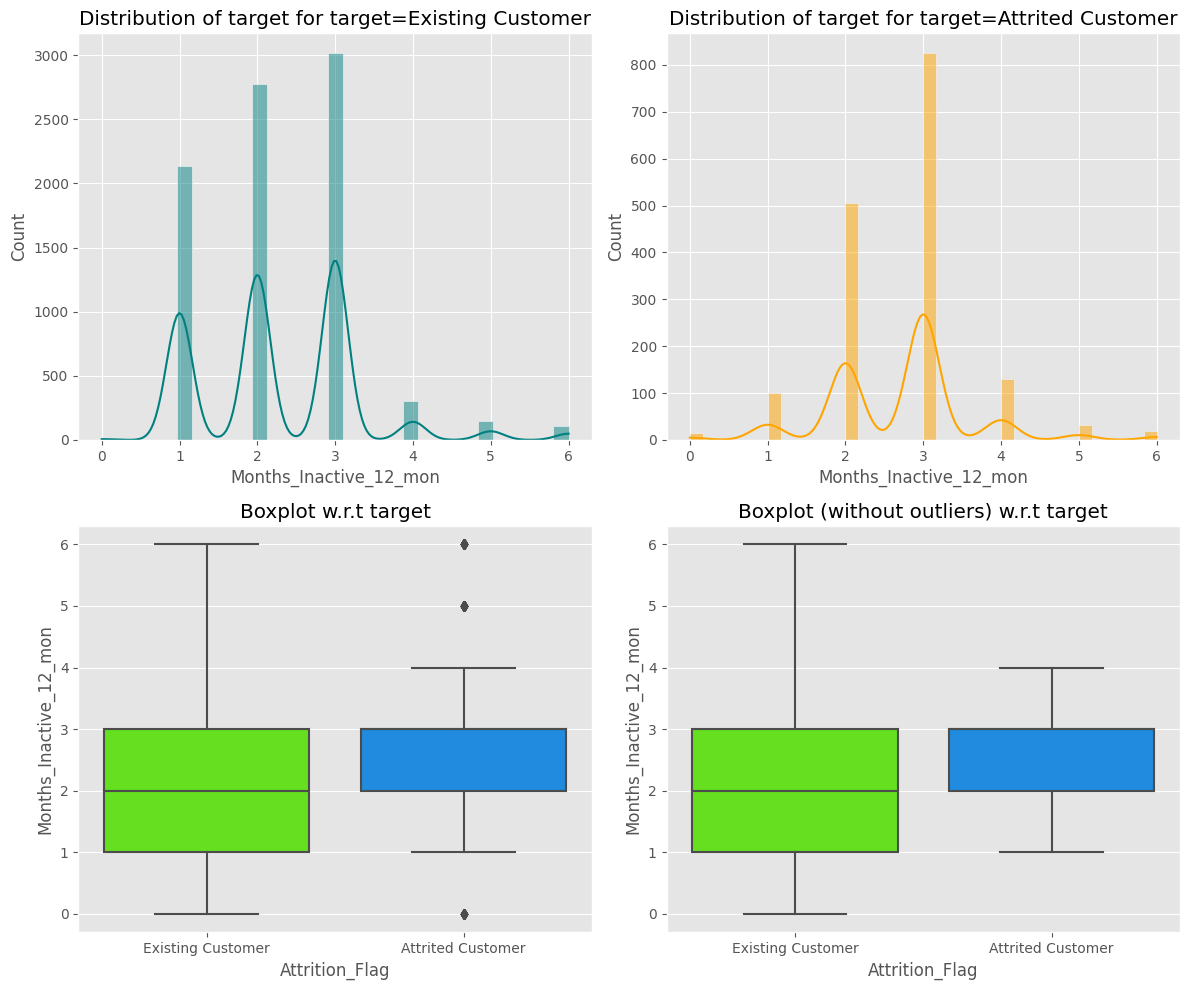

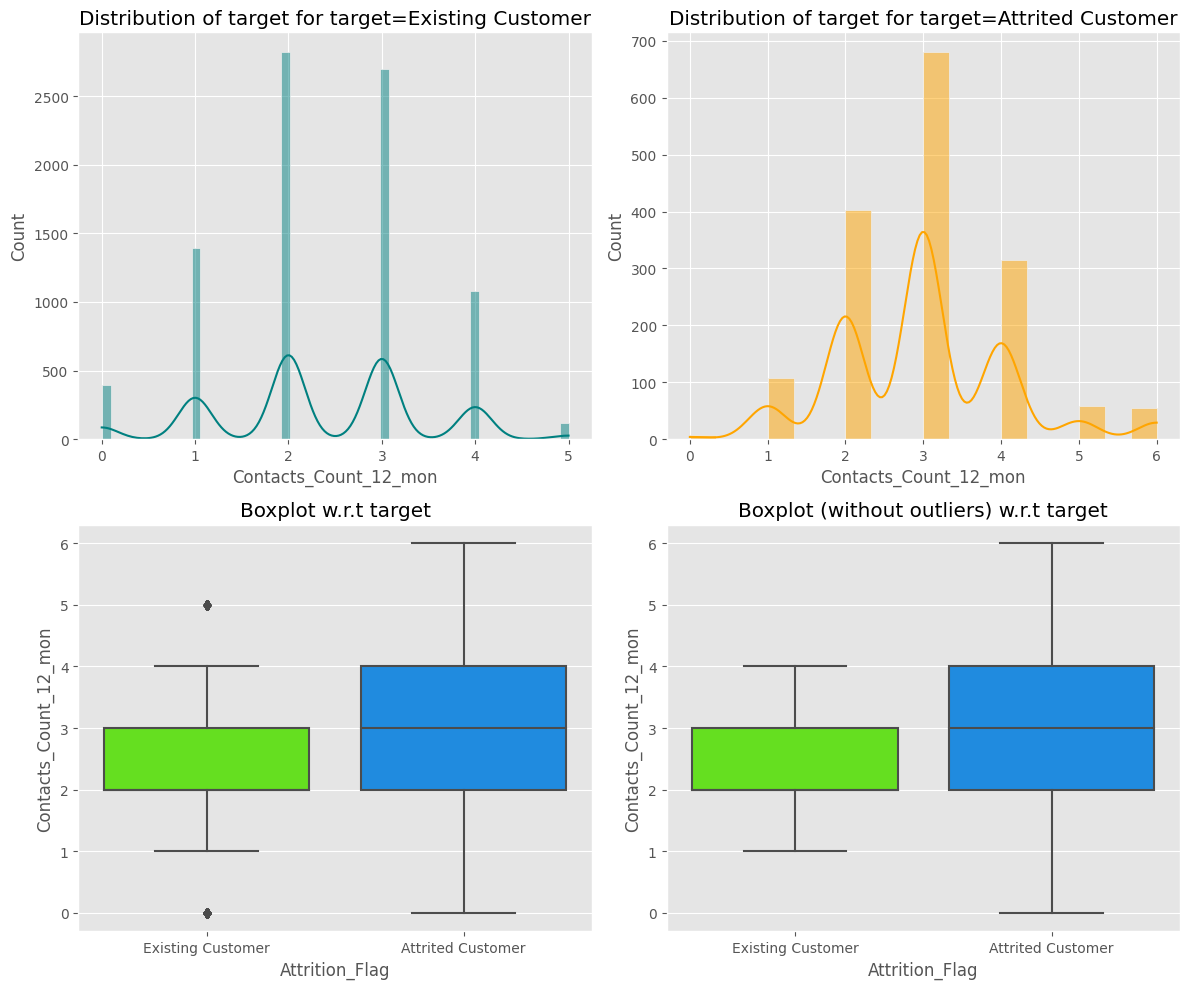

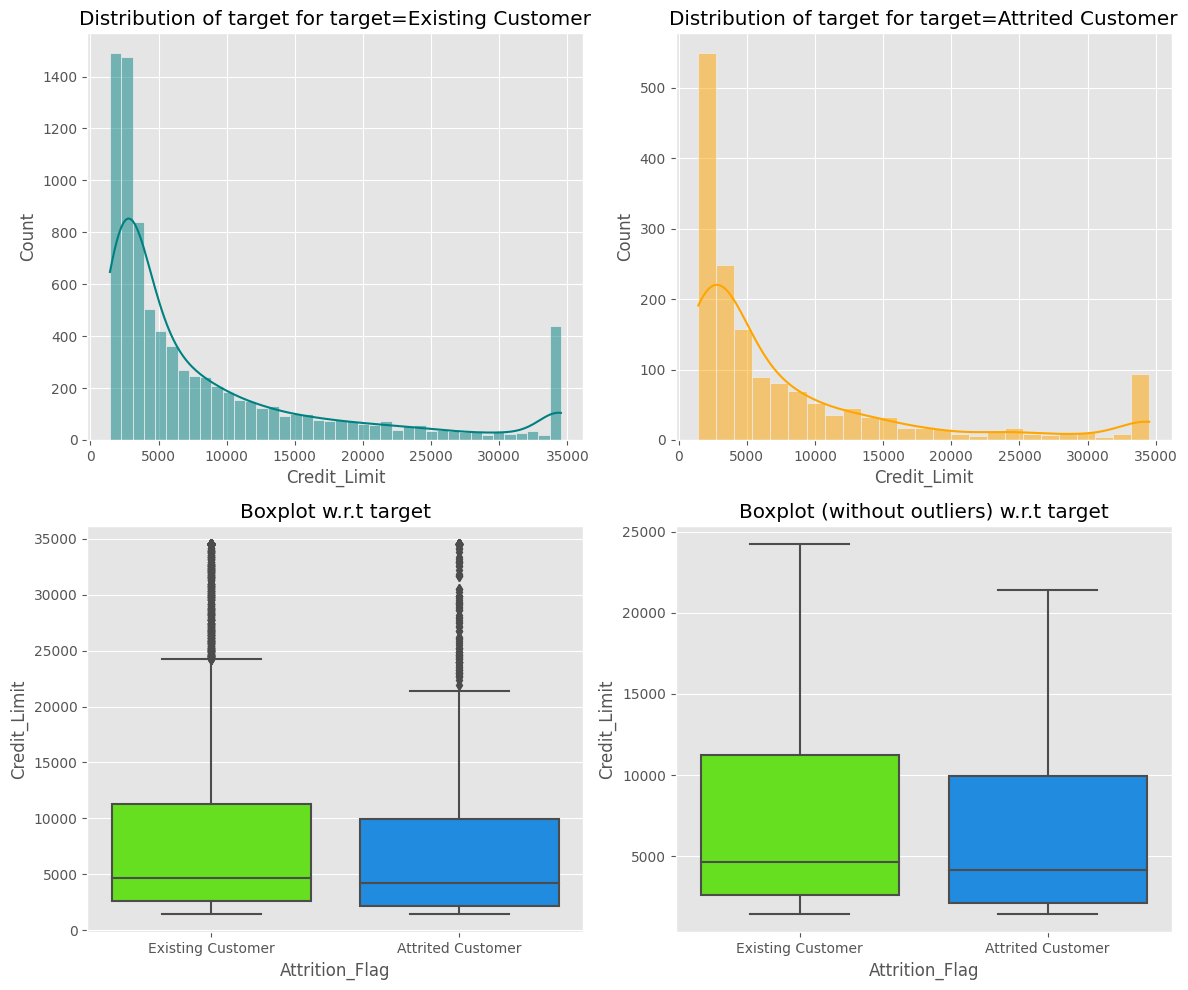

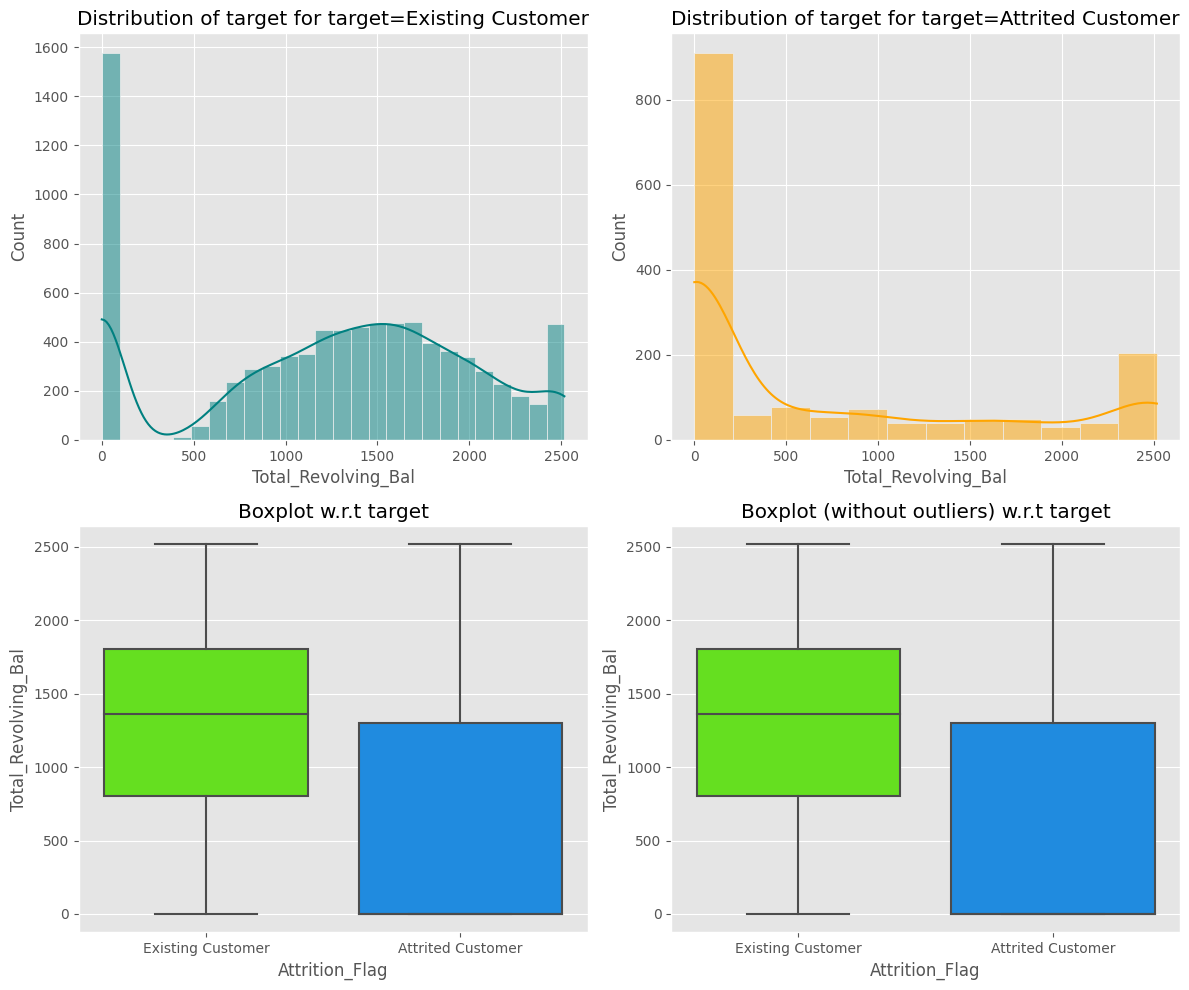

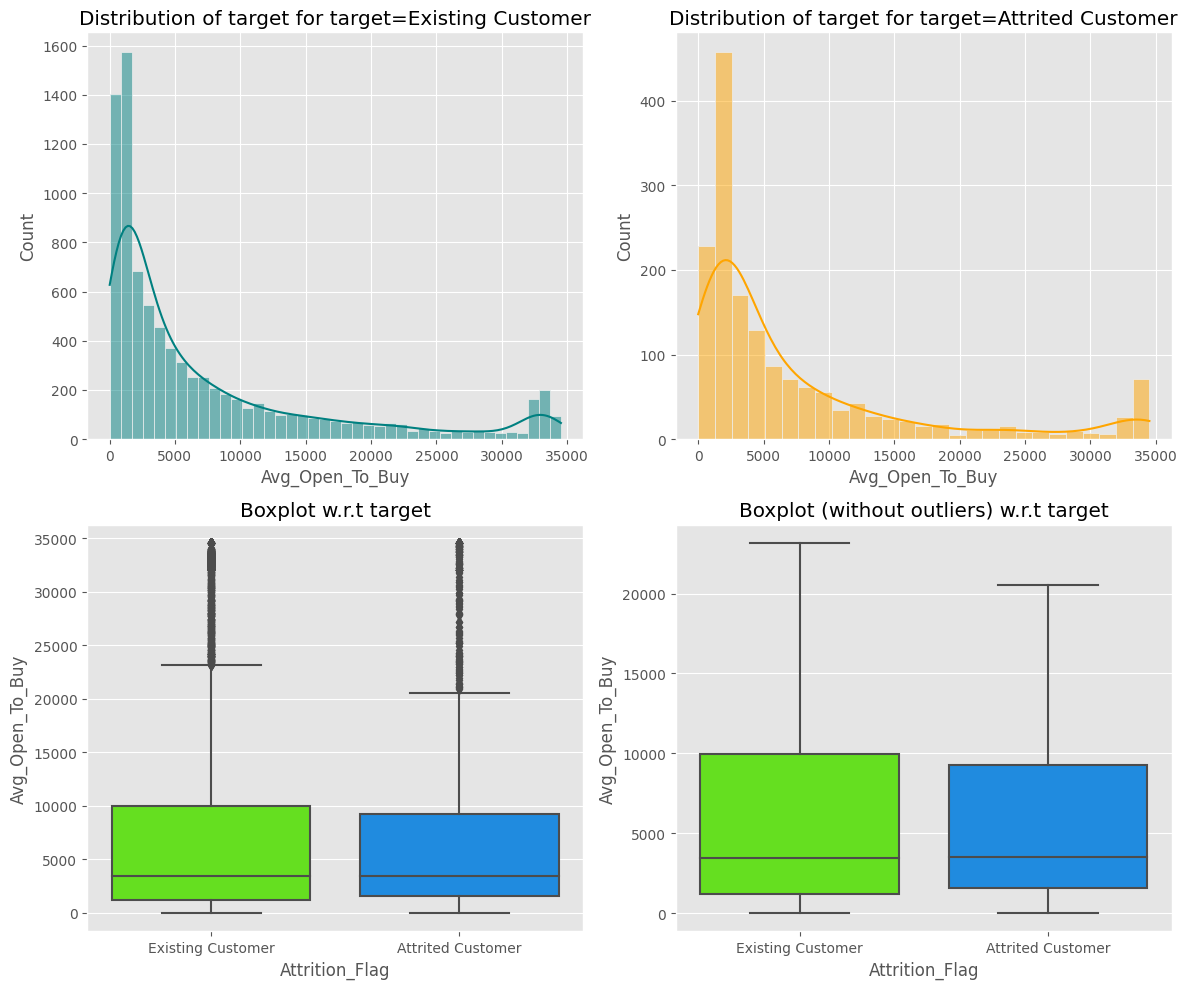

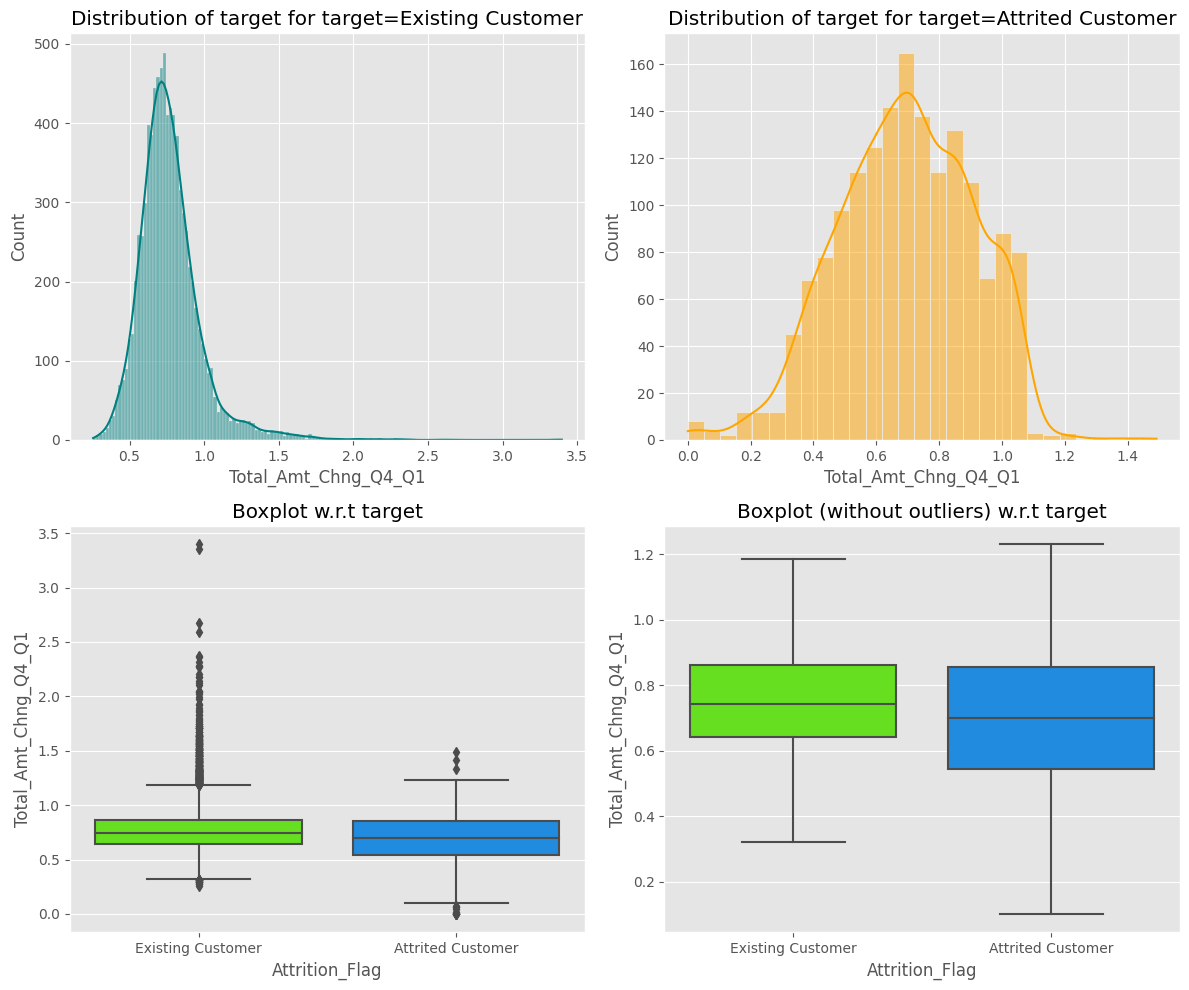

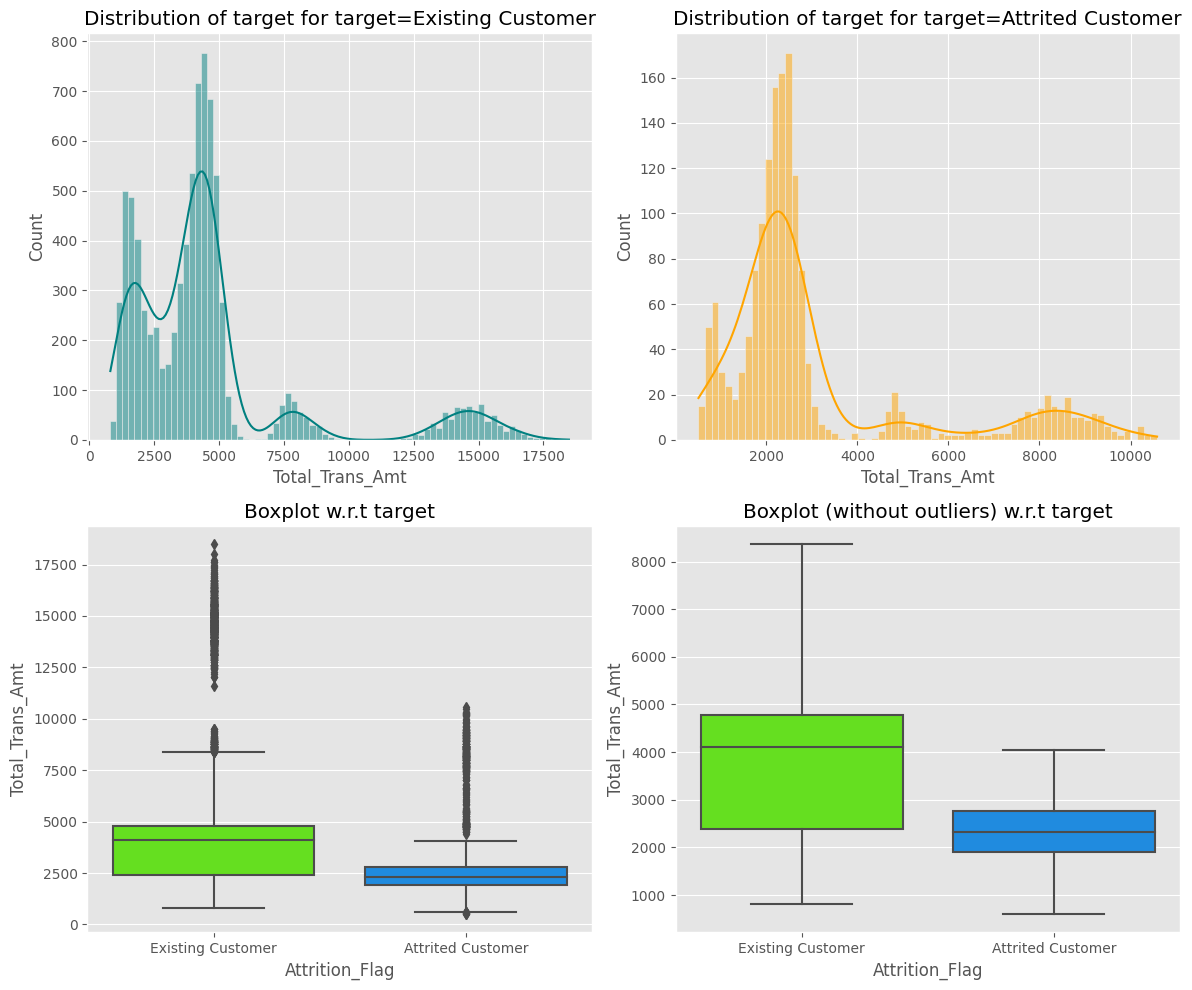

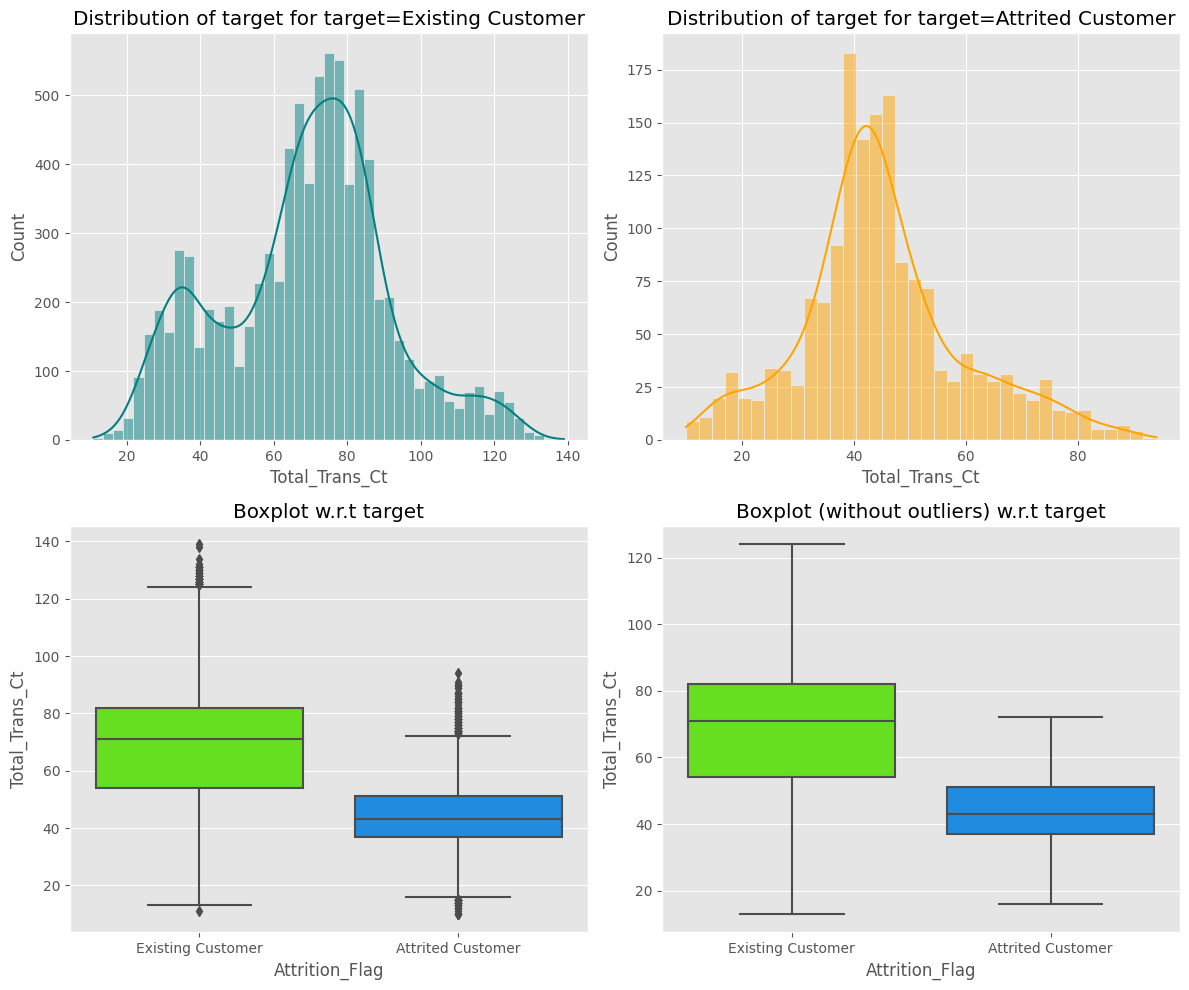

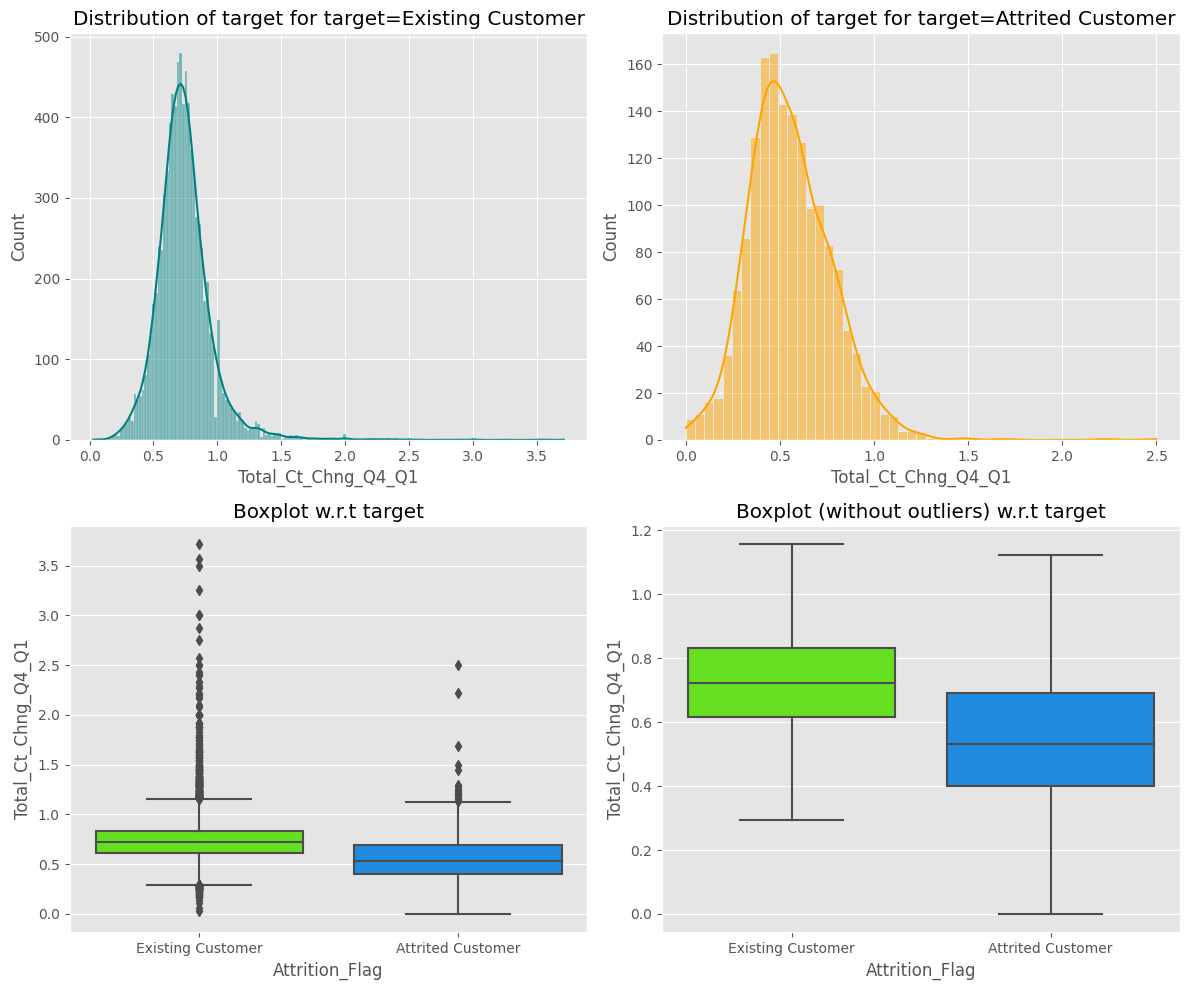

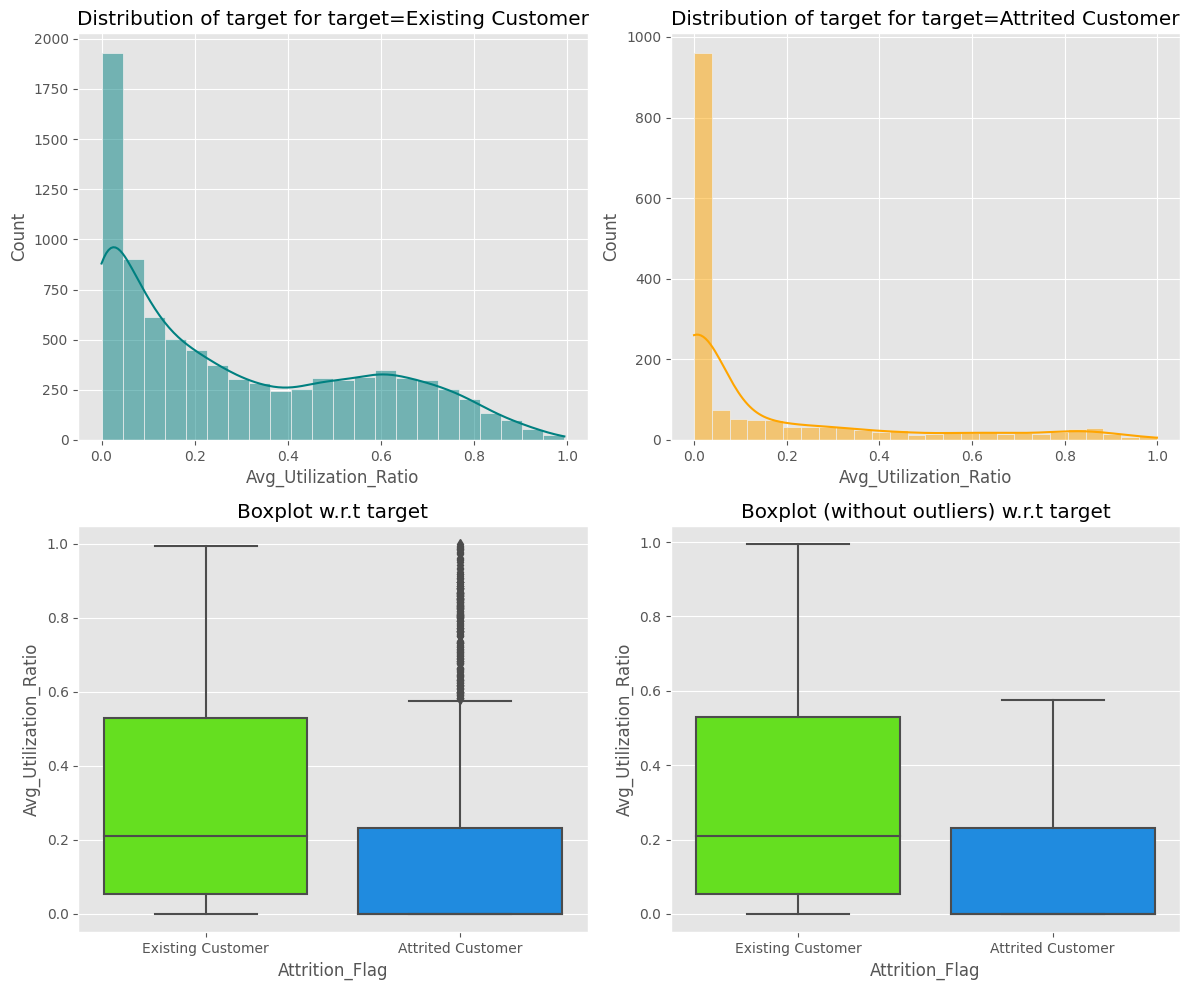

In [13]:
# Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

numerical_vars = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
    'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

target = 'Attrition_Flag'

for var in numerical_vars:
    distribution_plot_wrt_target(data, var, target)

### Bivariate Analysis

#### Numerical Features

#### Observations:

The visualizations provide insights into the relationships between the target variable and the numerical features.

 * Customer_Age vs. Attrition_Flag
  * The age distribution for both existing and attrited customers is quite similar and somewhat normally distributed.
  * There doesn’t appear to be a significant age group that is more prone to churn.
 * Dependent_count vs. Attrition_Flag
  * Customers with different numbers of dependents show a similar pattern of attrition.
  * No particular number of dependents stands out as having a notably higher or lower attrition rate.
 * Months_on_book vs. Attrition_Flag
  * The months on book (tenure) does not show a clear pattern differentiating existing and attrited customers.
  * Both categories seem to follow a similar distribution.
 * Total_Relationship_Count vs. Attrition_Flag
  * Customers with fewer total relationship counts (products) seem to have a slightly higher density in the attrited category.
  * Customers with more products tend to stay with the bank.
 * Months_Inactive_12_mon vs. Attrition_Flag
  * Customers who have been inactive for 2-3 months have a higher density in the attrited category.
  * Active customers or those with longer inactive periods are less likely to churn.
 * Contacts_Count_12_mon vs. Attrition_Flag
  * Customers with higher contact counts in the last 12 months tend to have a higher density in the attrited category.
  * Less contacted customers are more likely to stay.
 * Credit_Limit vs. Attrition_Flag
  * The credit limit does not show a clear pattern that differentiates between the two categories of the target variable.
 * Total_Revolving_Bal vs. Attrition_Flag
  * Customers with lower total revolving balances have a higher density in the attrited category.
  * Higher revolving balances are associated with existing customers.
 * Avg_Open_To_Buy vs. Attrition_Flag
  * No clear pattern is observed in the "Avg_Open_To_Buy" variable with respect to attrition.
 * Total_Amt_Chng_Q4_Q1 vs. Attrition_Flag
  * Both categories of the target variable seem to follow a similar distribution for this variable.
 * Total_Trans_Amt vs. Attrition_Flag
  * No clear pattern is observed in the "Total_Trans_Amt" variable with respect to attrition.
 * Total_Trans_Ct vs. Attrition_Flag
  * Customers with lower transaction counts have a higher density in the attrited category.
Higher transaction counts are associated with existing customers.
 * Total_Ct_Chng_Q4_Q1 vs. Attrition_Flag
  * Both categories of the target variable seem to follow a similar distribution for this variable.
 * Avg_Utilization_Ratio vs. Attrition_Flag
  * Customers with lower average utilization ratios have a higher density in the attrited category.
  * Higher utilization ratios are associated with existing customers.

#### General Observations:
 * Some numerical variables like "Total_Relationship_Count", "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Total_Revolving_Bal", "Total_Trans_Ct", and "Avg_Utilization_Ratio" show patterns that might be indicative of customer attrition.



Stacked Barplot and Counts for: Gender

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


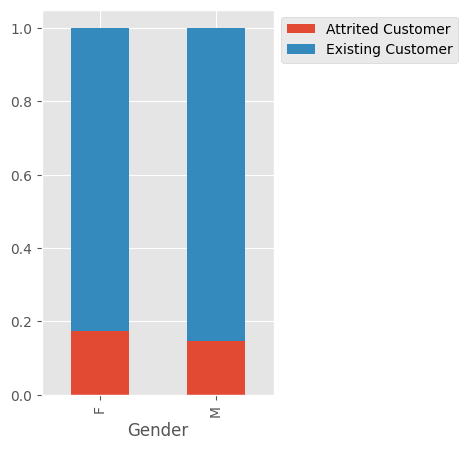



Stacked Barplot and Counts for: Education_Level

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


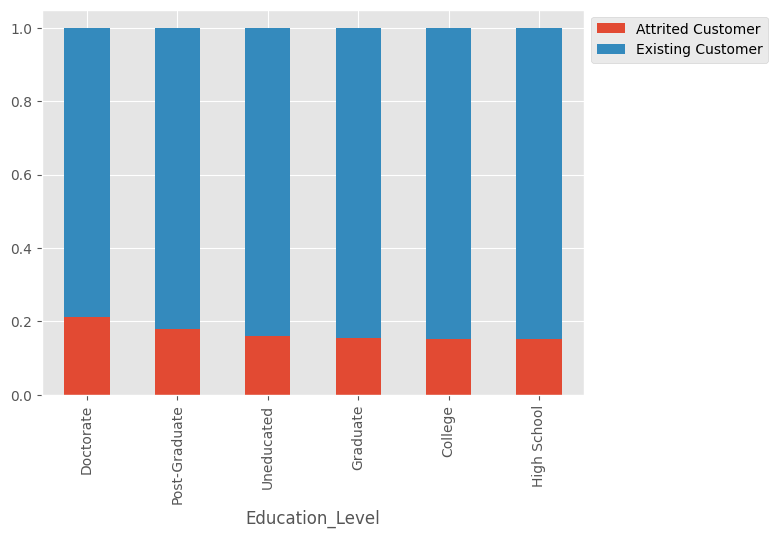



Stacked Barplot and Counts for: Marital_Status

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


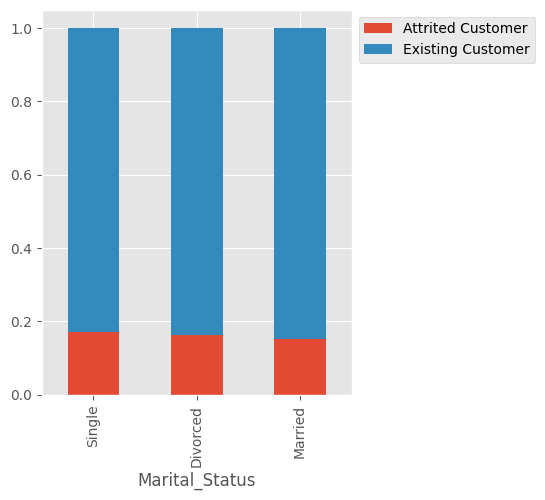



Stacked Barplot and Counts for: Income_Category

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


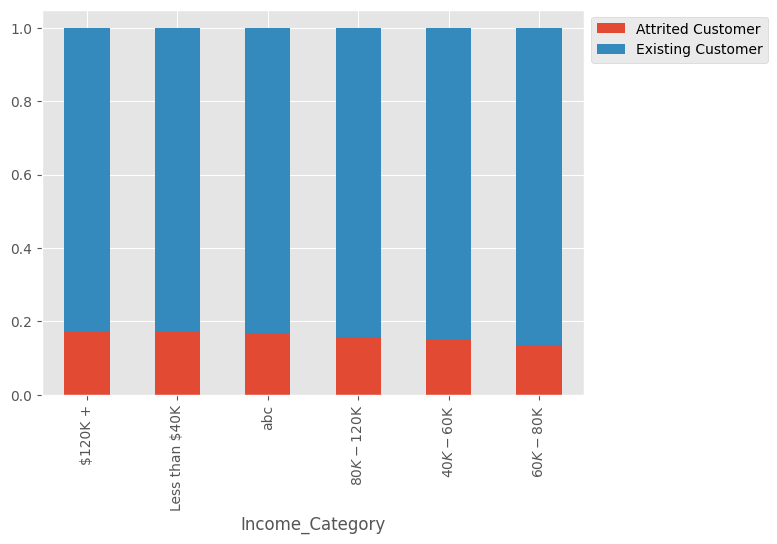



Stacked Barplot and Counts for: Card_Category

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


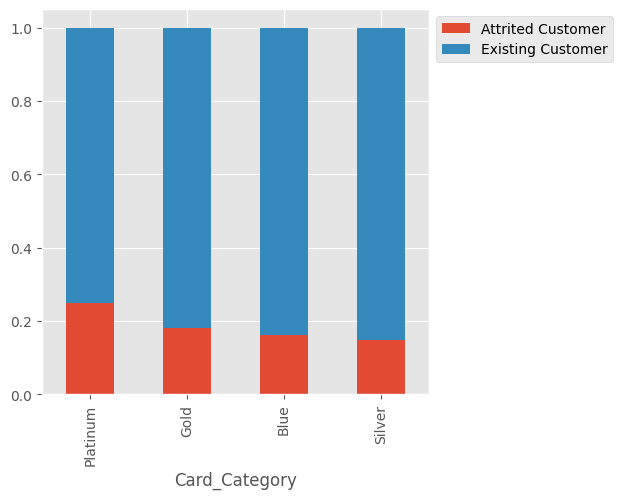

In [14]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

# List of categorical predictors
categorical_predictors = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Target variable
target = 'Attrition_Flag'

# Call the function for each predictor
for predictor in categorical_predictors:
    print(f'\n\nStacked Barplot and Counts for: {predictor}\n')
    stacked_barplot(data, predictor, target)


#### Categorical Features

#### Observations:

The visualizations provide insights into the relationships between the target variable and the categorical features.

* Gender vs. Attrition_Flag
 * Both genders have a higher proportion of "Existing Customer" than "Attrited Customer", indicating that the churn rate is less than the retention rate for both genders.
 * The proportion of attrition seems slightly higher for females than males.
* Education_Level vs. Attrition_Flag
 * Across all education levels, the proportion of existing customers is higher than attrited customers.
 * The "Unknown" and "Uneducated" categories have slightly lower attrition proportions compared to other education levels.
 * The "Graduate" and "Post-Graduate" categories show a somewhat similar attrition rate.
* Marital_Status vs. Attrition_Flag
 * AAll marital status categories predominantly have existing customers.
 * "Married" and "Single" categories have a slightly higher proportion of attrition compared to the "Unknown" and "Divorced" categories.
* Income_Category vs. Attrition_Flag
 * Across all income categories, the majority of customers are retained.
 * The "$120K +" income category has a notably lower proportion of attrition compared to other categories.
 * The "Unknown" income category also shows a lower attrition rate.
* Card_Category vs. Attrition_Flag
 * The "Blue" card category has the highest number of customers and shows a higher proportion of existing customers.
 * Other card categories ("Gold", "Silver", "Platinum") have significantly fewer customers, but they also predominantly consist of existing customers.
 * The attrition rate does not show a significant difference across different card categories.

#### General Observations:
* Across all categorical variables, the proportion of existing customers is higher than attrited customers, indicating a general trend of customer retention in the dataset.
* There doesn’t appear to be a single categorical variable that shows a clear, distinct difference in proportions between existing and attrited customers, suggesting that attrition may be influenced by a combination of factors.

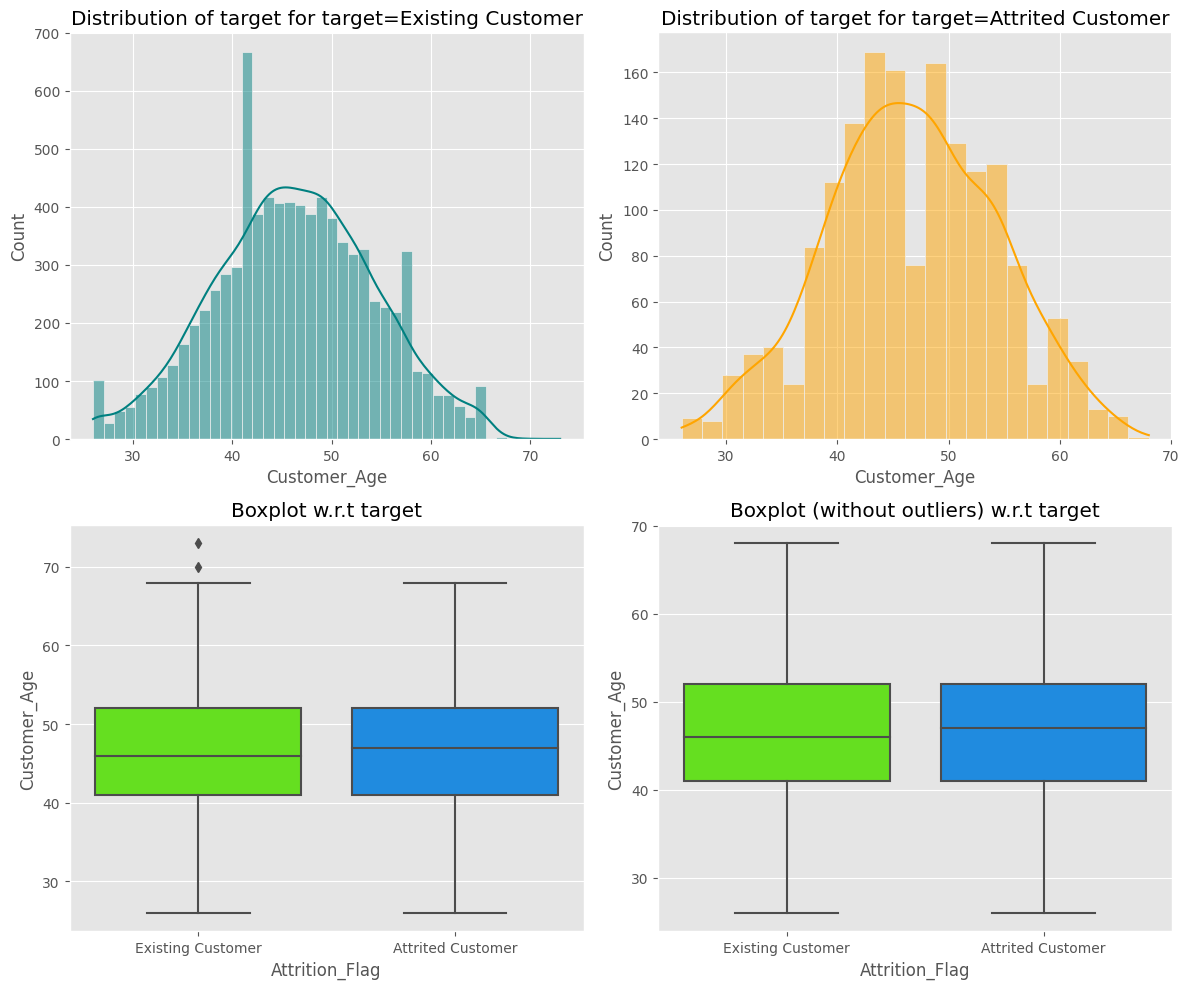

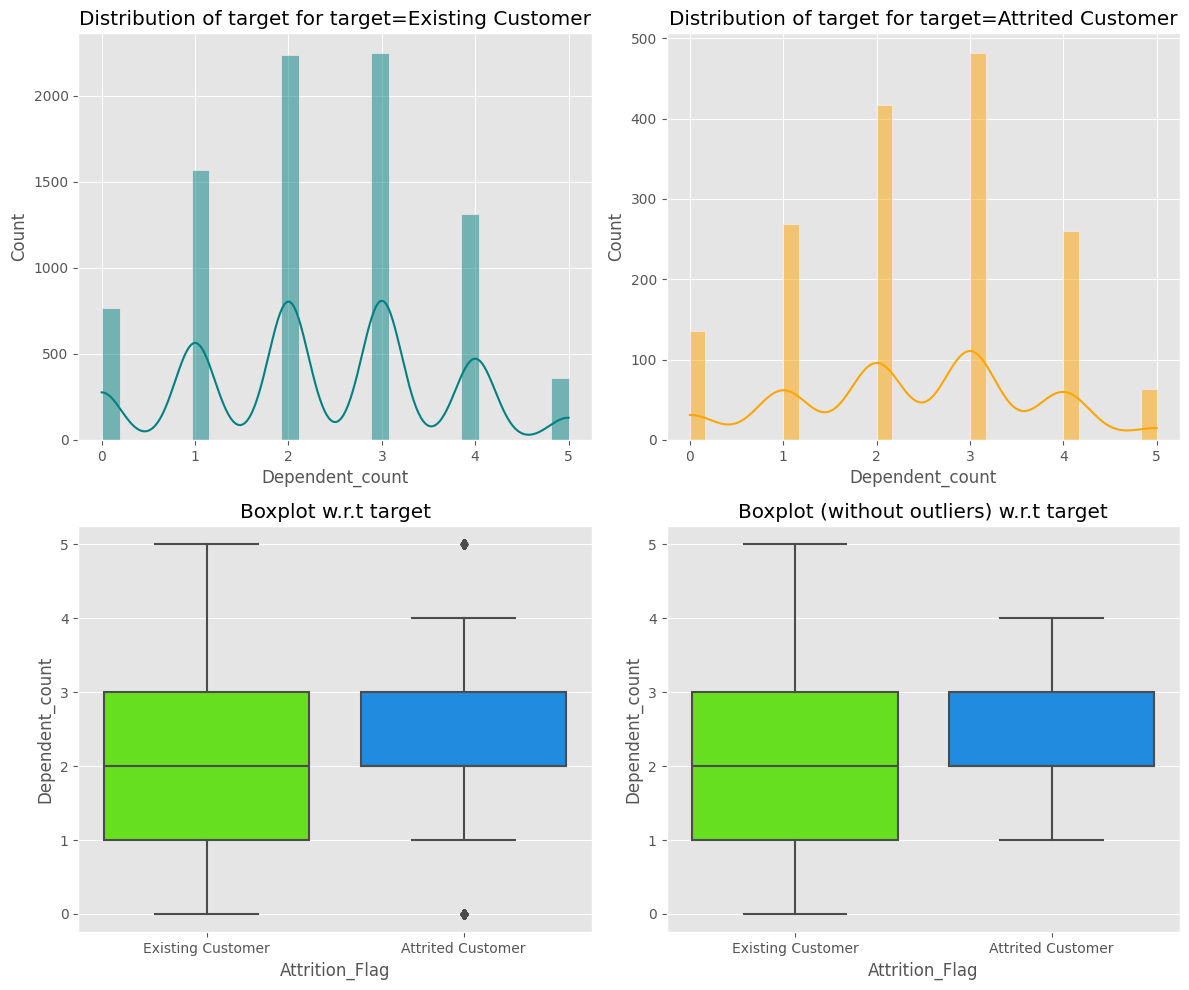

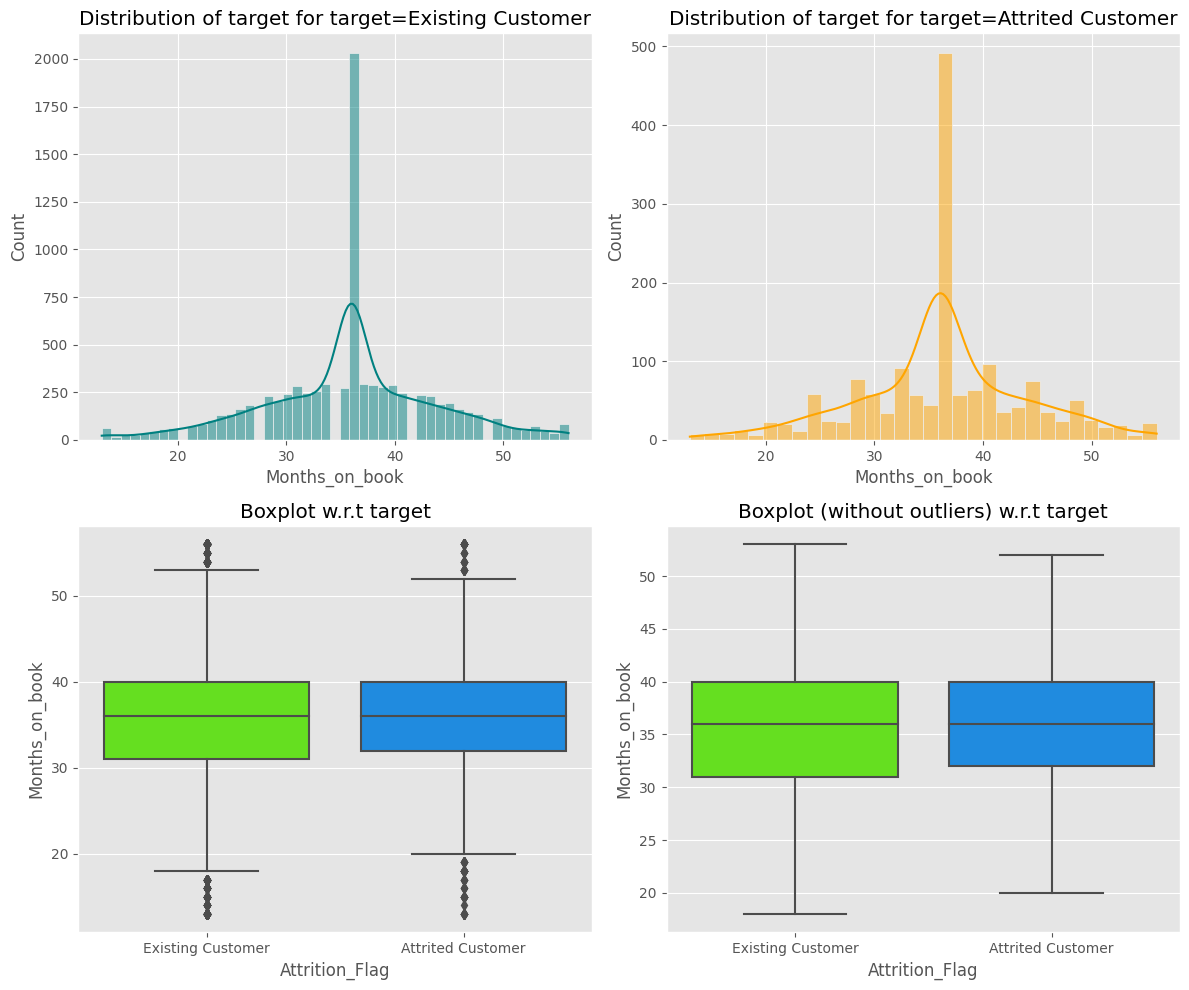

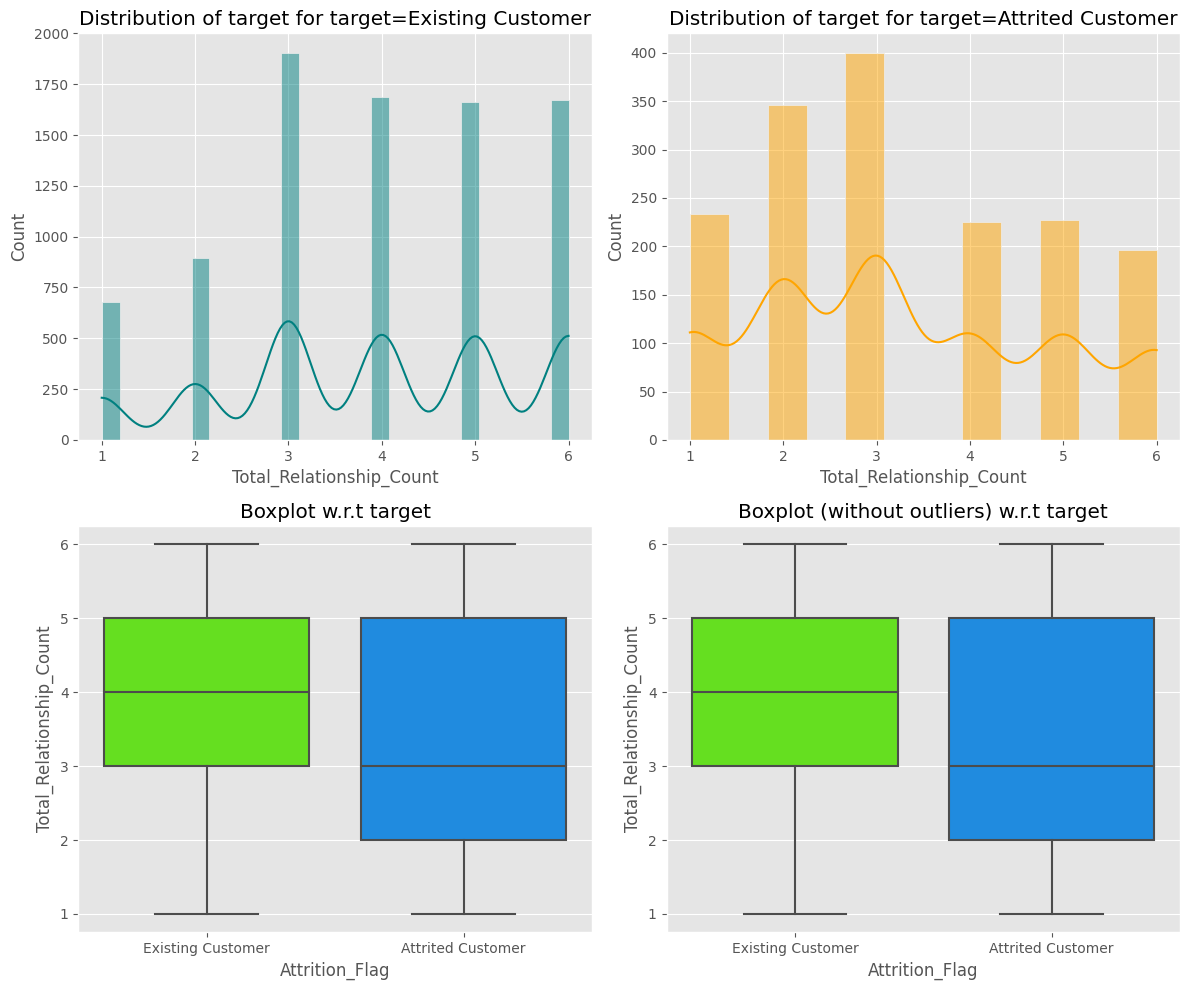

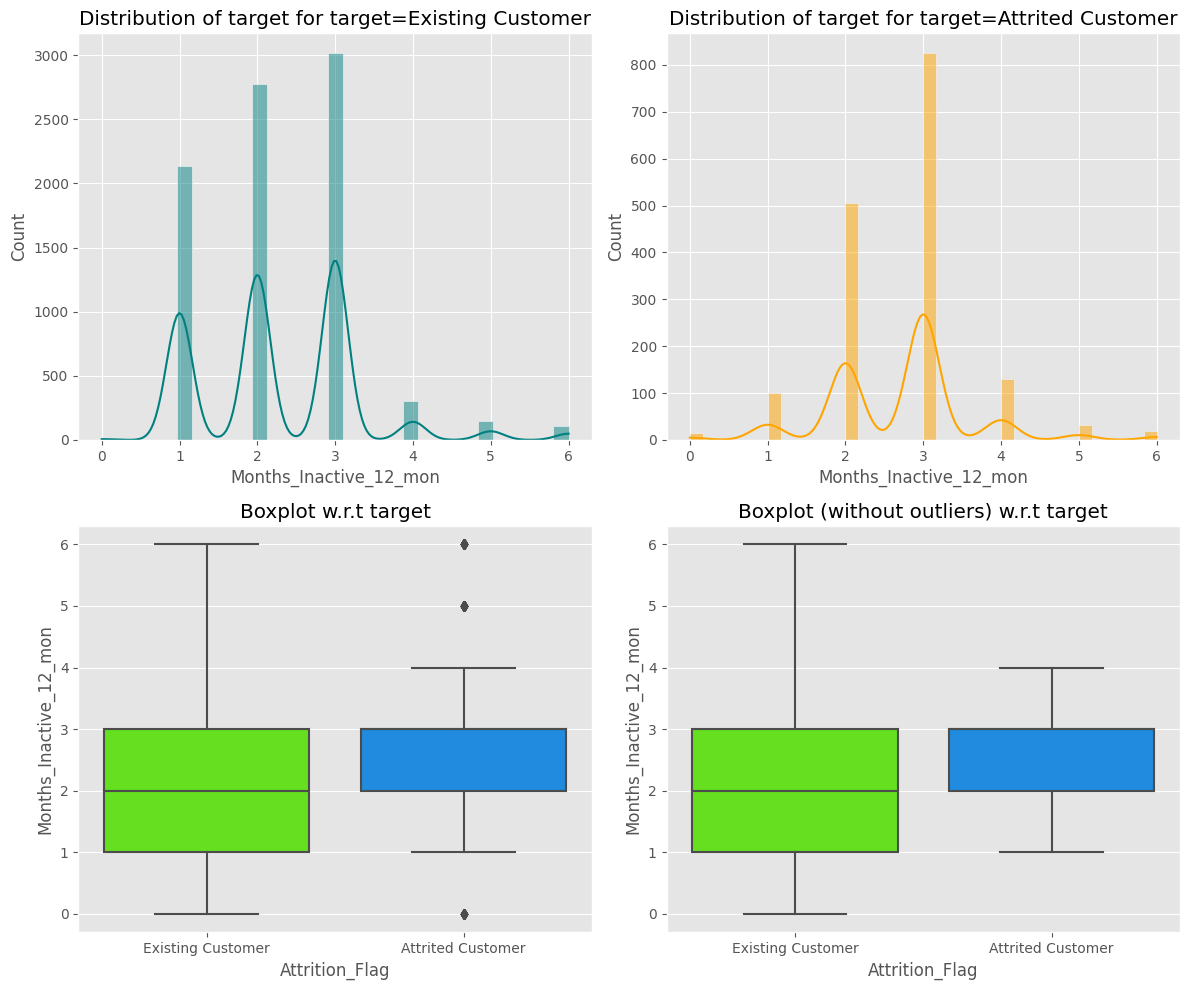

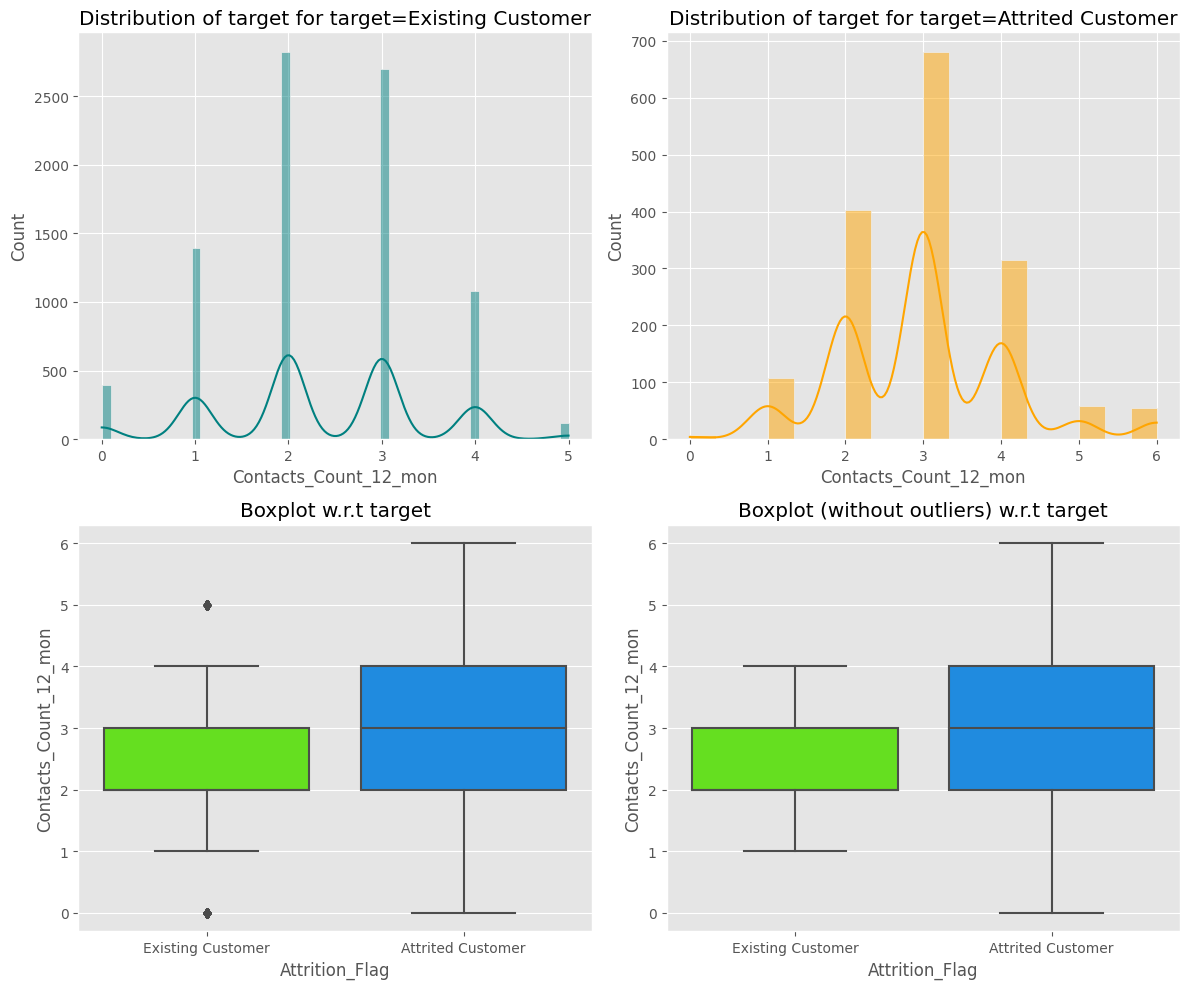

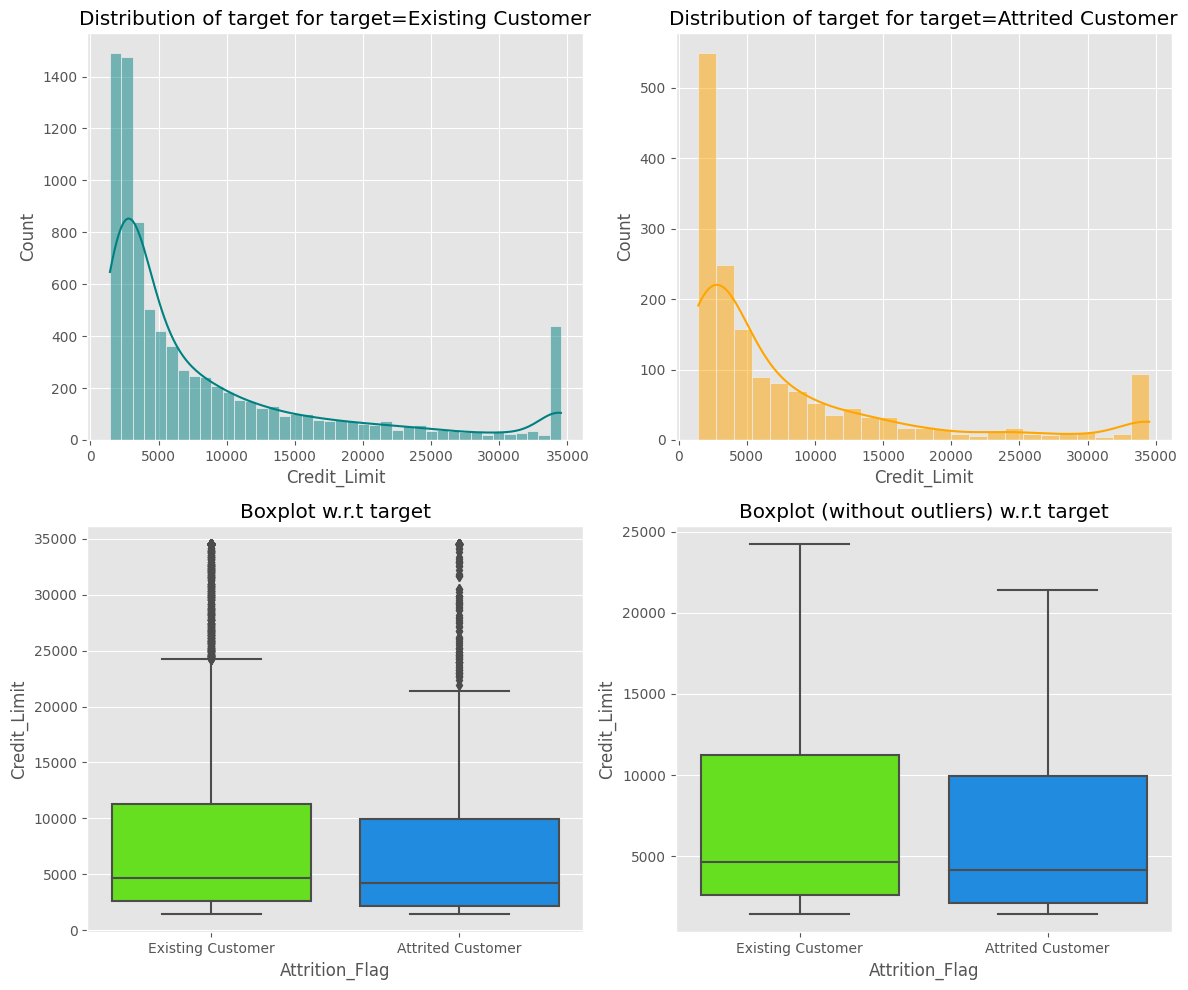

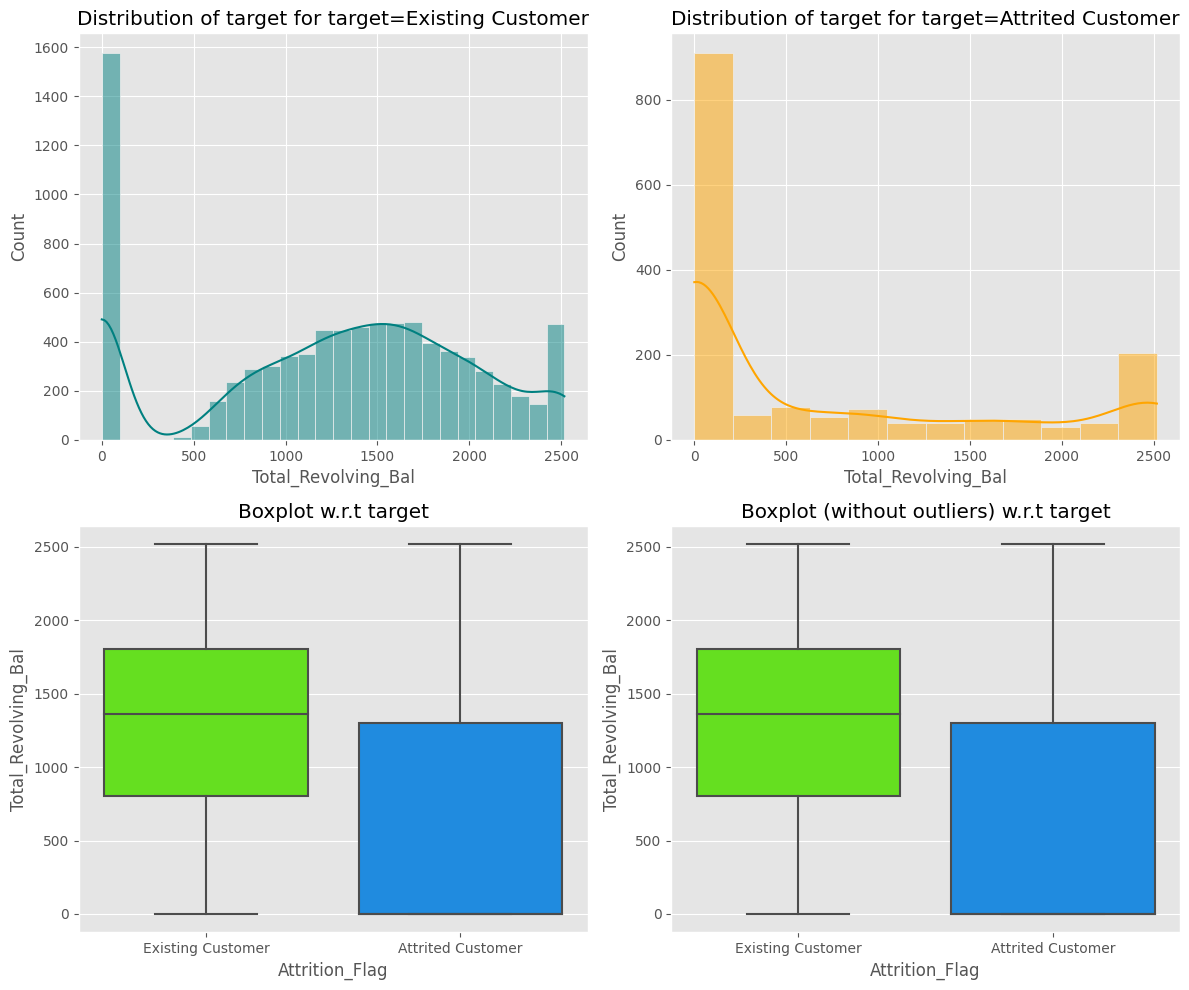

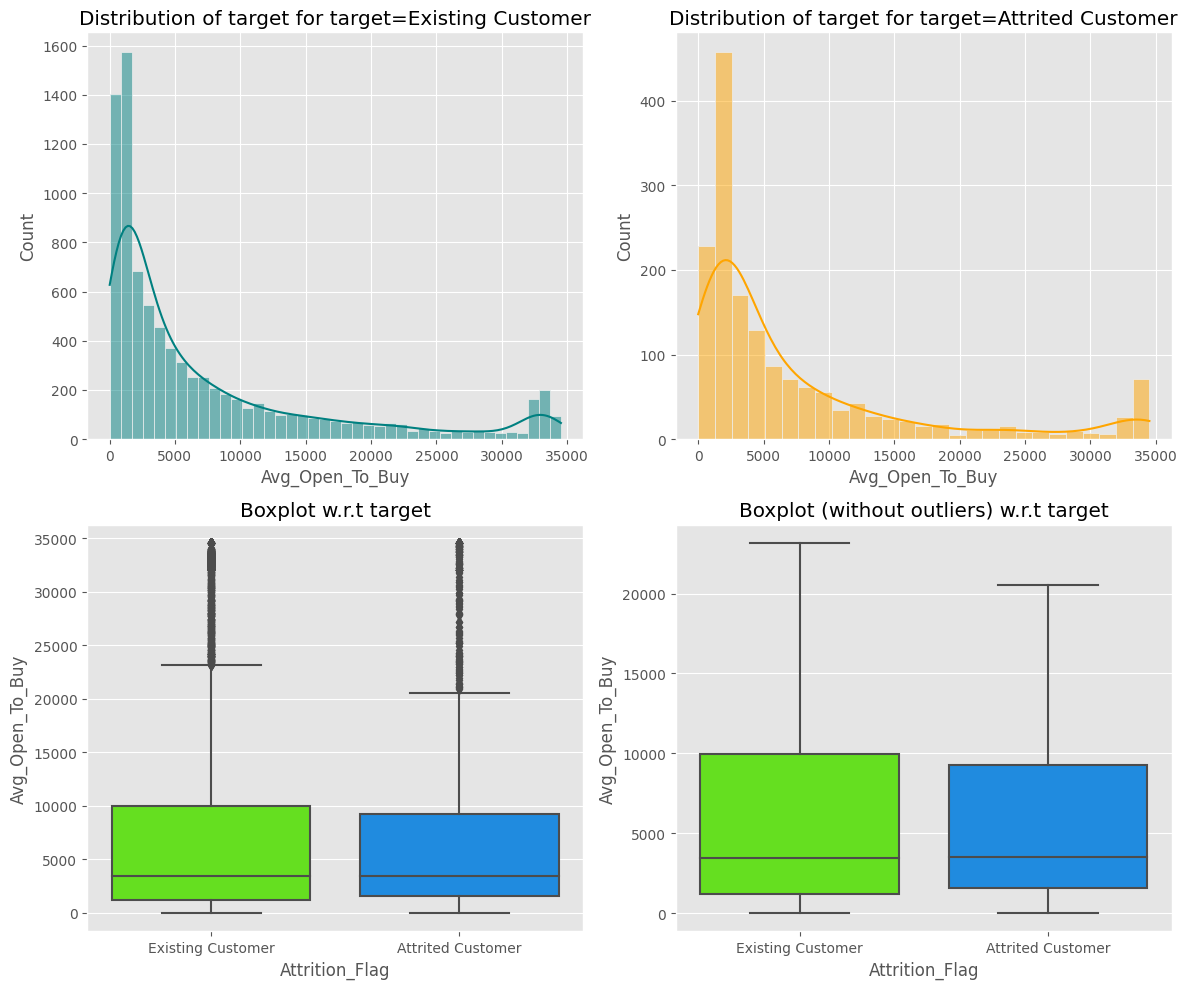

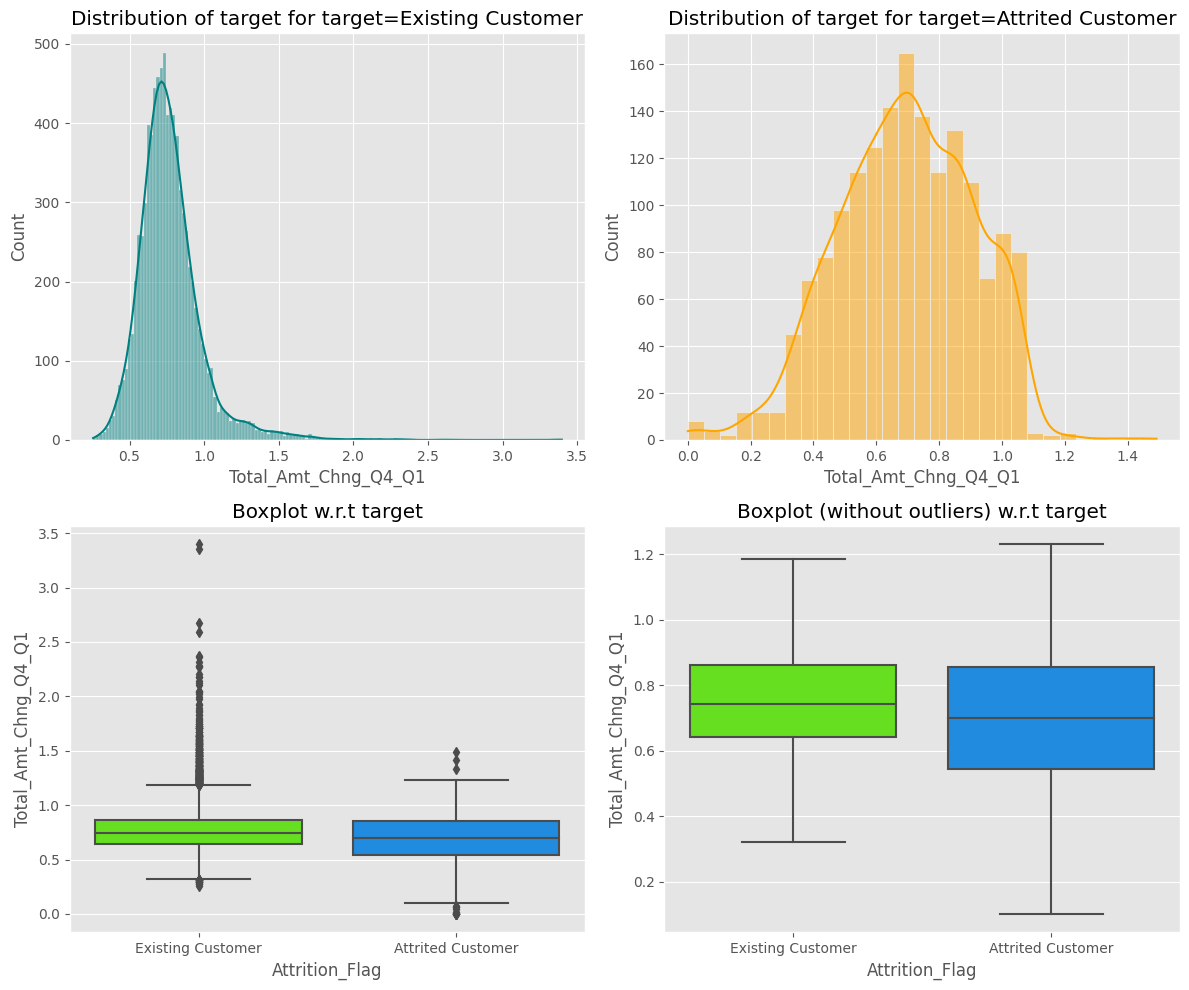

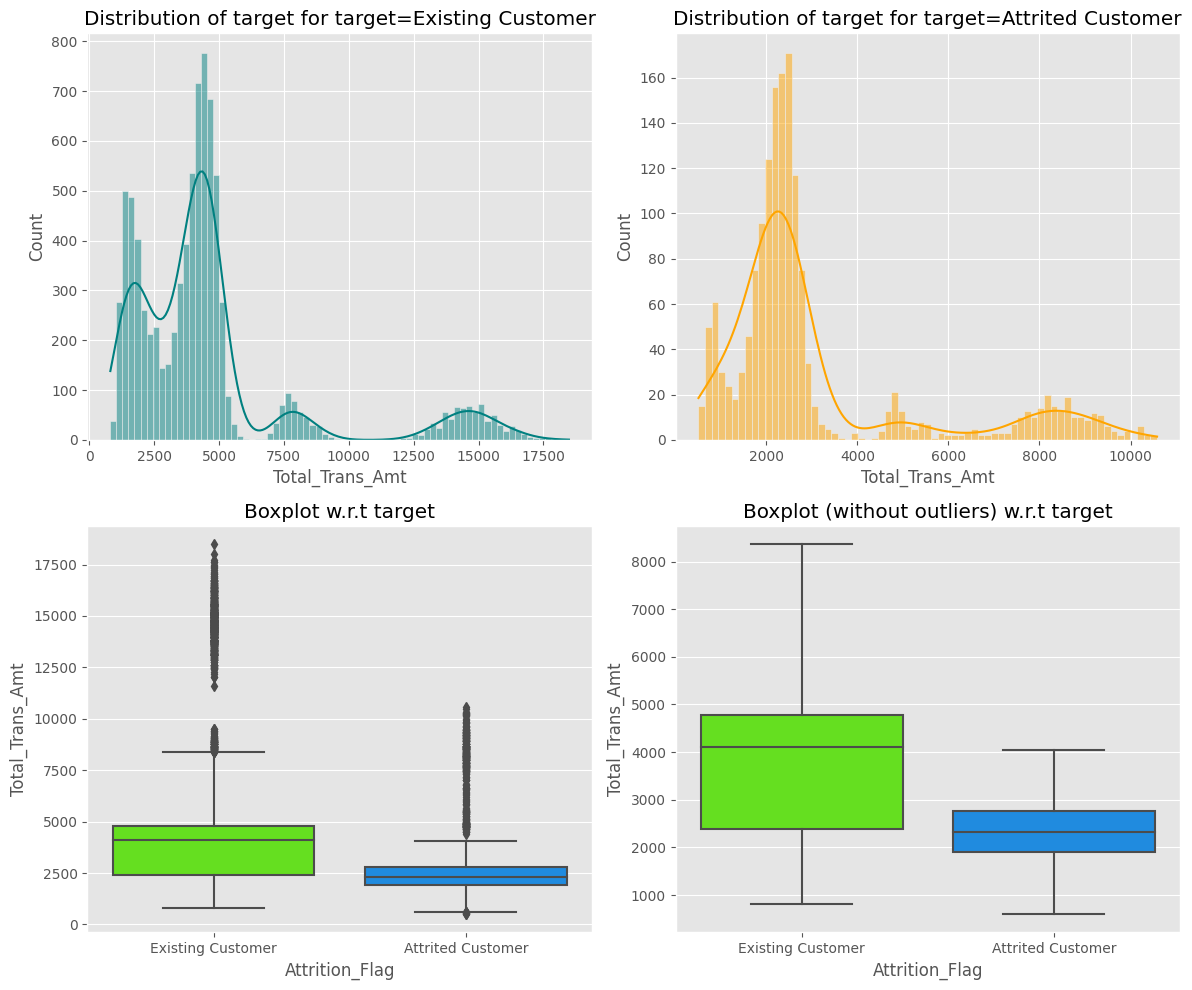

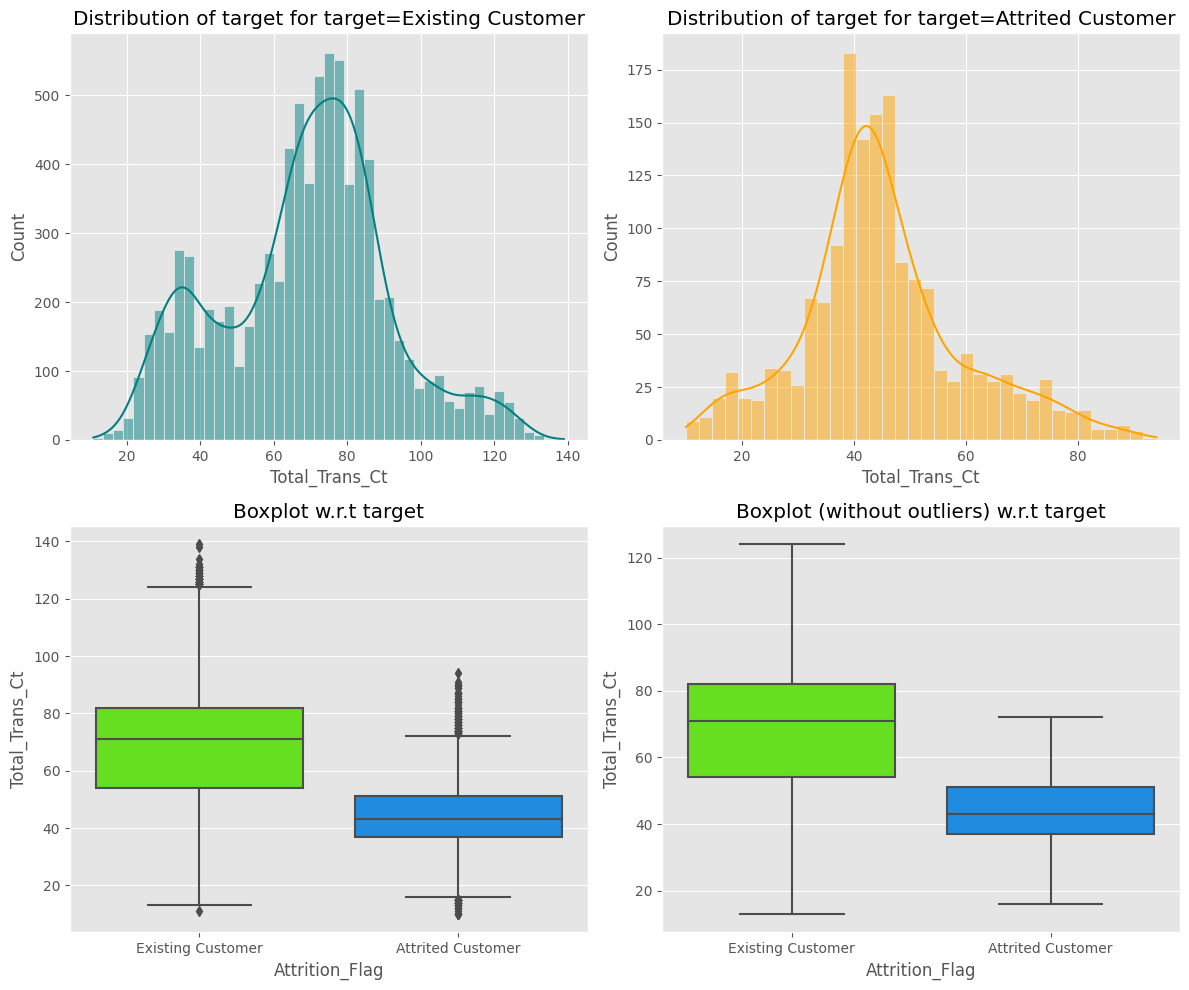

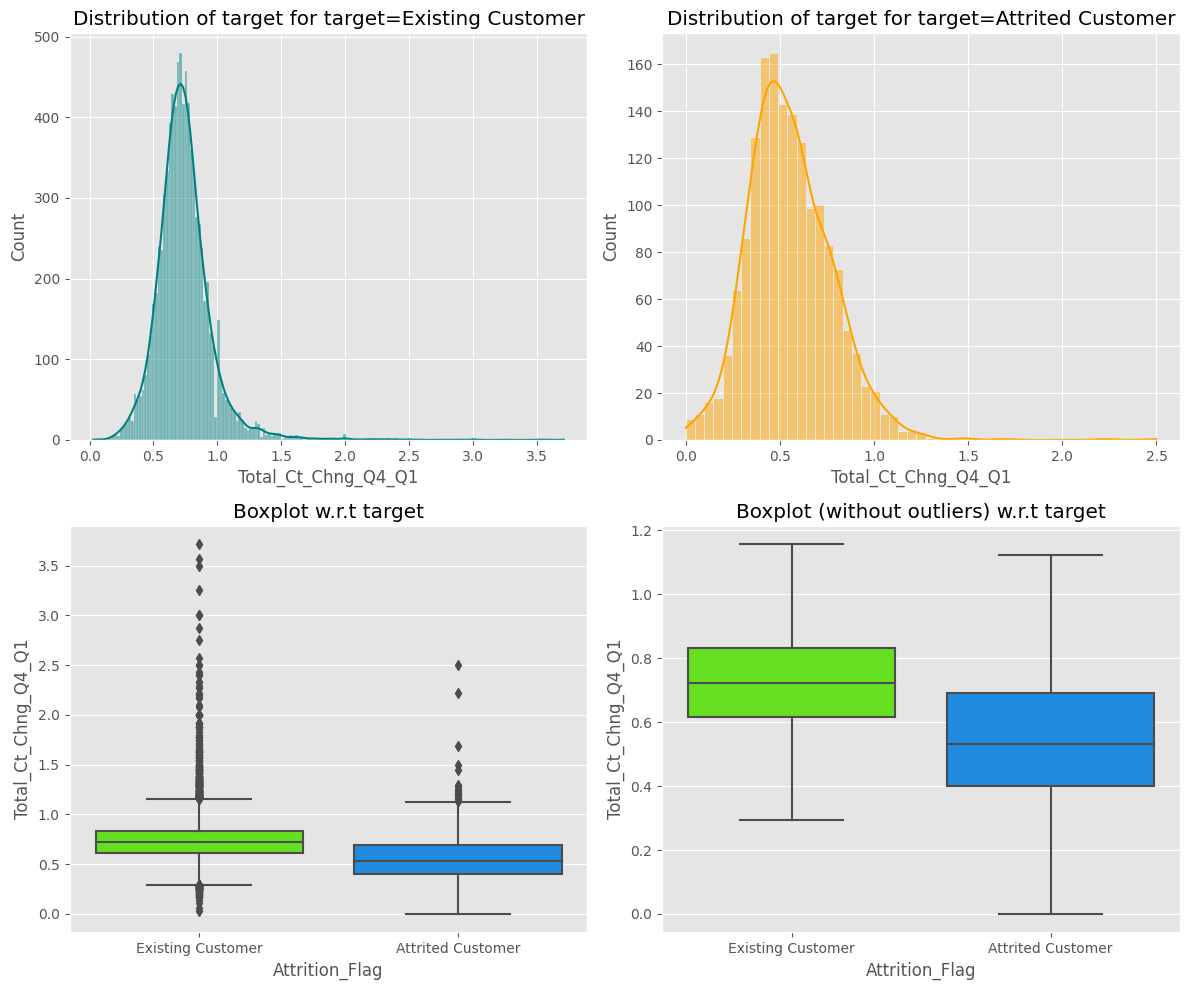

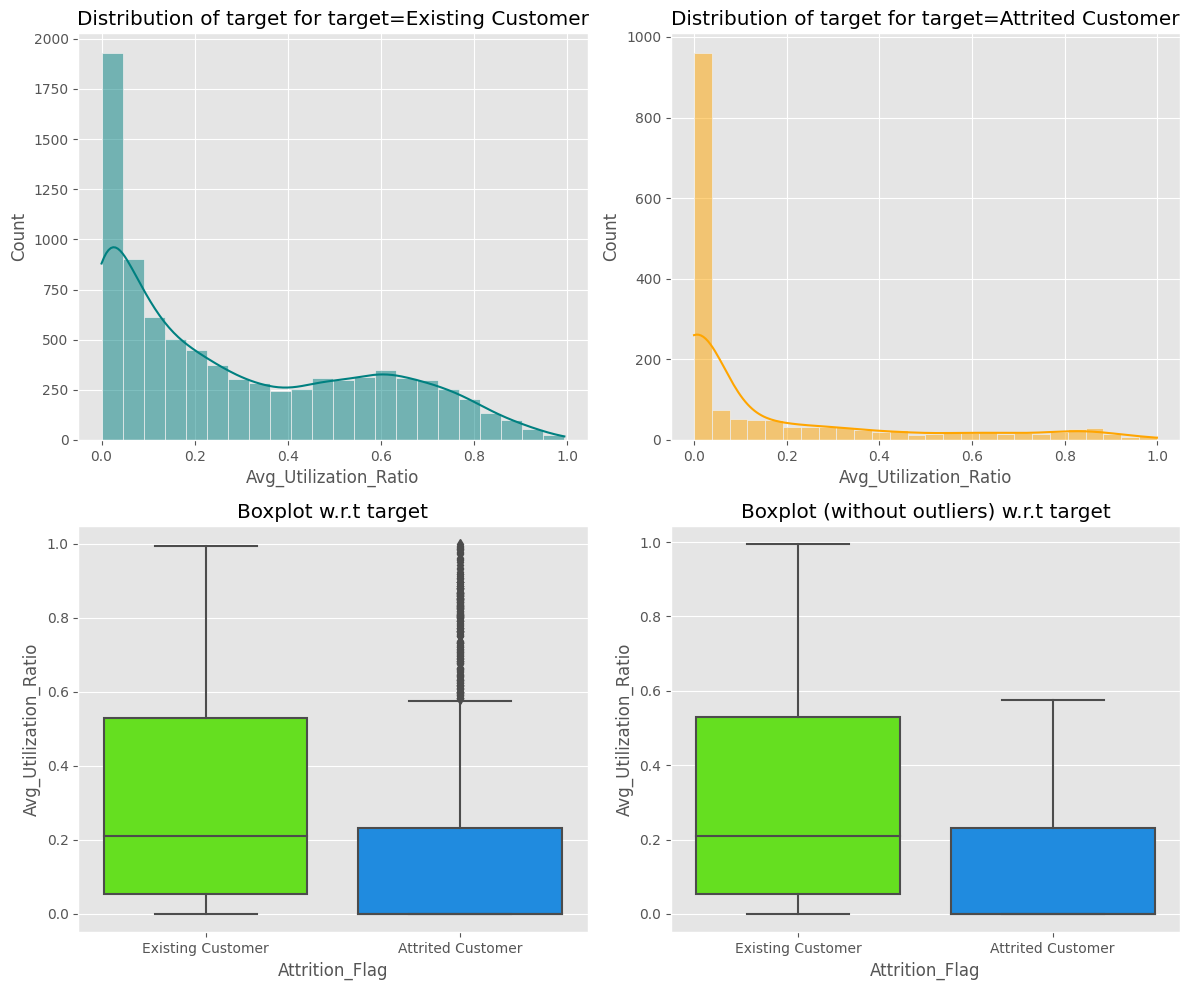

In [15]:
# Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

numerical_vars = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
    'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

target = 'Attrition_Flag'

for var in numerical_vars:
    distribution_plot_wrt_target(data, var, target)

In [16]:
# Setting the figure size and color palette
plt.figure(figsize=(20, 20))
sns.set(palette='nipy_spectral')

# Creating a pairplot for the data with hue as 'Attrition_Flag'
sns.pairplot(data=data, hue='Attrition_Flag', corner=True)

Output hidden; open in https://colab.research.google.com to view.

#### Observations:

Since the pairplot is quite extensive and involves multiple variables, providing detailed observations for each pair might be overwhelming.

 * There are clusters formed with respect to Attrition_Flag for the variables Total_Revolving_Bal, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, and Total_Ct_Chng_Q4_Q1.
 * There are strong correlation between a few columns as well, which we'll check in below correlation heatmap.

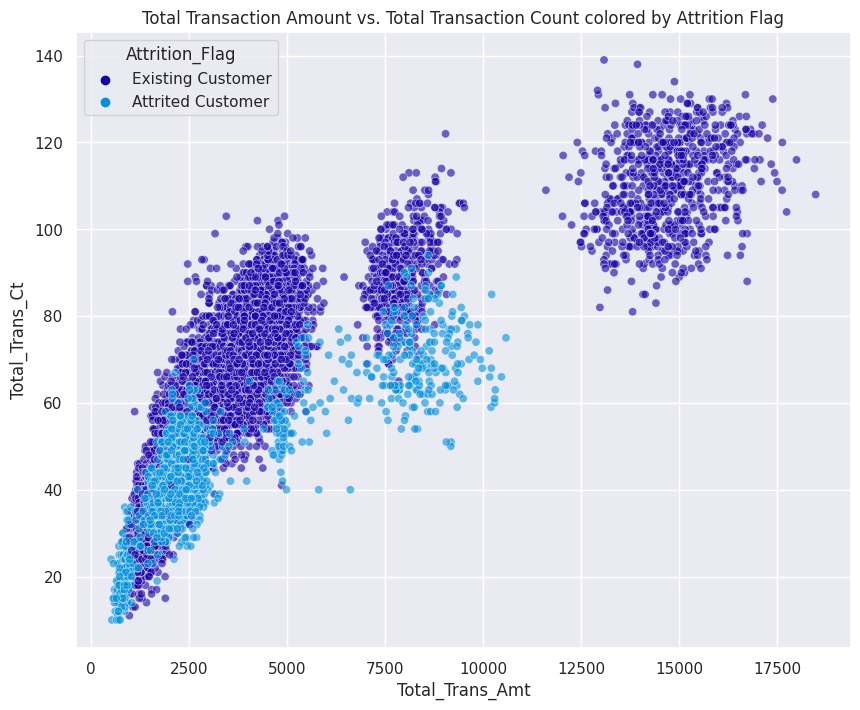

In [17]:
# Sample Multivariate Analysis: Interactions between different independent variables
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', hue='Attrition_Flag', data=data, alpha=0.6)
plt.title('Total Transaction Amount vs. Total Transaction Count colored by Attrition Flag')
plt.show()

#### Observations:

In the visualizations:
* **Total Transaction Amount vs. Total Transaction Count:** The scatter plot shows a positive relationship between the total transaction amount and total transaction count. It's interesting to note that churned customers ("Attrited Customer") tend to cluster in the lower transaction count and amount region.

#### Answers to EDA Questions:

1. How is the total transaction amount distributed?

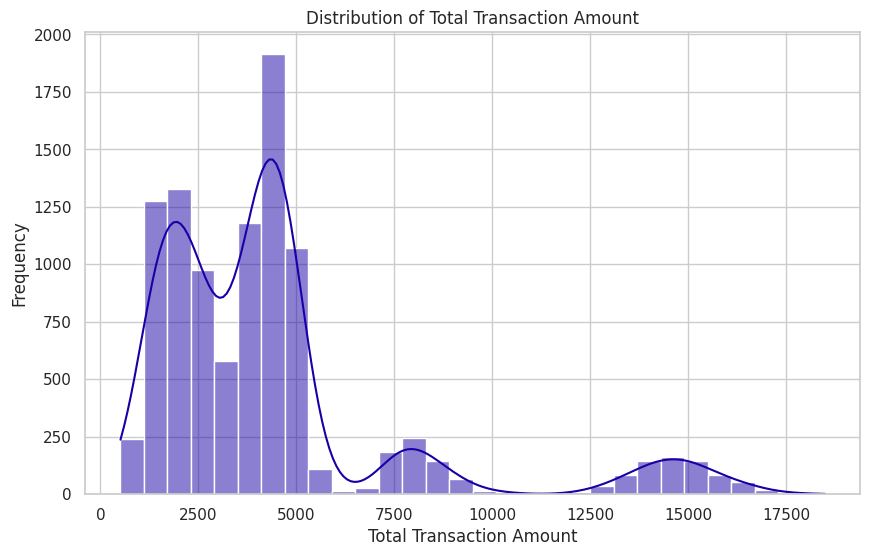

In [18]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Question 1: How is the total transaction amount distributed?
plt.figure(figsize=(10, 6))
sns.histplot(data['Total_Trans_Amt'], bins=30, kde=True)
plt.title('Distribution of Total Transaction Amount')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Frequency')
plt.show()

 * The distribution of the total transaction amount is right-skewed, meaning most customers have a lower total transaction amount, with a few customers having a significantly higher amount.
 * The majority of customers have a total transaction amount between 2,500 and 5,000.
 * There are some customers with a total transaction amount above 12,500, which can be considered as outliers or high-value customers depending on the business context.

2. What is the distribution of the level of education of customers?

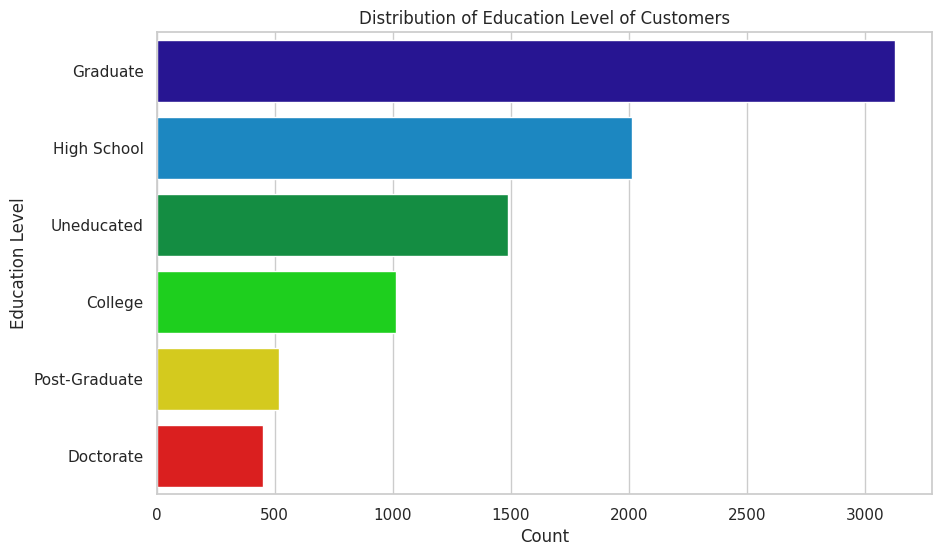

In [19]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Question 2: What is the distribution of the level of education of customers?
plt.figure(figsize=(10, 6))
sns.countplot(y=data['Education_Level'], order=data['Education_Level'].value_counts().index)
plt.title('Distribution of Education Level of Customers')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

 * The majority of customers have a level of education categorized as "Graduate."
 * "High School" and "Uneducated" categories also have a significant number of customers.
 * The "Doctorate" and "Post-Graduate" categories have the least number of customers, indicating that individuals with higher educational qualifications are less frequent in this dataset.

3. What is the distribution of the level of income of customers?

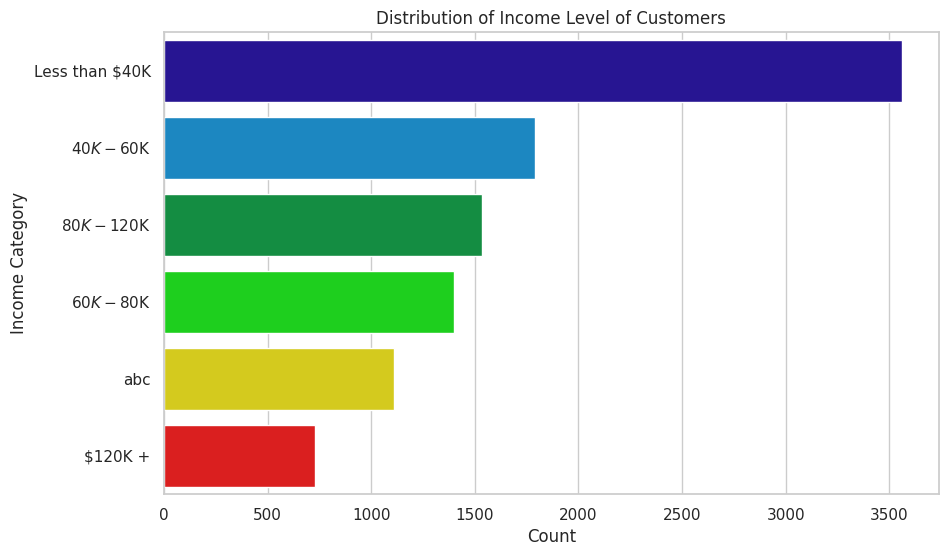

In [20]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Question 3: What is the distribution of the level of income of customers?
plt.figure(figsize=(10, 6))
sns.countplot(y=data['Income_Category'], order=data['Income_Category'].value_counts().index)
plt.title('Distribution of Income Level of Customers')
plt.xlabel('Count')
plt.ylabel('Income Category')
plt.show()

 * The largest group of customers falls into the "Less than 40K" income category, making it the most common income level in the dataset.
 * The "80K - 120K" and "60K - 80K" income categories have a similar number of customers and are the next most common income levels.
 * The "120K +" income category has the least number of customers, indicating that high-income individuals are less common in this dataset.

4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?

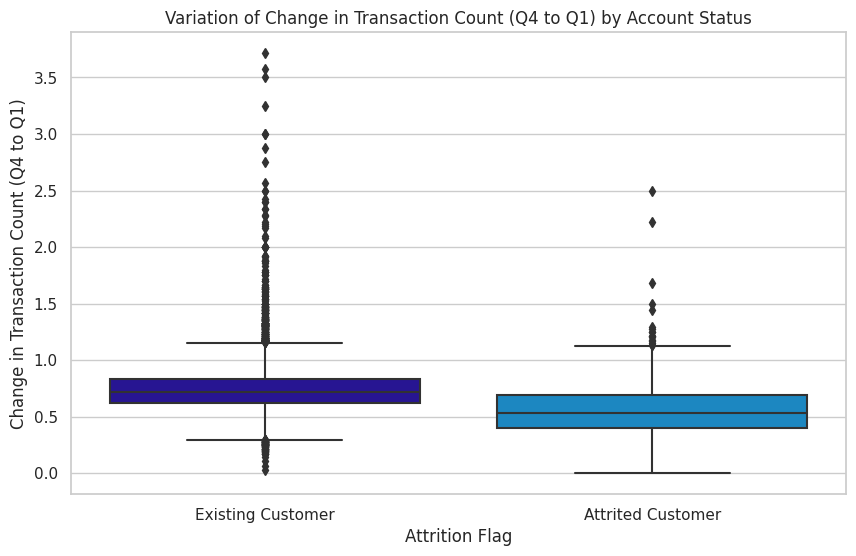

In [21]:
# Question 4: How does the change in transaction amount between Q4 and Q1 (Total_Ct_Chng_Q4_Q1) vary by the customer's account status (Attrition_Flag)?
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Attrition_Flag'], y=data['Total_Ct_Chng_Q4_Q1'])
plt.title('Variation of Change in Transaction Count (Q4 to Q1) by Account Status')
plt.xlabel('Attrition Flag')
plt.ylabel('Change in Transaction Count (Q4 to Q1)')
plt.show()

 * Customers who did not churn (Existing Customer) tend to have a slightly higher median change in transaction count from Q4 to Q1 compared to those who churned (Attrited Customer).
 * The interquartile range (IQR) is slightly wider for existing customers, indicating a larger variability in the change in transaction count among them.
 * There are several outliers in both categories, especially for existing customers, indicating some customers experienced a significantly higher change in transaction count.

5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?

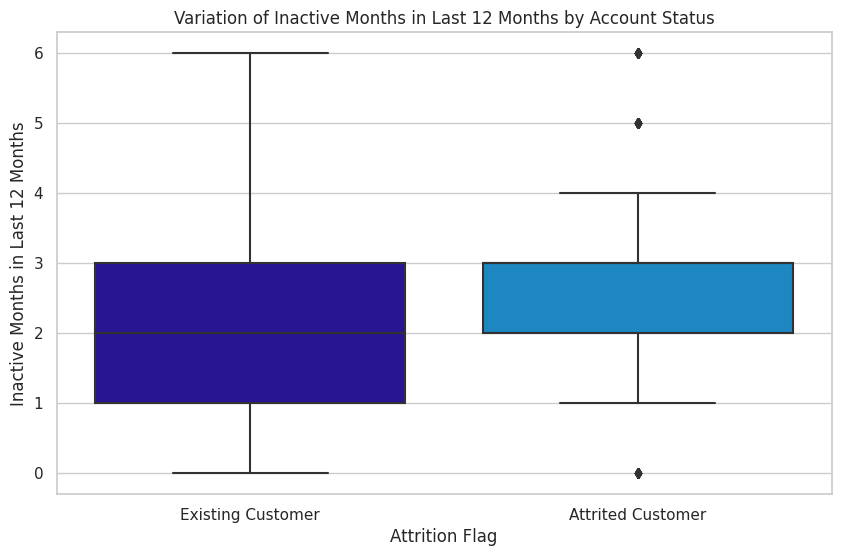

In [22]:
# Question 5: How does the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)?
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Attrition_Flag'], y=data['Months_Inactive_12_mon'])
plt.title('Variation of Inactive Months in Last 12 Months by Account Status')
plt.xlabel('Attrition Flag')
plt.ylabel('Inactive Months in Last 12 Months')
plt.show()

 * The median number of inactive months is slightly higher for customers who churned compared to those who did not.
 * The distribution of the number of inactive months is quite similar for both categories, with most customers being inactive for 2-3 months in the last 12 months.
 * There are some outliers in the existing customer category, indicating a few customers were inactive for an unusually high number of months yet did not churn.

6. What are the attributes that have a strong correlation with each other?

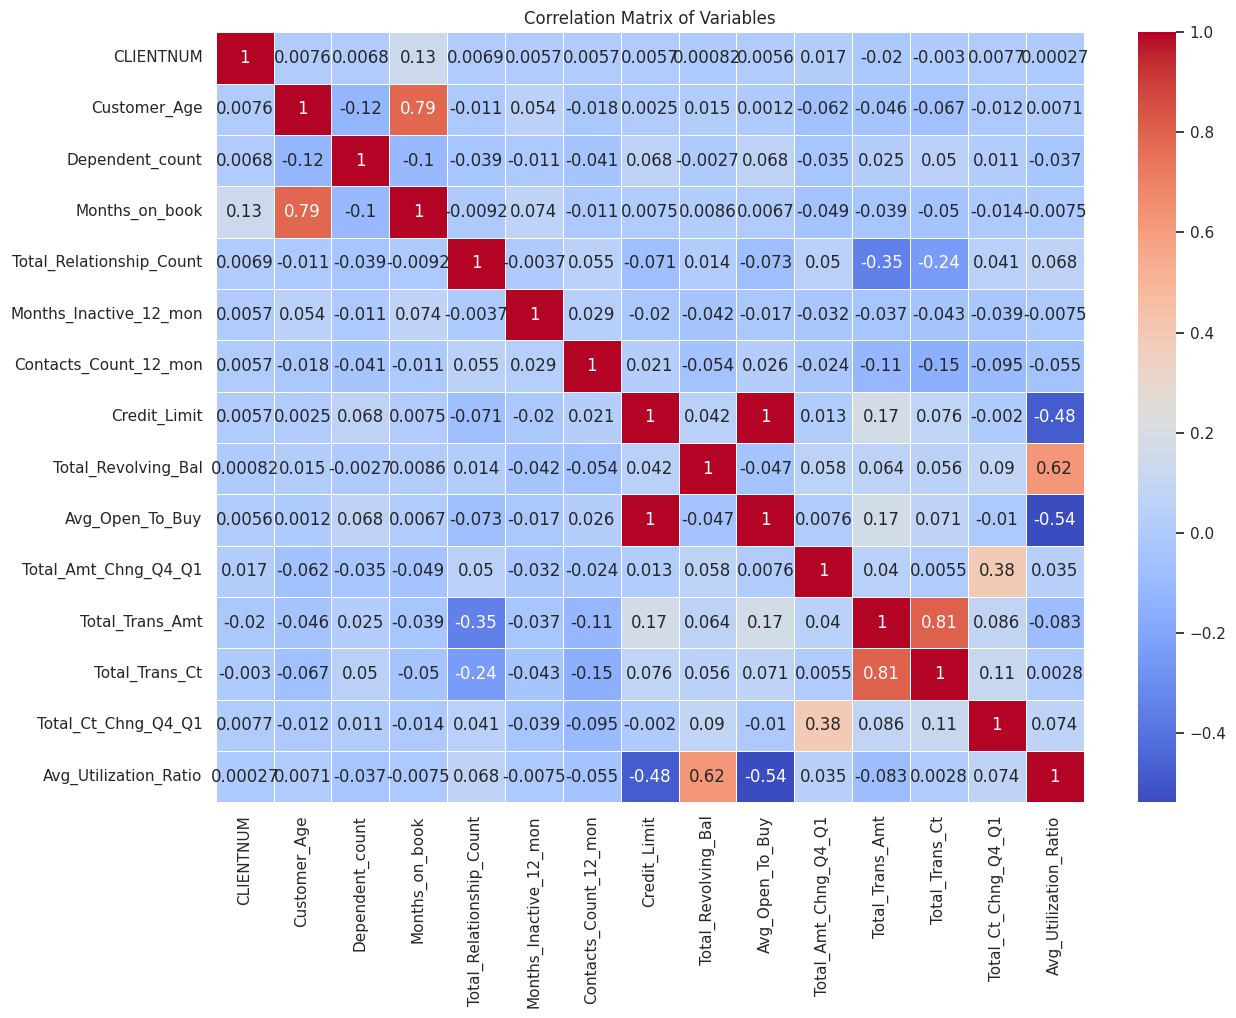

In [23]:
# Correlation Analysis
correlation_matrix = data.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Variables')
plt.show()

 * Credit_Limit and Avg_Open_To_Buy: These two features have a very high positive correlation of 1.00, meaning they are perfectly correlated. This is expected since Avg_Open_To_Buy is derived from Credit_Limit. One of these features might be redundant for modeling.
 * Total_Trans_Amt and Total_Trans_Ct: These two features have a positive correlation of 0.81, indicating that customers who make more transactions also tend to spend more. This is logical as more transactions would likely result in a higher total transaction amount.
 * Customer_Age and Months_on_book: These two features have a high positive correlation of 0.79, indicating that as one increases, the other tends to increase as well. This suggests that older customers tend to have been with the bank for longer.
 * Total_Revolving_Bal and Avg_Utilization_Ratio: These two features have a high positive correlation of 0.62. This is expected since the average utilization ratio is derived from the total revolving balance and credit limit.
 * Avg_Open_To_Buy and Avg_Utilization_Ratio have a negative correlation (-0.54). When a customer uses more of their available credit (higher utilization ratio), they have less available credit to spend (lower open to buy), and vice versa.

#### Observations:

**Correlation Matrix:** The heatmap shows the correlation between different variables. Some notable correlations include:

 * Positive Correlations:
   * Credit_Limit and Avg_Open_To_Buy: These two features have a very high positive correlation of 1.00, meaning they are perfectly correlated. This is expected since Avg_Open_To_Buy is derived from Credit_Limit. One of these features might be redundant for modeling.
   * Total_Trans_Amt and Total_Trans_Ct: These two features have a positive correlation of 0.81, indicating that customers who make more transactions also tend to spend more. This is logical as more transactions would likely result in a higher total transaction amount.
   * Customer_Age and Months_on_book: These two features have a high positive correlation of 0.79, indicating that as one increases, the other tends to increase as well. This suggests that older customers tend to have been with the bank for longer.
   * Total_Revolving_Bal and Avg_Utilization_Ratio: These two features have a high positive correlation of 0.62. This is expected since the average utilization ratio is derived from the total revolving balance and credit limit.
   * Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1: These two features have a moderate positive correlation of 0.38, indicating that there is a relationship between the change in transaction amount and the change in transaction count from Q4 to Q1, but it is not very strong.

 * Negative Correlations:
   * Avg_Open_To_Buy and Avg_Utilization_Ratio have a negative correlation (-0.54). When a customer uses more of their available credit (higher utilization ratio), they have less available credit to spend (lower open to buy), and vice versa.
  * Credit_Limit and Avg_Utilization_Ratio have a negative correlation. When a customer has a higher credit limit, they might utilize a smaller proportion of it, resulting in a lower utilization ratio, and vice versa.
  * Total_Trans_Amt and Total_Relationship_Count have a negative correlation, which suggests that customers who have higher transaction amounts tend to have fewer products with the bank.
  * Total_Trans_Cnt and Total_Relationship_Count have a negative correlation, which suggests that customers who have a high Total_Trans_Cnt, tend to have fewer products with the bank, and vice versa.

## Data Pre-processing

#### Data Preprocessing Steps:
1. Handling Missing Values: Identify and address any missing values in the dataset.
2. Encoding Categorical Variables: Convert categorical variables into a format suitable for modeling using encoding techniques.
3. Handling Outliers: Identify and manage outliers in the dataset.
4. Feature Scaling: Standardize or normalize numerical variables to bring them to a similar scale.
5. Feature Engineering: Create new features that might enhance the model's predictive capability.
6. Data Splitting: Split the data into training and testing sets to evaluate the model's performance effectively.

## Handling Missing Values

In [24]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Displaying the count of missing values for each variable that has them
missing_values

Education_Level    1519
Marital_Status      749
dtype: int64

In [25]:
# Replacing missing values with 'Unknown' for 'Education_Level' and 'Marital_Status'
data['Education_Level'].fillna('Unknown', inplace=True)
data['Marital_Status'].fillna('Unknown', inplace=True)

# Verifying that there are no more missing values
missing_values_after = data[['Education_Level', 'Marital_Status']].isnull().sum()
missing_values_after

Education_Level    0
Marital_Status     0
dtype: int64

#### Observations:

 * The missing values in the Education_Level and Marital_Status columns have been successfully replaced with 'Unknown', and now there are no missing values in these columns.

## Encoding Categorical Variables

In [26]:
# Encoding Categorical Variables

# One-hot encoding for categorical variables
categorical_vars = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
data_encoded = pd.get_dummies(data, columns=categorical_vars, drop_first=True)

# Binary encoding for the target variable 'Attrition_Flag'
data_encoded['Attrition_Flag'] = data_encoded['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# Displaying the first few rows of the encoded data
data_encoded.head()

CLIENTNUM  Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
0  768805383               0            45                3              39   
1  818770008               0            49                5              44   
2  713982108               0            51                3              36   
3  769911858               0            40                4              34   
4  709106358               0            40                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0     12691.000                  777        11914.000                 1.335   
1      8256.000                  864         7392.000                 1.541   
2      3418.000                    0         3418.000                 2.594   
3      3313.000                 2517          796.000                 1.405   
4      4716.000                    0         4716.000                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Gender_M  Education_Level_Doctorate  \
0                  0.061         1                          0   
1                  0.105         0                          0   
2                  0.000         1                          0   
3                  0.760         0                          0   
4                  0.000         1                          0   

   Education_Level_Graduate  Education_Level_High School  \
0                         0                            1   
1                         1                            0   
2                         1                            0   
3                         0                            1   
4                         0                            0   

   Education_Level_Post-Graduate  Education_Level_Uneducated  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           1   

   Education_Level_Unknown  Marital_Status_Married  Marital_Status_Single  \
0                        0                       1                      0   
1                        0                       0                      1   
2                        0                       1                      0   
3                        0                       0                      0   
4                        0                       1                      0   

   Marital_Status_Unknown  Income_Category_$40K - $60K  \
0                       0                            0   
1                       0                            0   
2                       0                            0   
3                       1                            0   
4                       0                            0   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                            1                             0   
1                            0                             0   
2                            0                             1   
3                       

In [27]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CLIENTNUM                       10127 non-null  int64  
 1   Attrition_Flag                  10127 non-null  int64  
 2   Customer_Age                    10127 non-null  int64  
 3   Dependent_count                 10127 non-null  int64  
 4   Months_on_book                  10127 non-null  int64  
 5   Total_Relationship_Count        10127 non-null  int64  
 6   Months_Inactive_12_mon          10127 non-null  int64  
 7   Contacts_Count_12_mon           10127 non-null  int64  
 8   Credit_Limit                    10127 non-null  float64
 9   Total_Revolving_Bal             10127 non-null  int64  
 10  Avg_Open_To_Buy                 10127 non-null  float64
 11  Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 12  Total_Trans_Amt                 

#### Observations:

 * One-Hot Encoding was applied to the following categorical variables:
  * Gender
  * Education_Level
  * Marital_Status
  * Income_Category
  * Card_Category

 * This process created binary (0 or 1) columns for each category in the original columns. For example, Education_Level which had categories like 'Graduate', 'High School', etc., has been transformed into separate columns like Education_Level_Graduate, Education_Level_High School, each indicating the presence or absence of the category with 1 or 0 respectively.

 * Binary Encoding was applied to the target variable Attrition_Flag:
'Existing Customer': 0
'Attrited Customer': 1

 * Now, our dataset data_encoded has 34 columns, where the categorical variables have been transformed into a format suitable for modeling.

## Handling Outliers

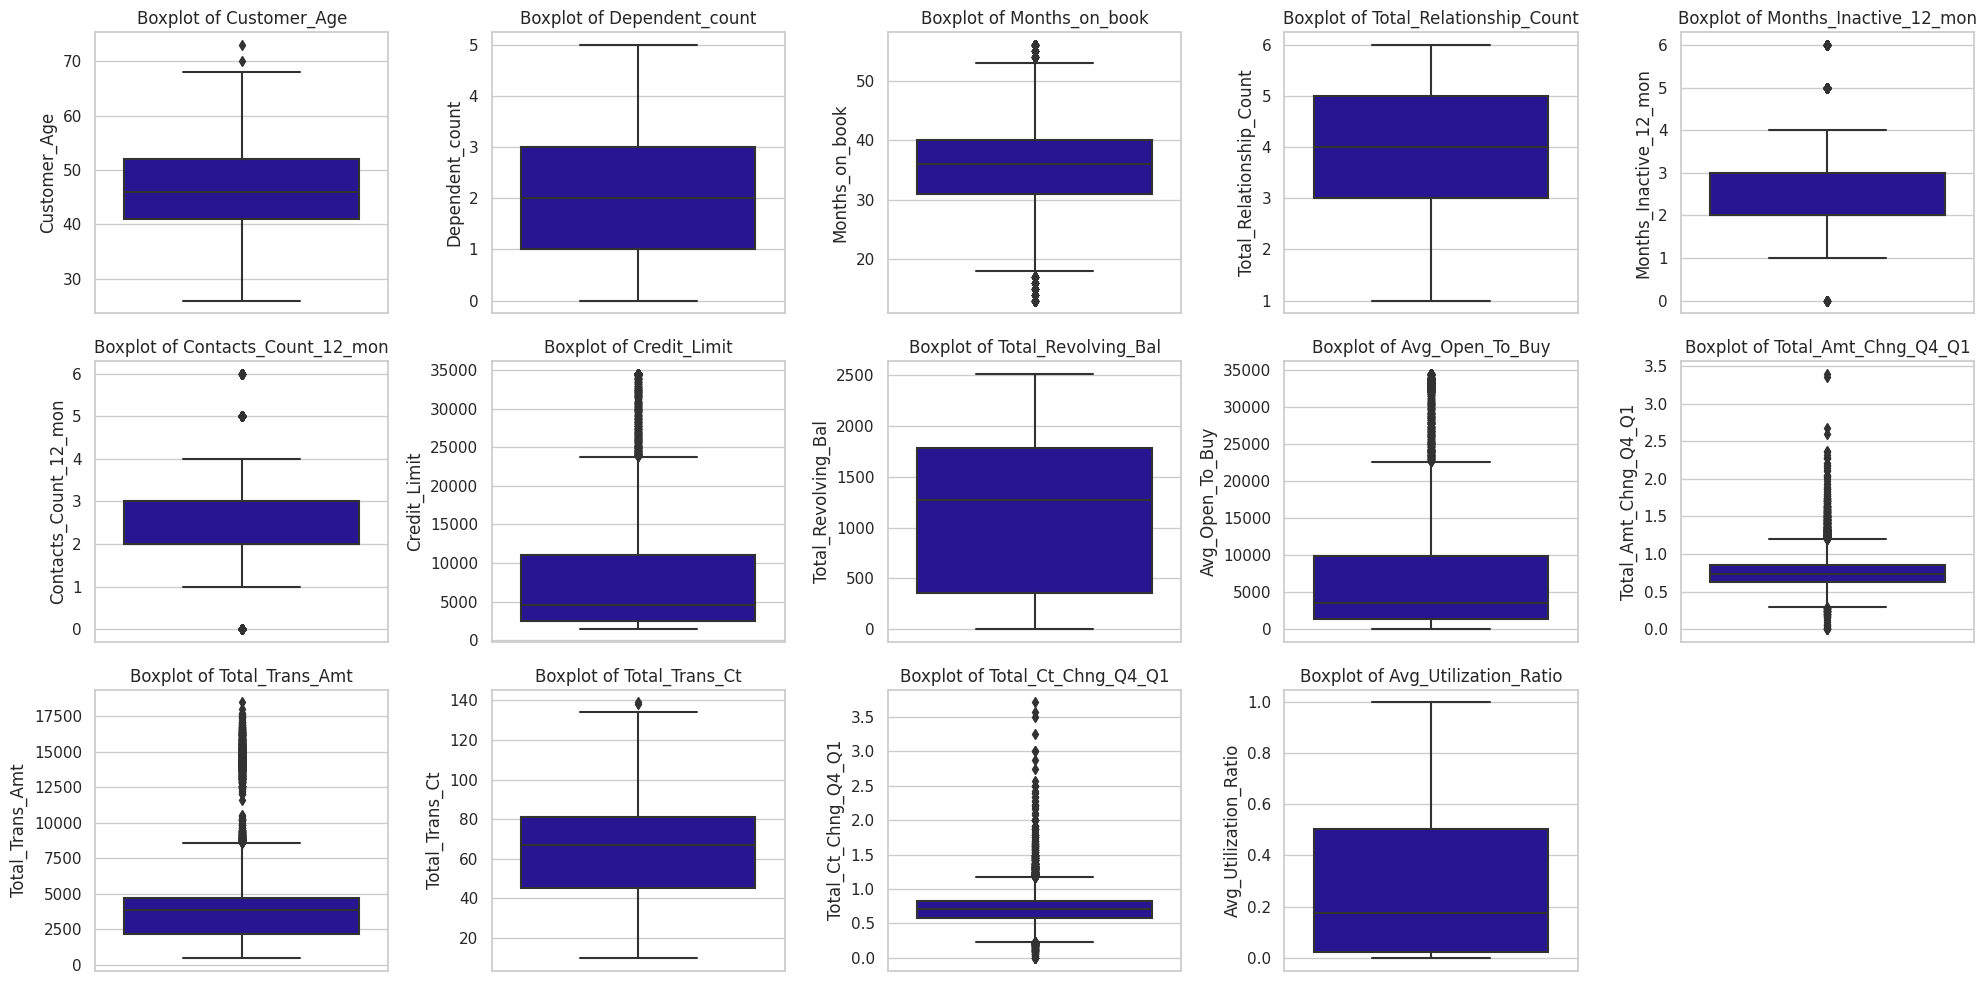

In [28]:
# List of numerical variables
numerical_vars = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
    'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

# Plotting boxplots for numerical variables to visualize outliers
plt.figure(figsize=(20, 10))
for i, var in enumerate(numerical_vars):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=var, data=data_encoded)
    plt.title(f'Boxplot of {var}')
    plt.tight_layout()
plt.show()

#### Observations:

* Outliers Presence: Variables like Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, and Avg_Utilization_Ratio exhibit noticeable outliers.
* Skewness: Some variables like Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, and Total_Trans_Amt appear to be right-skewed.

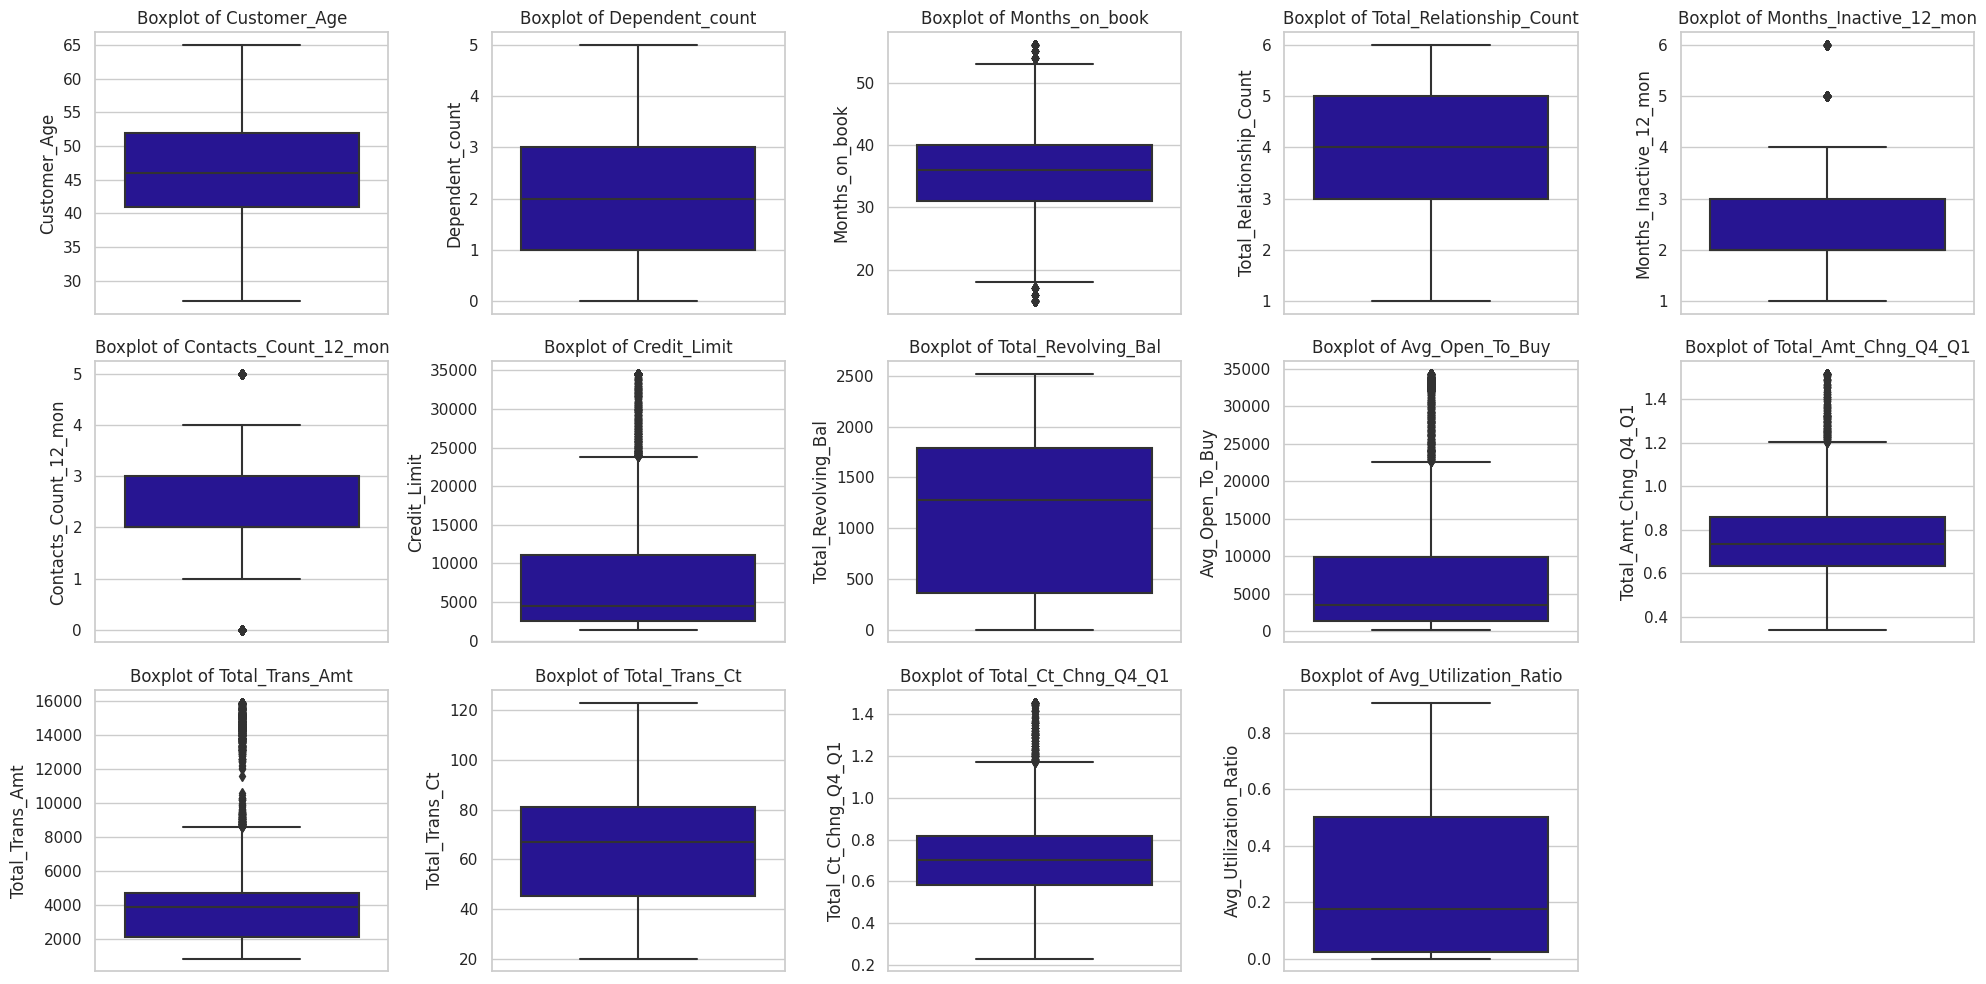

In [29]:
# List of numerical variables
numerical_vars = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
    'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

# Applying capping to the numerical variables
for var in numerical_vars:
    lower_bound = data_encoded[var].quantile(0.01)  # 1st percentile
    upper_bound = data_encoded[var].quantile(0.99)  # 99th percentile
    data_encoded[var] = data_encoded[var].clip(lower=lower_bound, upper=upper_bound)

# Verifying the capping by visualizing boxplots again
plt.figure(figsize=(20, 10))
for i, var in enumerate(numerical_vars):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=var, data=data_encoded)
    plt.title(f'Boxplot of {var}')
    plt.tight_layout()
plt.show()

#### Observations:

* The outliers have been significantly reduced in variables like Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, and Total_Trans_Ct.
* The boxplots now show a cleaner distribution of the data points, which should help improve the performance of certain machine learning models.

## Feature Scaling

* Standardizing/normalizing numerical variables to ensure they are on the same scale.

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming data_encoded is your pre-processed data

# Defining the target variable and predictors
X = data_encoded.drop(columns=['Attrition_Flag'])
y = data_encoded['Attrition_Flag']

# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initializing the Standard Scaler
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming both training and testing data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Displaying the first few rows of the scaled training data
X_train_scaled.head()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
0      1.318        -1.306           -1.810          -1.523   
1     -0.560        -0.301            0.502          -0.003   
2      0.879        -0.050           -0.269          -0.763   
3     -0.662        -1.306           -0.269          -1.523   
4     -0.579         0.453           -1.039           0.504   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                     0.122                   0.647                 -0.412   
1                     0.765                  -0.347                  0.501   
2                     1.409                   0.647                 -1.325   
3                    -0.521                  -1.340                  0.501   
4                     0.122                  -0.347                  0.501   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0        -0.665                1.304           -0.784                -0.354   
1         1.849               -1.433            1.980                 0.452   
2         0.342               -0.310            0.371                 0.665   
3        -0.604                0.522           -0.652                 0.551   
4         2.872                0.021            2.872                -0.161   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0           -0.779          -0.969               -1.229   
1           -0.623          -1.139               -0.593   
2           -0.032           1.036                0.683   
3           -0.809          -1.012               -1.610   
4           -0.151           0.311                0.024   

   Avg_Utilization_Ratio  Gender_M  Education_Level_Doctorate  \
0                  2.157    -0.947                     -0.214   
1                 -1.002     1.056                     -0.214   
2                 -0.718     1.056                     -0.214   
3                  0.854    -0.947                     -0.214   
4                 -0.878     1.056                     -0.214   

   Education_Level_Graduate  Education_Level_High School  \
0                    -0.665                       -0.506   
1                    -0.665                        1.977   
2                    -0.665                        1.977   
3                     1.505                       -0.506   
4                     1.505                       -0.506   

   Education_Level_Post-Graduate  Education_Level_Uneducated  \
0                         -0.236                      -0.414   
1                         -0.236                      -0.414   
2                         -0.236                      -0.414   
3                         -0.236                      -0.414   
4                         -0.236                      -0.414   

   Education_Level_Unknown  Marital_Status_Married  Marital_Status_Single  \
0                    2.390                   1.076                 -0.796   
1                   -0.418                  -0.930                  1.256   
2                   -0.418                   1.076                 -0.796   
3                   -0.418                   1.076                 -0.796   
4                   -0.418                  -0.930                  1.256   

   Marital_Status_Unknown  Income_Category_$40K - $60K  \
0                  -0.284                       -0.467   
1                  -0.284                       -0.467   
2                  -0.284                       -0.467   
3                  -0.284                       -0.467   
4                  -0.284                       -0.467   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                       -0.404                        -0.419   
1                        2.476                        -0.419   
2                       -0.404                         2.388   
3                       -0.404                        -0.419   
4                       -0.404                        -0

#### Observations:

 * We've used an 80-20 split, which is a common practice to ensure that the model has enough data to learn patterns (training) and unseen data to evaluate its predictive performance (testing).
 * Using stratify=y ensures that the distribution of the target variable is similar in both training and test sets, which is crucial, especially for imbalanced datasets.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

## Model Evaluation Metrics

We will evaluate the models using the following metrics:

- **Accuracy**: This is the ratio of the total number of correct predictions to the total number of predictions (or inputs). Mathematically, it can be expressed as:

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$

- **Recall** (or Sensitivity or True Positive Rate): This is the ratio of the total number of correct positive predictions to the total number of actual positives. It is expressed mathematically as:

$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$

- **Precision**: This is the ratio of the total number of correct positive predictions to the total number of positive predictions made. It is expressed mathematically as:

$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$

- **F1 Score**: This is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the Accuracy Metric. It is expressed mathematically as:

$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$


**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [31]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with Original Data


DecisionTree - Train Performance:    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


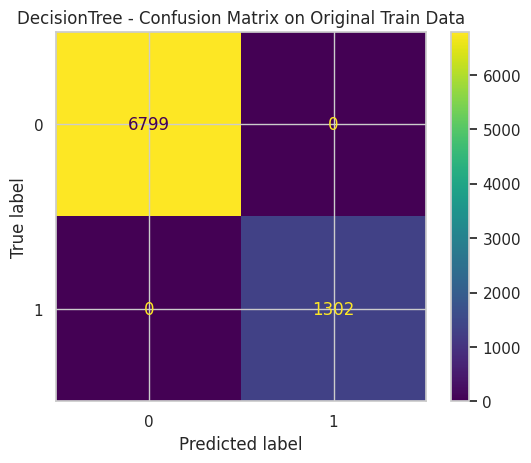

DecisionTree - Test Performance:    Accuracy  Recall  Precision    F1
0     0.936   0.782      0.812 0.796


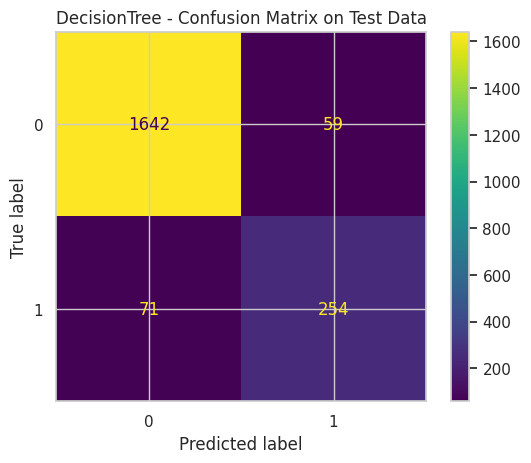


Bagging - Train Performance:    Accuracy  Recall  Precision    F1
0     0.996   0.978      0.996 0.987


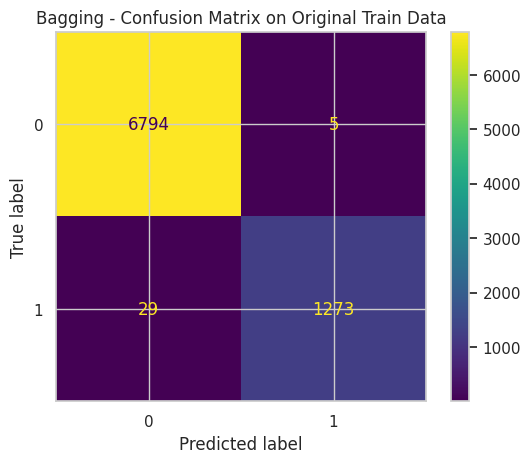

Bagging - Test Performance:    Accuracy  Recall  Precision    F1
0     0.952   0.778      0.907 0.838


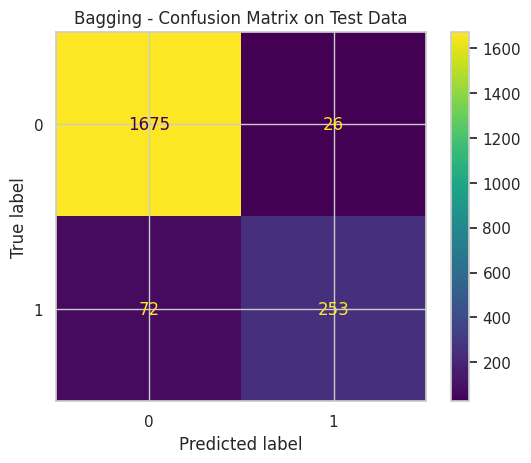


RandomForest - Train Performance:    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


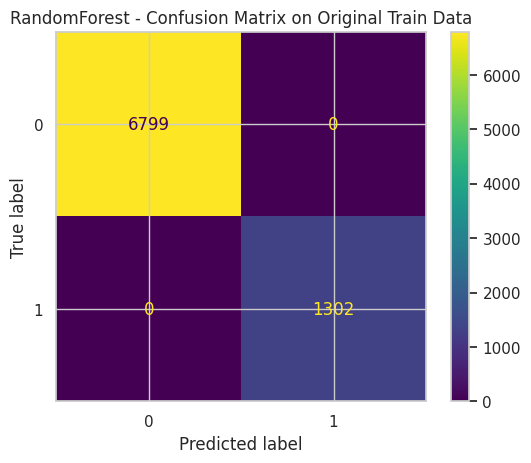

RandomForest - Test Performance:    Accuracy  Recall  Precision    F1
0     0.956   0.766      0.947 0.847


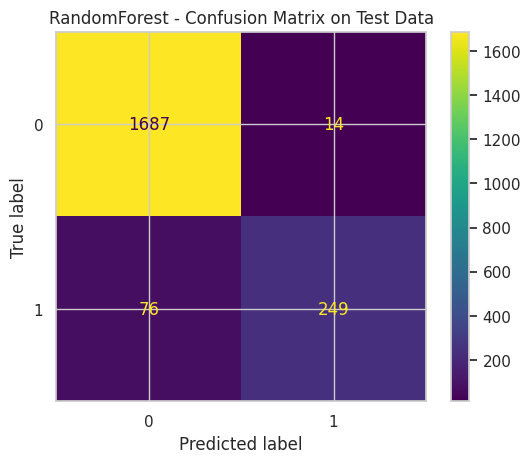


AdaBoost - Train Performance:    Accuracy  Recall  Precision    F1
0     0.961   0.849      0.901 0.874


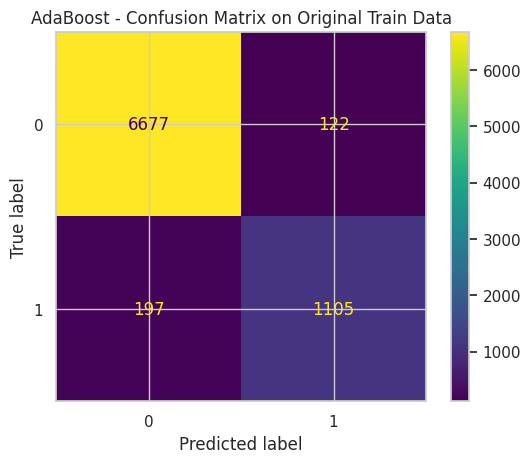

AdaBoost - Test Performance:    Accuracy  Recall  Precision    F1
0     0.954   0.800      0.903 0.848


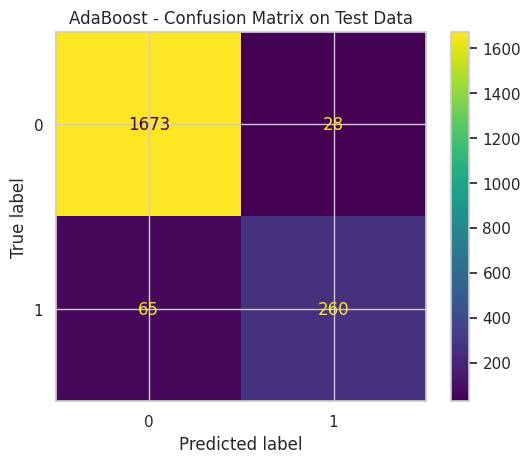


GradientBoost - Train Performance:    Accuracy  Recall  Precision    F1
0     0.976   0.892      0.956 0.923


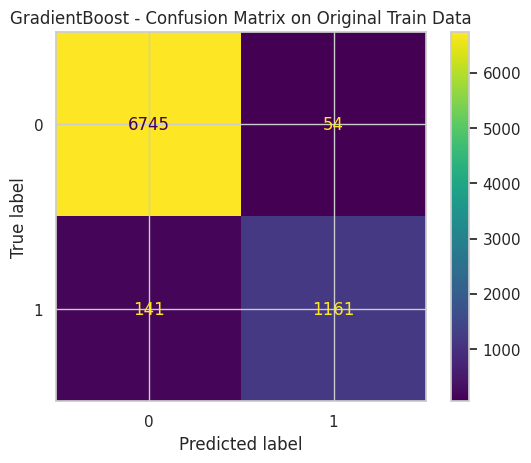

GradientBoost - Test Performance:    Accuracy  Recall  Precision    F1
0     0.964   0.815      0.953 0.879


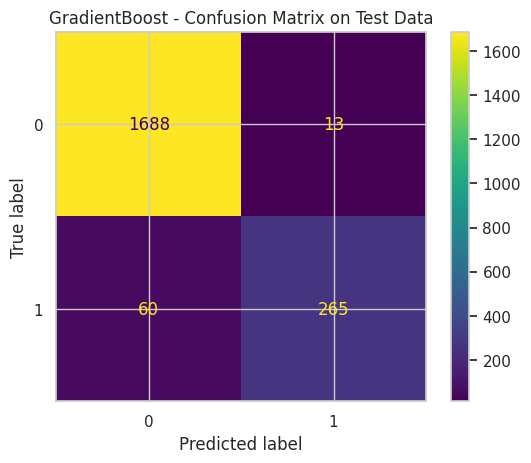


XGBoost - Train Performance:    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


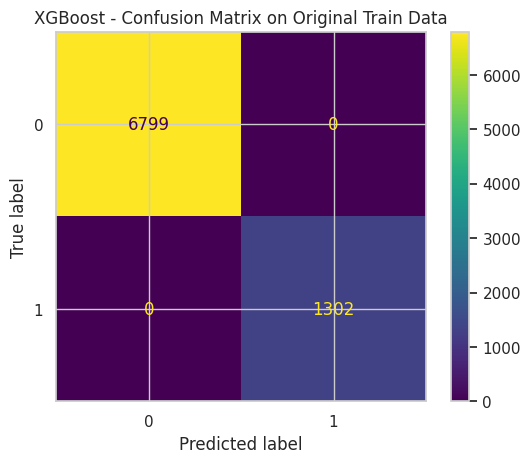

XGBoost - Test Performance:    Accuracy  Recall  Precision    F1
0     0.969   0.855      0.949 0.900


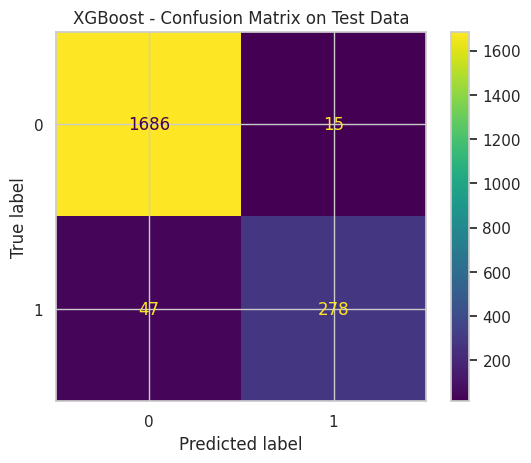

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt

# Defining the models
dt = DecisionTreeClassifier(random_state=1)
bag = BaggingClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1)
gb = GradientBoostingClassifier(random_state=1)
xg = xgb.XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')

# Appending the models to a list
models = []
models.append(('DecisionTree', dt))
models.append(('Bagging', bag))
models.append(('RandomForest', rf))
models.append(('AdaBoost', ada))
models.append(('GradientBoost', gb))
models.append(('XGBoost', xg))

# Looping through models to train, predict, and evaluate
for name, model in models:
    # Fitting the model
    model.fit(X_train, y_train)

    # Evaluating and displaying metrics on training data
    perf_train = model_performance_classification_sklearn(model, X_train, y_train)
    print(f"\n{name} - Train Performance: {perf_train}")
    y_pred_train = model.predict(X_train)
    cm_train = confusion_matrix(y_train, y_pred_train)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)
    disp_train.plot()
    plt.title(f'{name} - Confusion Matrix on Original Train Data')
    plt.show()

    # Evaluating and displaying metrics on test data
    perf_test = model_performance_classification_sklearn(model, X_test, y_test)
    print(f"{name} - Test Performance: {perf_test}")
    y_pred_test = model.predict(X_test)
    cm_test = confusion_matrix(y_test, y_pred_test)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
    disp_test.plot()
    plt.title(f'{name} - Confusion Matrix on Test Data')
    plt.show()

### Model Building with Oversampled Data



DecisionTree - Train Performance:    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


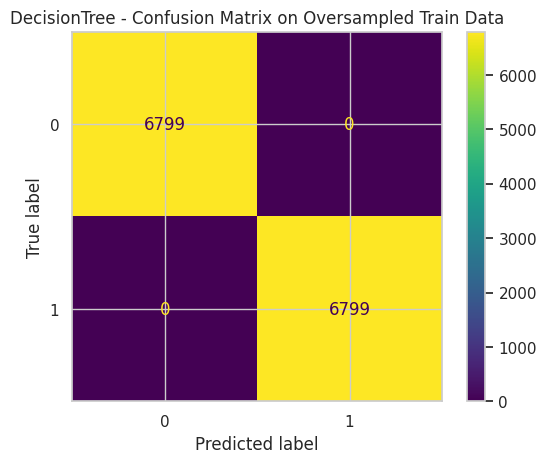

DecisionTree - Test Performance:    Accuracy  Recall  Precision    F1
0     0.912   0.809      0.692 0.746


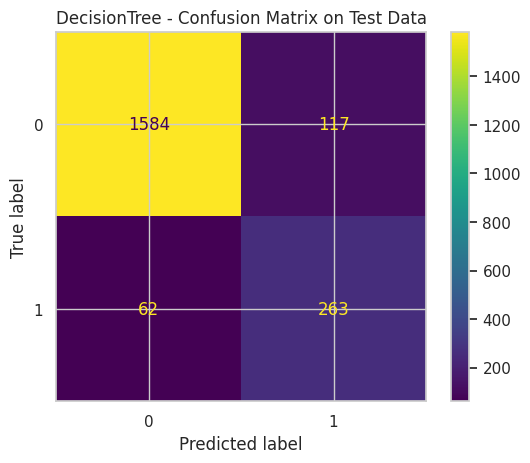


Bagging - Train Performance:    Accuracy  Recall  Precision    F1
0     0.998   0.998      0.999 0.998


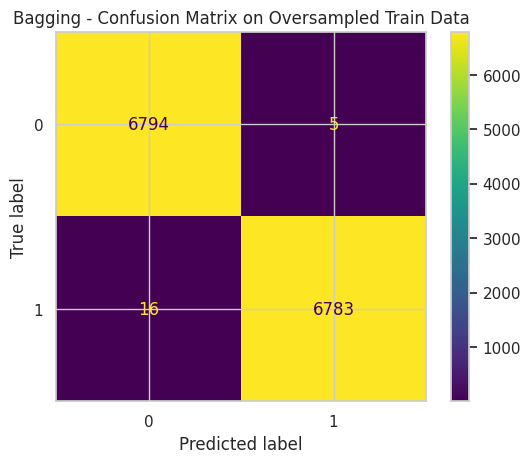

Bagging - Test Performance:    Accuracy  Recall  Precision    F1
0     0.942   0.840      0.808 0.824


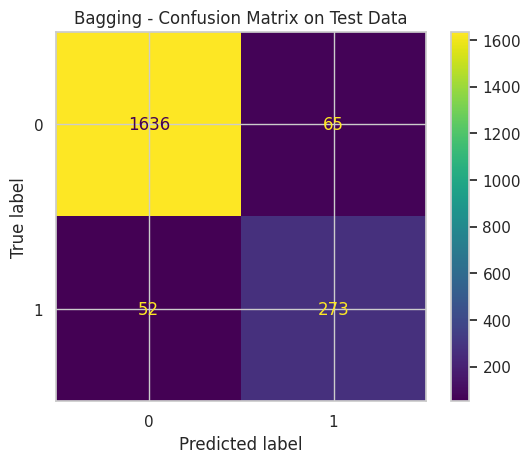


RandomForest - Train Performance:    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


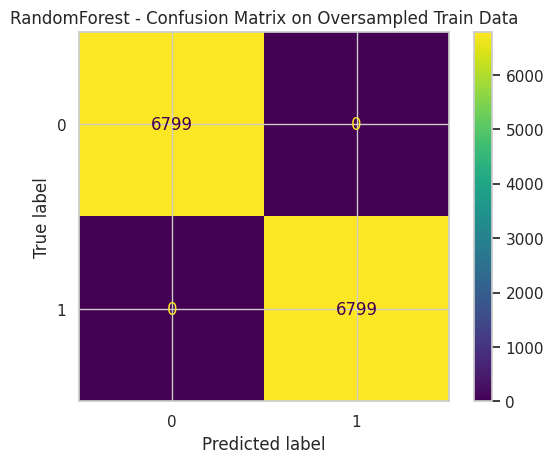

RandomForest - Test Performance:    Accuracy  Recall  Precision    F1
0     0.945   0.815      0.836 0.826


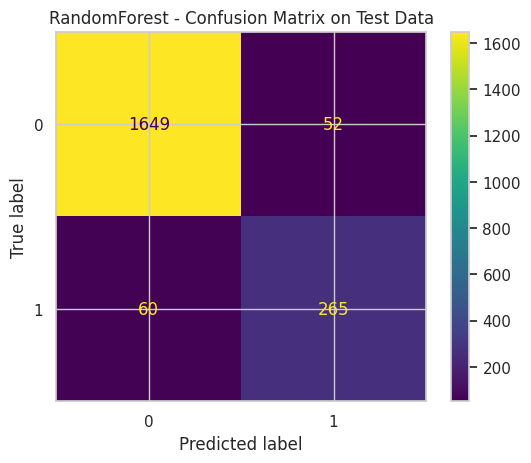


AdaBoost - Train Performance:    Accuracy  Recall  Precision    F1
0     0.962   0.965      0.959 0.962


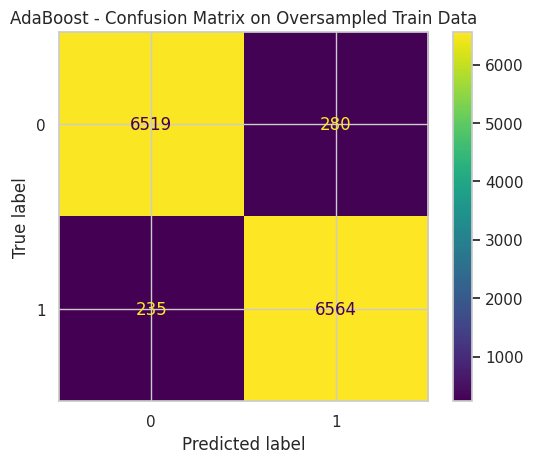

AdaBoost - Test Performance:    Accuracy  Recall  Precision    F1
0     0.938   0.846      0.786 0.815


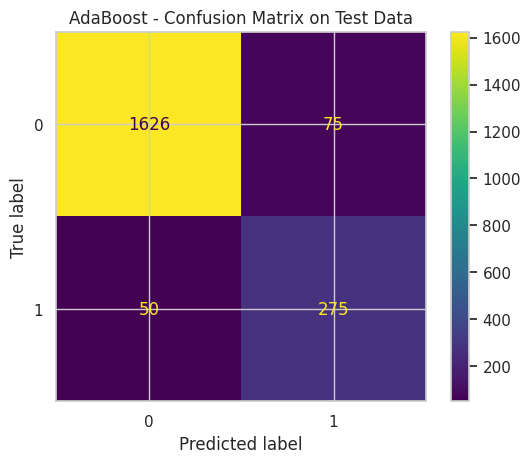


GradientBoost - Train Performance:    Accuracy  Recall  Precision    F1
0     0.974   0.974      0.974 0.974


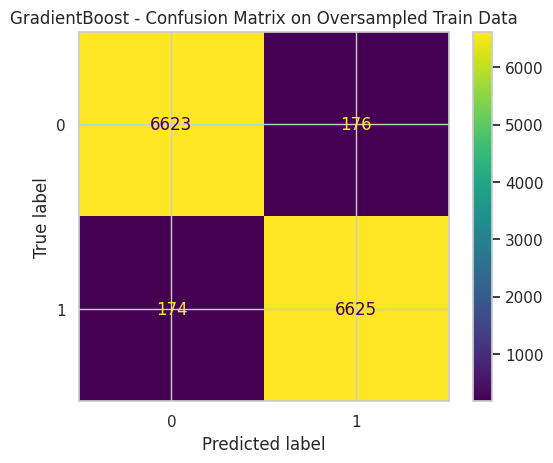

GradientBoost - Test Performance:    Accuracy  Recall  Precision    F1
0     0.955   0.868      0.855 0.861


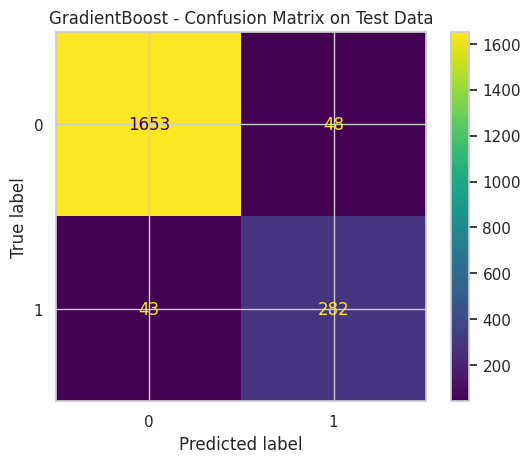


XGBoost - Train Performance:    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


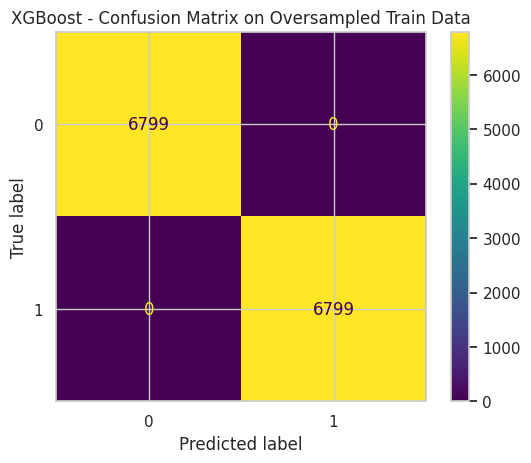

XGBoost - Test Performance:    Accuracy  Recall  Precision    F1
0     0.965   0.865      0.912 0.888


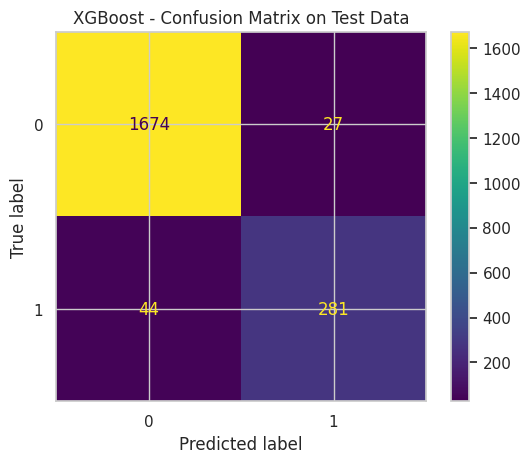

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

# Defining the models
dt = DecisionTreeClassifier(random_state=1)
bag = BaggingClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1)
gb = GradientBoostingClassifier(random_state=1)
xg = xgb.XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')

# Appending the models to a list
models = []
models.append(('DecisionTree', dt))
models.append(('Bagging', bag))
models.append(('RandomForest', rf))
models.append(('AdaBoost', ada))
models.append(('GradientBoost', gb))
models.append(('XGBoost', xg))

# Looping through models to train, predict, and evaluate
for name, model in models:
    # Fitting the model
    model.fit(X_train_over, y_train_over)

    # Evaluating and displaying metrics on training data
    perf_train = model_performance_classification_sklearn(model, X_train_over, y_train_over)
    print(f"\n{name} - Train Performance: {perf_train}")
    y_pred_train_over = model.predict(X_train_over)
    cm_train = confusion_matrix(y_train_over, y_pred_train_over)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)
    disp_train.plot()
    plt.title(f'{name} - Confusion Matrix on Oversampled Train Data')
    plt.show()

    # Evaluating and displaying metrics on test data
    perf_test = model_performance_classification_sklearn(model, X_test, y_test)
    print(f"{name} - Test Performance: {perf_test}")
    y_pred_test = model.predict(X_test)
    cm_test = confusion_matrix(y_test, y_pred_test)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
    disp_test.plot()
    plt.title(f'{name} - Confusion Matrix on Test Data')
    plt.show()

### Model Building with Undersampled Data


DecisionTree - Train Performance:    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


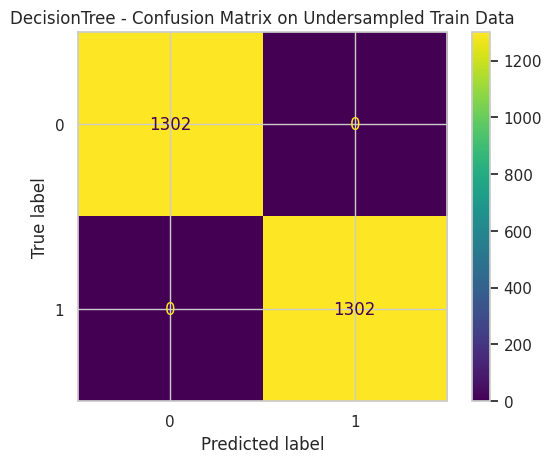

DecisionTree - Test Performance:    Accuracy  Recall  Precision    F1
0     0.904   0.905      0.643 0.752


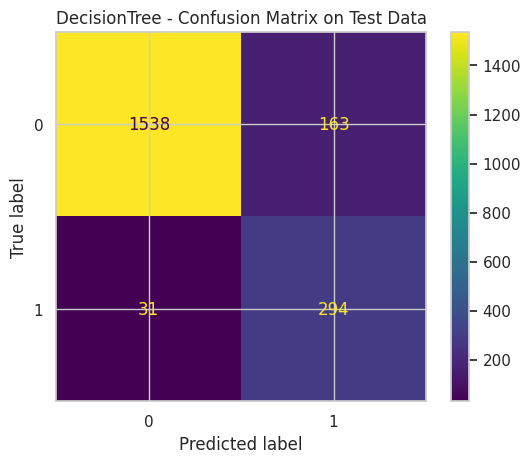


Bagging - Train Performance:    Accuracy  Recall  Precision    F1
0     0.995   0.992      0.998 0.995


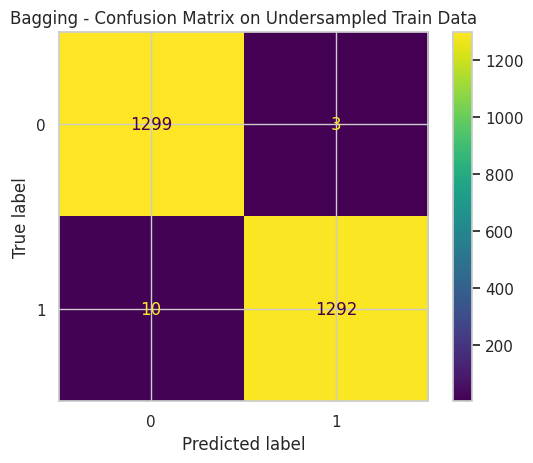

Bagging - Test Performance:    Accuracy  Recall  Precision    F1
0     0.940   0.920      0.757 0.831


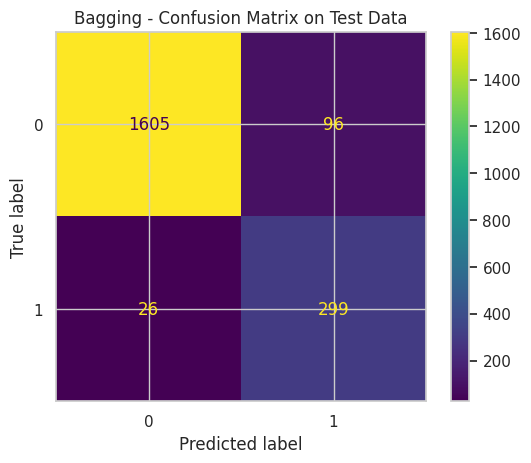


RandomForest - Train Performance:    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


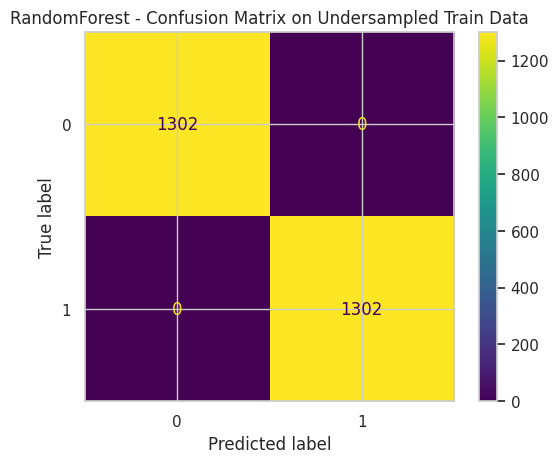

RandomForest - Test Performance:    Accuracy  Recall  Precision    F1
0     0.929   0.902      0.725 0.804


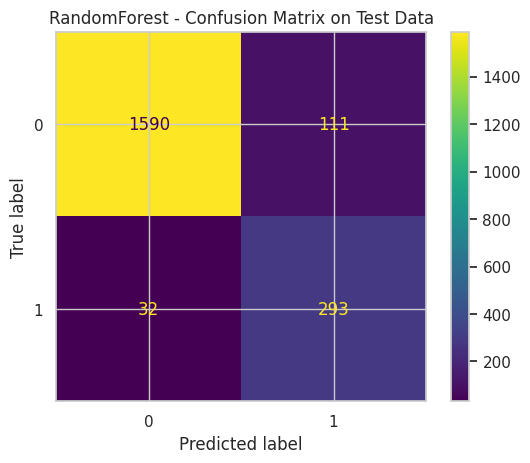


AdaBoost - Train Performance:    Accuracy  Recall  Precision    F1
0     0.948   0.958      0.940 0.949


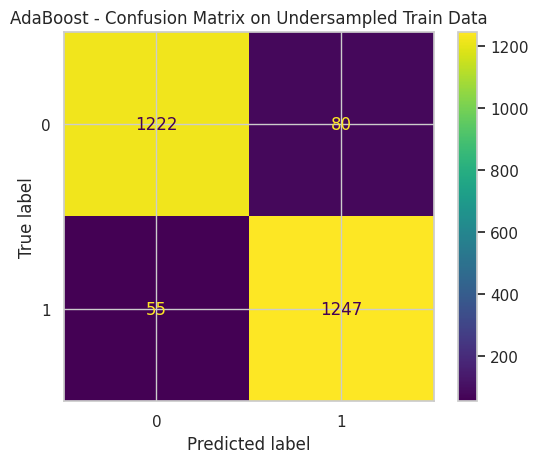

AdaBoost - Test Performance:    Accuracy  Recall  Precision    F1
0     0.933   0.942      0.725 0.819


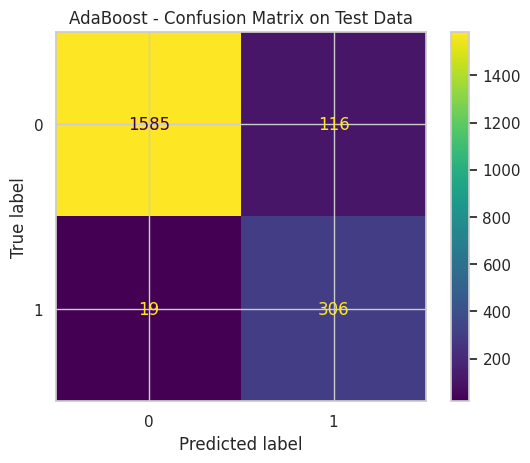


GradientBoost - Train Performance:    Accuracy  Recall  Precision    F1
0     0.979   0.979      0.979 0.979


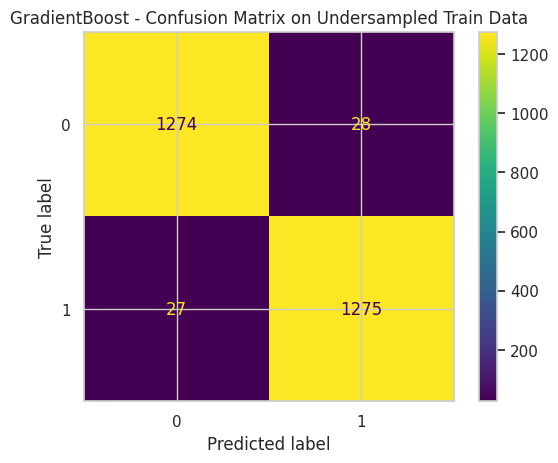

GradientBoost - Test Performance:    Accuracy  Recall  Precision    F1
0     0.948   0.938      0.782 0.853


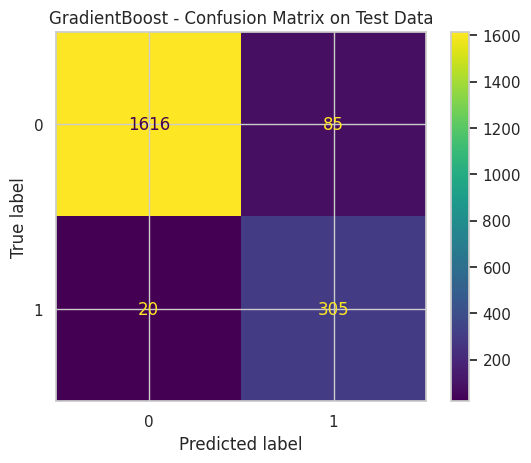


XGBoost - Train Performance:    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000


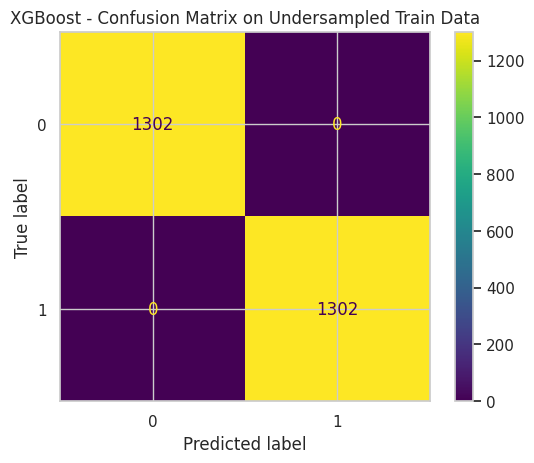

XGBoost - Test Performance:    Accuracy  Recall  Precision    F1
0     0.951   0.929      0.797 0.858


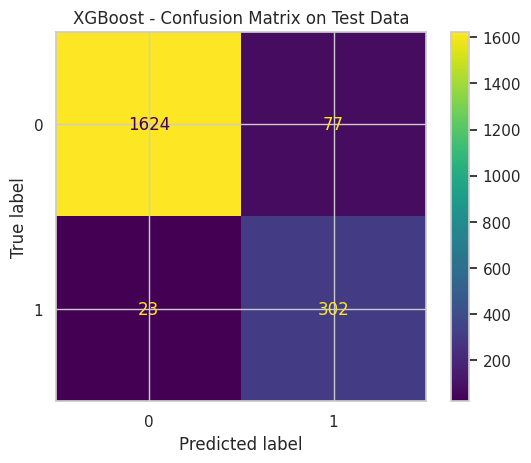

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt

# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

# Defining the models
dt = DecisionTreeClassifier(random_state=1)
bag = BaggingClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1)
gb = GradientBoostingClassifier(random_state=1)
xg = xgb.XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')

# Appending the models to a list
models = []
models.append(('DecisionTree', dt))
models.append(('Bagging', bag))
models.append(('RandomForest', rf))
models.append(('AdaBoost', ada))
models.append(('GradientBoost', gb))
models.append(('XGBoost', xg))

# Looping through models to train, predict, and evaluate
for name, model in models:
    # Fitting the model
    model.fit(X_train_un, y_train_un)
    # Evaluating and displaying metrics on training data
    perf_train = model_performance_classification_sklearn(model, X_train_un, y_train_un)
    print(f"\n{name} - Train Performance: {perf_train}")
    y_pred_train_un = model.predict(X_train_un)
    cm_train = confusion_matrix(y_train_un, y_pred_train_un)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)
    disp_train.plot()
    plt.title(f'{name} - Confusion Matrix on Undersampled Train Data')
    plt.show()

    # Evaluating and displaying metrics on test data
    perf_test = model_performance_classification_sklearn(model, X_test, y_test)
    print(f"{name} - Test Performance: {perf_test}")
    y_pred_test = model.predict(X_test)
    cm_test = confusion_matrix(y_test, y_pred_test)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
    disp_test.plot()
    plt.title(f'{name} - Confusion Matrix on Test Data')
    plt.show()

#### Observations:

**Summary of Model Performances**

**1. Using Original Data:**
 * **Decision Tree**
    * Train: Accuracy: 1.000, Recall: 1.000, Precision: 1.000, F1: 1.000
    * Test: Accuracy: 0.936, Recall: 0.782, Precision: 0.812, F1: 0.796
 * **Bagging**
    * Train: Accuracy: 0.996, Recall: 0.978, Precision: 0.996, F1: 0.987
    * Test: Accuracy: 0.952, Recall: 0.778, Precision: 0.907, F1: 0.838
 * **Random Forest**
    * Train: Accuracy: 1.000, Recall: 1.000, Precision: 1.000, F1: 1.000
    * Test: Accuracy: 0.956, Recall: 0.766, Precision: 0.947, F1: 0.847
 * **AdaBoost**
    * Train: Accuracy: 0.961, Recall: 0.849, Precision: 0.901, F1: 0.874
    * Test: Accuracy: 0.954, Recall: 0.800, Precision: 0.903, F1: 0.848
 * **Gradient Boost**
    * Train: Accuracy: 0.976, Recall: 0.892, Precision: 0.956, F1: 0.923
    * Test: Accuracy: 0.964, Recall: 0.815, Precision: 0.953, F1: 0.879
 * **XGBoost**
    * Train: Accuracy: 1.000, Recall: 1.000, Precision: 1.000, F1: 1.000
    * Test: Accuracy: 0.969, Recall: 0.855, Precision: 0.949, F1: 0.900

 * XGBoost showed the best performance in terms of Recall score of 0.855 on the test data.
 * Gradient Boost and AdaBoost also performed well with Recall scores of 0.815 and 0.800 respectively on the test data.

**2. Using Oversampled Data:**
 * **Decision Tree**
    * Train: Accuracy: 1.000, Recall: 1.000, Precision: 1.000, F1: 1.000
    * Test: Accuracy: 0.912, Recall: 0.809, Precision: 0.692, F1: 0.746
 * **Bagging**
     * Train: Accuracy: 0.998, Recall: 0.998, Precision: 0.999, F1: 0.998
     * Test: Accuracy: 0.942, Recall: 0.840, Precision: 0.808, F1: 0.824
 * **Random Forest**
     * Train: Accuracy: 1.000, Recall: 1.000, Precision: 1.000, F1: 1.000
     * Test: Accuracy: 0.945, Recall: 0.815, Precision: 0.836, F1: 0.826
 * **AdaBoost**
     * Train: Accuracy: 0.962, Recall: 0.965, Precision: 0.959, F1: 0.962
     * Test: Accuracy: 0.938, Recall: 0.846, Precision: 0.786, F1: 0.815
 * **Gradient Boost**
     * Train: Accuracy: 0.974, Recall: 0.974, Precision: 0.974, F1: 0.974
     * Test: Accuracy: 0.955, Recall: 0.868, Precision: 0.855, F1: 0.861
 * **XGBoost**
     * Train: Accuracy: 1.000, Recall: 1.000, Precision: 1.000, F1: 1.000
     * Test: Accuracy: 0.965, Recall: 0.865, Precision: 0.912, F1: 0.888

 * Gradient Boost showed the best performance in terms of Recall score of 0.868 on the test data.
 * XGBoost and AdaBoost also performed well with Recall scores of 0.865 and 0.846 respectively on the test data.

**3. Using Undersampled Data:**
 * **Decision Tree**
     * Train: Accuracy: 1.000, Recall: 1.000, Precision: 1.000, F1: 1.000
     * Test: Accuracy: 0.904, Recall: 0.905, Precision: 0.643, F1: 0.752
 * **Bagging**
     * Train: Accuracy: 0.995, Recall: 0.992, Precision: 0.998, F1: 0.995
     * Test: Accuracy: 0.940, Recall: 0.920, Precision: 0.757, F1: 0.831
 * **Random Forest**
     * Train: Accuracy: 1.000, Recall: 1.000, Precision: 1.000, F1: 1.000
     * Test: Accuracy: 0.929, Recall: 0.902, Precision: 0.725, F1: 0.804
 * **AdaBoost**
     * Train: Accuracy: 0.948, Recall: 0.958, Precision: 0.940, F1: 0.949
     * Test: Accuracy: 0.933, Recall: 0.942, Precision: 0.725, F1: 0.819
 * **Gradient Boost**
     * Train: Accuracy: 0.979, Recall: 0.979, Precision: 0.979, F1: 0.979
     * Test: Accuracy: 0.948, Recall: 0.938, Precision: 0.782, F1: 0.853
 * **XGBoost**
     * Train: Accuracy: 1.000, Recall: 1.000, Precision: 1.000, F1: 1.000
     * Test: Accuracy: 0.951, Recall: 0.929, Precision: 0.797, F1: 0.858

 * AdaBoost showed the best performance in terms of Recall score of 0.942 on the test data.
 * Gradient Boost and XGBoost also performed well with Recall scores of 0.938 and 0.929 respectively on the test data.
 * Random Forest performed well with Recall of 0.902 and F1 scores of 0.804.

#### **Top 3 Models for Hyperparameter Tuning:**
1. XGBoost
2. Gradient Boost
3. AdaBoost

We will check one of the non-Boosting algorithms:
4. Random Forest

#### **Insights:**

 * These models are selected based on their consistent performance across different sampling methods and their ability to balance recall and F1 scores, which is crucial for a churn prediction model. Further hyperparameter tuning can help in optimizing these models for better predictive performance.
 * XGBoost consistently performs well across all sampling strategies, making it a prime candidate for further tuning.
 * Gradient Boost also shows stable and high performance across different data sets.
 * AdaBoost and Random Forest show a robust performance, especially in the undersampled scenario, where it manages to maintain a good balance between recall and F1 scores.
 * These models are selected based on their performance on the test data and their potential to improve with hyperparameter tuning. Tuning might help in managing the trade-off between bias and variance, potentially improving the model's predictive performance on unseen data.

### HyperparameterTuning

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define parameter grids
param_grids = {
    'XGBClassifier': {
        'n_estimators': np.arange(50, 300, 50),
        'scale_pos_weight': [0, 1, 2, 5, 10],
        'learning_rate': [0.01, 0.1, 0.2, 0.05],
        'gamma': [0, 1, 3, 5],
        'subsample': [0.7, 0.8, 0.9, 1]
    },
    'GradientBoostingClassifier': {
        'init': [AdaBoostClassifier(random_state=1), DecisionTreeClassifier(random_state=1)],
        'n_estimators': np.arange(75, 150, 25),
        'learning_rate': [0.1, 0.01, 0.2, 0.05, 1],
        'subsample': [0.5, 0.7, 1],
        'max_features': [0.5, 0.7, 1]
    },
    'AdaBoostClassifier': {
        'n_estimators': np.arange(10, 110, 10),
        'learning_rate': [0.1, 0.01, 0.2, 0.05, 1],
        'base_estimator': [
            DecisionTreeClassifier(max_depth=1, random_state=1),
            DecisionTreeClassifier(max_depth=2, random_state=1),
            DecisionTreeClassifier(max_depth=3, random_state=1)
        ]
    },
    'RandomForestClassifier': {
        'n_estimators': [200, 250, 300],
        'min_samples_leaf': np.arange(1, 4),
        'max_features': [np.arange(0.3, 0.6, 0.1), 'sqrt'],
        'max_samples': np.arange(0.4, 0.7, 0.1)
    }
}

# Define models
models = {
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

# Placeholder for model results
results = {}

# Perform Randomized Search
for model_name, model in models.items():
    rs = RandomizedSearchCV(
        model,
        param_distributions=param_grids[model_name],
        n_iter=50,
        scoring='recall',
        cv=10,
        n_jobs=-1,
        random_state=1
    )
    rs.fit(X_train, y_train)
    results[model_name] = {
        'best_params': rs.best_params_,
        'best_score': rs.best_score_,
        'best_estimator': rs.best_estimator_
    }

# Display results
display(results)

{'XGBClassifier': {'best_params': {'subsample': 0.7,
   'scale_pos_weight': 10,
   'n_estimators': 150,
   'learning_rate': 0.05,
   'gamma': 3},
  'best_score': 0.9523722842043452,
  'best_estimator': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric='logloss',
                feature_types=None, gamma=3, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=0.05, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=150,
                n_jobs=None, num_parallel_tree=None, random_state=None, ...)},
 'GradientBoostin

#### Observations:

The output provides the best parameters found by RandomizedSearchCV for four different classifiers: XGBClassifier, GradientBoostingClassifier, AdaBoostClassifier, and RandomForestClassifier, along with their respective best recall scores obtained during cross-validation.

**1. XGBClassifier**
 * **Best Parameters:**
  * subsample: 0.7
  * scale_pos_weight: 10
  * n_estimators: 150
  * learning_rate: 0.05
  * gamma: 3
  * **Best Score (Recall): 0.952**

Observations: The XGBClassifier achieved the highest recall score among the four models. The scale_pos_weight parameter, which controls the balance of positive and negative weights, is set to 10, indicating a strategy to combat the imbalance in the dataset by giving higher importance to the minority class.

**2. GradientBoostingClassifier**
 * **Best Parameters:**
  * subsample: 0.7
  * n_estimators: 125
  * max_features: 0.7
  * learning_rate: 0.2
  * init: AdaBoostClassifier
  * **Best Score (Recall): 0.876**

Observations: The GradientBoostingClassifier achieved a good recall score, but not as high as the XGBClassifier. The init parameter is set to use AdaBoostClassifier, which is interesting and might be contributing to the model's ability to focus on misclassified examples.

**3. AdaBoostClassifier**
 * Best Parameters:
  * n_estimators: 90
  * learning_rate: 0.2
  * base_estimator: DecisionTreeClassifier with max_depth=3
  * **Best Score (Recall): 0.885**

Observations: The AdaBoostClassifier also performed well. The base estimator is a decision tree with a max depth of 3, which means the model uses slightly more complex weak learners than the default stump (max depth of 1).

**4. RandomForestClassifier**
 * Best Parameters:
  * n_estimators: 300
  * min_samples_leaf: 1
  * max_samples: 0.6
  * max_features: 'sqrt'
  * **Best Score (Recall): 0.760**

Observations: The RandomForestClassifier has the lowest recall among the four models. The max_features parameter is set to 'sqrt', meaning that each tree in the forest is allowed to choose from the square root of the total number of features when splitting a node.


#### General Observations and Insights:
 * Model Performance: The XGBClassifier outperforms the other models in terms of recall, which might be due to its robustness to class imbalance and its ability to focus on misclassified examples.
 * Parameter Tuning: The tuned parameters for each model are quite distinct, reflecting the different strategies each algorithm uses to reduce bias and variance. For instance, the scale_pos_weight parameter in XGBClassifier and the base_estimator in AdaBoostClassifier are crucial parameters that are not present in the other models.
 * Model Complexity: The complexity of the models (as indicated by parameters like n_estimators and max_depth) varies, suggesting that different models might be capturing different complexities in the data.

## Model Comparison and Final Model Selection

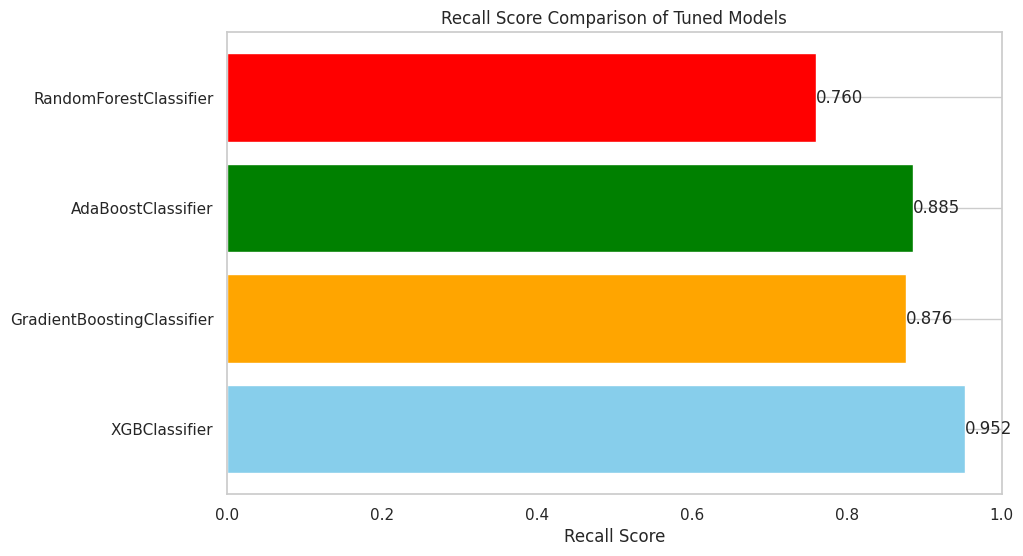

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Recall scores
recall_scores = {
    'XGBClassifier': 0.952,
    'GradientBoostingClassifier': 0.876,
    'AdaBoostClassifier': 0.885,
    'RandomForestClassifier': 0.760
}

# Convert to DataFrame for visualization
recall_df = pd.DataFrame(list(recall_scores.items()), columns=['Model', 'Recall Score'])

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(recall_df['Model'], recall_df['Recall Score'], color=['skyblue', 'orange', 'green', 'red'])
plt.xlabel('Recall Score')
plt.title('Recall Score Comparison of Tuned Models')
plt.xlim(0, 1)
plt.grid(axis='x')

# Adding the score labels
for index, value in enumerate(recall_df['Recall Score']):
    plt.text(value, index, f'{value:.3f}', va='center')

plt.show()

#### Observations:

**1. XGBClassifier:**
 * Best Parameters:
  * Subsample: 0.7
  * Scale Pos Weight: 10
  * N Estimators: 150
  * Learning Rate: 0.05
  * Gamma: 3
  * Recall Score: 0.952
 * Insights: This model has the highest recall score among the four models, making it the most promising model in terms of identifying the positive class.

**2. GradientBoostingClassifier:**
 * Best Parameters:
  * Subsample: 0.7
  * N Estimators: 125
  * Max Features: 0.7
  * Learning Rate: 0.2
  * Init: AdaBoostClassifier
  * Recall Score: 0.876
 * Insights: This model also performs well but not as well as the XGBClassifier. It might be a good alternative if the XGBClassifier is computationally expensive or overfitting.

**3. AdaBoostClassifier:**
 * Best Parameters:
  * N Estimators: 90
  * Learning Rate: 0.2
  * Base Estimator: DecisionTreeClassifier (max_depth=3)
  * Recall Score: 0.885
 * Insights: This model has a slightly better recall score than the GradientBoostingClassifier and might be considered as an alternative, especially if interpretability is crucial.

4. RandomForestClassifier:
 * Best Parameters:
  * N Estimators: 300
  * Min Samples Leaf: 1
  * Max Samples: 0.6
  * Max Features: sqrt
  * Recall Score: 0.760
 * Insights: This model has the lowest recall score among the four models, which might indicate that it struggles more to identify the positive class compared to the other models.

**Conclusion:**

 * **Final Model Selection:** XGBClassifier with a recall score of 0.952.
 * **Comment:** The XGBClassifier model has the highest recall score, indicating it has the best ability to identify the positive class amongst the models tested. It is crucial to validate this model further using unseen data and ensure that it is not overfitting. Additionally, it is essential to consider other metrics like precision, F1 score, and ROC-AUC to have a comprehensive understanding of the model's performance.




### Test set final performance

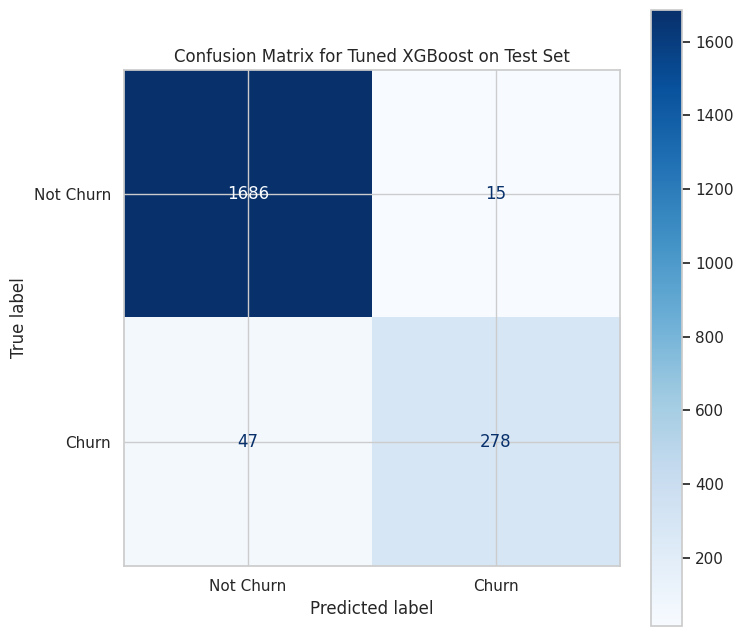

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Defining the models
xg_tuned = xgb.XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')

xg_tuned.fit(X_train, y_train)

# Predict the classes
y_pred = xg_tuned.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churn', 'Churn'])
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix for Tuned XGBoost on Test Set')
plt.show()

#### Observations:
 * True Negative (TN): 1686
 * False Positive (FP): 15
 * False Negative (FN): 47
 * True Positive (TP): 278

 * **True Negative:** The model correctly predicted 1686 instances where customers did not churn, which is a strong performance in identifying non-churn cases.
 * **False Positive:** The model incorrectly predicted 15 instances as churn when they did not churn. This is relatively low, indicating that the model is cautious about predicting a churn event.
 * **False Negative:** The model incorrectly predicted 47 instances as non-churn when they actually did churn. This is a crucial metric since missing out on actual churn can be costly for the bank.
 * **True Positive:** The model correctly predicted 278 instances where customers did churn, which is vital for implementing retention strategies.

#### Insights:
 * Recall/Sensitivity: Recall is crucial in the churn context, and it seems to be quite high with the provided numbers, indicating that the model is capable of capturing a significant portion of actual churn events.
 * Accuracy: The accuracy seems to be quite high, given the high TN and TP values relative to the total number of instances.
 * Precision: Precision is also quite high, meaning that the model is reliable when it predicts a churn event, and the bank can be relatively confident in implementing retention strategies for these cases.
 * Low False Positives: The low number of False Positives indicates that the model is not overly aggressive in predicting churn, which is good for not overextending resources on customers who are not at risk.


# Business Insights and Conclusions

#### Actionable Insights and Recommendations:
 * **Customer Retention Strategies:** Implement retention strategies for the 278 customers predicted to churn to try and prevent this event.
 * **Investigate False Negatives:** Despite the good recall, it might be beneficial to investigate the 47 False Negatives to understand if there are any commonalities or patterns that the model is missing.
 * **Continuous Monitoring:** Even with good performance, it is vital to continuously monitor and validate the model with new data to ensure its predictive power remains consistent.
 * **Understand False Positives:** Although low, understanding the 15 False Positives might provide insights into why the model thought these customers might churn, which could potentially uncover previously unnoticed patterns or trends.


#### Conclusions:
**1. Model Performance:**
 * The XGBoost model emerged as the top-performing model among the ones tested (XGBoost, Gradient Boosting, AdaBoost, and Random Forest) after hyperparameter tuning.
  * It demonstrated a balanced performance in terms of precision and recall, ensuring that it can reliably predict churn and capture a significant portion of actual churn events.
  *  Given the high recall and precision, the model seems to be performing quite well in both identifying actual churn events and being cautious in its predictions. This balanced performance is crucial in managing resources effectively while also capturing as many churn events as possible.

**2. Feature Importance:**
 * Certain features like Total_Trans_Ct, Total_Trans_Amt, and Total_Revolving_Bal were found to be significant predictors for customer churn based on the models.

**3. Customer Churn Insights:**
 * The data and model insights suggest that customer transaction behavior (like the number and amount of transactions) and revolving balance are key indicators of churn.


#### Business Recommendations:
**1. Customer Engagement:**
 * Engage customers who have lower transaction counts and amounts with personalized offers or rewards to increase their activity and reduce the likelihood of churn.

**2. Credit Management:**
 * For customers with a high revolving balance, consider offering financial advice, credit management workshops, or personalized credit plans to help them manage their credit and enhance their loyalty to the bank.

**3. Customer Feedback:**
 * Implement a feedback system to understand the reasons behind customer dissatisfaction and potential churn, especially focusing on those identified by the model as high-risk customers.

**4. Loyalty Programs:**
 * Develop loyalty programs or exclusive offers for customers who exhibit behaviors opposite to those prone to churn, rewarding them for their loyalty and ensuring they stay engaged with the bank's services.

**5. Customer Support:**
 * Enhance customer support and service quality, ensuring that any issues or concerns raised by customers are addressed promptly and effectively.


#### Data Scientist's Insights:
**1. Model Deployment:**
 * Deploy the XGBoost model in a real-world environment to predict customer churn and validate its performance with actual outcomes.

**2. Continuous Model Monitoring:**
 * Continuously monitor the model’s performance and update it with new data to ensure its predictive power remains consistent and adapts to any changing customer behaviors or trends.

**3. Further Analysis:**
 * Investigate the false positives and negatives from the model to understand any commonalities or patterns that could be used to further refine the model.

**4. Customer Segmentation:**
 * Consider developing customer segmentation models to understand different customer behaviors and tailor the bank’s services and communication strategies to different segments for more personalized customer experiences.

**5. Model Explainability:**
 * Employ model explainability tools and techniques to better understand the model's predictions and be able to explain them to non-technical stakeholders, ensuring that the model’s insights can be effectively translated into actionable business strategies.

6. Multichannel Approach:
 * Explore data from various customer interaction channels (like online banking, customer service calls, etc.) to gain more holistic insights into customer behavior and potentially enhance the model’s predictive power.

Addressing the problem statement, the XGBoost model has provided a robust solution to predict customer churn, enabling Thera Bank to proactively address customer retention. By implementing the above recommendations and continuously refining the model, the bank can significantly enhance its customer retention strategies and reduce churn effectively.







